# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

In [124]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = """/9j/4AAQSkZJRgABAQEA8ADwAAD/7QA6UGhvdG9zaG9wIDMuMAA4QklNBAQAAAAAAB0cAm4AEWRhdmlkeGo3L1ZlY3RlZXp5HAIAAAIABAD/4Q4faHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLwA8P3hwYWNrZXQgYmVnaW49J++7vycgaWQ9J1c1TTBNcENlaGlIenJlU3pOVGN6a2M5ZCc/Pgo8eDp4bXBtZXRhIHhtbG5zOng9J2Fkb2JlOm5zOm1ldGEvJyB4OnhtcHRrPSdJbWFnZTo6RXhpZlRvb2wgMTIuNTcnPgo8cmRmOlJERiB4bWxuczpyZGY9J2h0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyMnPgoKIDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PScnCiAgeG1sbnM6ZGM9J2h0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvJz4KICA8ZGM6Y3JlYXRvcj4KICAgPHJkZjpTZXE+CiAgICA8cmRmOmxpPmRhdmlkeGo3PC9yZGY6bGk+CiAgIDwvcmRmOlNlcT4KICA8L2RjOmNyZWF0b3I+CiAgPGRjOnJpZ2h0cz4KICAgPHJkZjpBbHQ+CiAgICA8cmRmOmxpIHhtbDpsYW5nPSd4LWRlZmF1bHQnPmRhdmlkeGo3L1ZlY3RlZXp5PC9yZGY6bGk+CiAgIDwvcmRmOkFsdD4KICA8L2RjOnJpZ2h0cz4KIDwvcmRmOkRlc2NyaXB0aW9uPgoKIDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PScnCiAgeG1sbnM6cGx1cz0naHR0cDovL25zLnVzZXBsdXMub3JnL2xkZi94bXAvMS4wLyc+CiAgPHBsdXM6TGljZW5zb3I+CiAgIDxyZGY6U2VxPgogICAgPHJkZjpsaSByZGY6cGFyc2VUeXBlPSdSZXNvdXJjZSc+CiAgICAgPHBsdXM6TGljZW5zb3JVUkw+aHR0cHM6Ly93d3cudmVjdGVlenkuY29tL3Bob3RvLzQ5NTkyODY4LWFuLW9sZC1zb3ZpZXQtdHVuZWQtY2FyLWlzLWRyaXZpbmctaW4tdGhlLWV2ZW5pbmctaW4tdGhlLWNpdHk/dXRtX3NvdXJjZT1pcHRjJTI2dXRtX21lZGl1bSUzRGdvb2dsZWltYWdlcyUyNnV0bV9jYW1wYWlnbiUzRGltYWdlPC9wbHVzOkxpY2Vuc29yVVJMPgogICAgPC9yZGY6bGk+CiAgIDwvcmRmOlNlcT4KICA8L3BsdXM6TGljZW5zb3I+CiA8L3JkZjpEZXNjcmlwdGlvbj4KCiA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0nJwogIHhtbG5zOnhtcFJpZ2h0cz0naHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wL3JpZ2h0cy8nPgogIDx4bXBSaWdodHM6V2ViU3RhdGVtZW50Pmh0dHBzOi8vd3d3LnZlY3RlZXp5LmNvbS9saWNlbnNpbmc8L3htcFJpZ2h0czpXZWJTdGF0ZW1lbnQ+CiA8L3JkZjpEZXNjcmlwdGlvbj4KPC9yZGY6UkRGPgo8L3g6eG1wbWV0YT4KICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKPD94cGFja2V0IGVuZD0ndyc/Pv/bAEMACAYGBwYFCAcHBwkJCAoMFA0MCwsMGRITDxQdGh8eHRocHCAkLicgIiwjHBwoNyksMDE0NDQfJzk9ODI8LjM0Mv/bAEMBCQkJDAsMGA0NGDIhHCEyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMv/AABEIAV4CDQMBIgACEQEDEQH/xAAbAAACAwEBAQAAAAAAAAAAAAACAwABBAUGB//EAFEQAAEDAgQCBwMHBwgJBAIDAAEAAgMEEQUSITFBUQYTImFxgZEUMqEHI0JSscHRFRYzYnKCkkRTVFWTouHwFyQ0Q0Vjg5TCc4Sy8TXSZGWj/8QAGQEBAQEBAQEAAAAAAAAAAAAAAAECAwQF/8QAJREBAQEAAgICAgICAwAAAAAAAAERAiESMQNRE0EiMgRhcbHB/9oADAMBAAIRAxEAPwD46Wkdp1tdlZLeHAeqq+pBGpQnfRRGqkq2QRSMdGHF/E/R8O9QxCQgsvd3MpDIJJAS1twNynxZ432lzNtopf8ASnMJpgWhxaTw4lKbPI27Rc3P+SmF93ZWgtB+lxKrKGDW/ddY/wCQjO8OuN05pzkX1I3JKXa5IBuTqSiii0zF2t7BaoYZWF13gOI2vsEOZuUho8TZU+NweQ0XLRrbWyKGnmnc2No7TtgVMgWLg2BuSrlLo9DYjjZQ08jc1gCGaEgp1FAytJY+YRuGxdsFpCYJmMkDni9tghkd1j3FrRc8G7BXU0pp5gzXUXBcLXHNMaxzIiGtGUbniSlwJa7KzKBYu+Kq/bsLuRZRm2JdyUDO1d1r8kVohyyvYx1x9FoYF9dwavwTorh0L5TPLNJFdoLRmdbu5eOi+QseWv7Bs48kyd1RcCaVz3EAauvYcAsZ2Or0gxN2L4pLUl2Uvd2WF+YjxP3BYTQvBjYZG5SdXXs0eJTqJ+EwsjE9M6Z5PaJfv3ABerr4+ikuHwQR1JjnaM0jG6jMeBOwA47pdWR4yQwU5dHC7ridMwFgsk7ppZLO0+AAXVrPYad2WlkfK0buDcrSe7ifgsEzY2U4fmBkeblu+UfinEyMeR19NRzTHRhsQeXa/VTIKOpqG5ooXuHMBA+CRrT2TZpsStIGBj5GvcS1jWi93FLEpvoToibkDSA7VBZrTuqHNkLm76q2lwIbmdbiAgAaBpdOihkle2Jo7Tzx/wA7IrfhtBPiFSIqaASkakF1mgDck8Au6aWRtA8TthjiaSGNiIAd+sTuRyCAYFiGFUJLnCMTD3r2JHhvbxsuDOySLODVFzibXJ1Kx7OxmreXBkTe0NG9ySYZZZScwe/ib6eqWyXqG3a4EngN1qoamUl0McUOd51fJwHID/JTxXVNw2qfCZswEANi+2l+SH2WZ2kXasNXbNHmu1ipxCWKGGodcMHzUTG5QBzy7+ZSm4vh7cMNOylayTjI45nEqI4jzPDHmc8DWwssxnefed6JkzuvkvmJSHZRo3dbkjKsxcL65RyQtsTtclWSX6OfYD4eSoAA9k+aqtTYY8tzIP8APLmlvIPYDjbigBIbuPFNicxjdGtc7mdbIFAgOBt2eXEqi98slg0AbDuXRhw6rmgfUxwPfEwEve1hytHjsufHmfN2BrzSA29XFrK0vJ2F7BVmz3sBf7EUkUbG++XyHfkktAsQTbuQC7fdCDrZGWsI7NyULI3PuGNJtyCoYzUaDVWz37WzHkltLxdo05ogCPxUHVwyanpqkSVVIyptsxz7AeK9FVY1iVewOFXTUFM0WZHFofhqvE3y96jJsp0aCe9TPodWrqqqouySpdN33uT43WKMNiJLyC7lugM7i22v2JOZzjtokg1mcXL3AOPC/BC3rqkue49kbngEi9jzKYZ3GzXOAY3ZoGnomIFzC0XaCWjiqE0jW2BsO5dGnh9s0jgmqH25WaEFRhU1O4CeMxOIuGnVJRgMr3DUmyHNdFNGY+y5w8AUpryDporga1jjs0nzstUUEQI6yVpd9Rov8VlEl22JRBrXahxHep2nbXIYoe0Hgv5bpDnOlu5ziG8ylN6thvYuKp8pedAPJTGsA7INgfNDYuOihB5hCSRxW8FnTjqh8blV6lXr4IgyL8fVAW67hG5rWt0dc8lQYS0mx2RWinlszKwuDh7obx5klaJj81q8E+vxWWCVjG5GgE8ynySjq2hzWl3csX2Qlzyba6jkjD29kzEnuCRmyi4I13sigHWTNadS4q50hrpWTODGxZWA7Dc+KZJF1D2OecxOuQbDuTIm+zSuaCABxtclKnmdo8666XWZ76U6mreqe1r2Dq73cza66mJ4lTV8rJKOkZTQxtDBbTN4/avPMaHkySkhvPmtDZRFGWtaBfbNuriLks5xJFzybskMztu+OzeaJ02RpBs57uPJDG2So3AyjjsrPXYZZrz1873PPMndE+YuhLoWBkY4ndA8xx9jJcrO6Qm7eBOw2Uk1VZ7u0RA6doqFjcpIJuN9ELACdT6rQ1QvaD2W6/WKYSJN9G8TuSkatFmuBJ5JjGNDO28uJ17OyzYNMAhJFrMA3e7U+SJ1RFA0x05za3JtrfvPFIZA2QtBkyAm2xN0yuZR0rmR0c000jf0j8uVoPJvHzUxWZzyQS6QNI0AO6hyaZ3XDeACWRkdcs8Lm6hffTS61iNkWI1wZljlcIh9G+66OKY1R1tBBTxUh61g1dfT04faVwTLZtrB3mqbK5oJLG68uCZ+wIIzm4se9USM2p07k2JpnlL7Na0cyiZG1k984JOzW6poFjbtJaxxtx4BXD1r5btLwRxanmGZ24OVCInwjMwkP5KSkd3D6jrg2KeKskBOV0o7TvBt9AO/dTGMDfQVAc/DZaaJ7M4ZJLmfbm7lfluuW3FK6IMAmkYWah7T2vXgt9Lir5/m6mUHOcz5JnFznnw3KmLrjOyGTRvVM48V1XxUdMyA0jppJjqXyWaP3WjW3eVeI4ZlY6eGTr2N/SPa2zWnkL7lJc6GCSN9M50j2i73COzR4E6nxOnIK/pHelwuijwl1ZX4y4zSf7lgtm7ua8xIyHKS1tm8ypNXTTyZnBp4a6koJ5K2tAzMIiZoA1lmhSSmsj3C5DTpzVRxSPOjCQmRQEvMYBc8anKL2W+KknEJeyGVzOL7WaPPZatwczISfdI8FboQ1maztdltDS4FxLWtH0idFnEhkeeskdkG1uKTUSIQNiJkBc87NA+1XBJFG4F7A7W9tglyS5uywWby/FU1h3DgPuT0rtV/SXEcQpI6SSTJRxDswsGRnoN/NcZkr3E22T4omOBL3ONtmjS6yuBLj2gO4JFgpHE6B9uZ2CjYm5SS7QcAFKWTqXl5gbKeGYXA8k2eulmBa/Ky+9hZVGd0jAC1jj6WRCSTJkFw3klBreBRhwG5KoFziDvdVmvx8kQMedocTa+qfP7N1bWxbjdBmLlbSeSotAG+vco02OiBwe4AADXnZGIi4cSltEhGbK63Oy1U8NVKbxRSEbEjT4rIdhuET4hUmJlmNAu5zuA5r21H0OwamiZJV1xc29ssTc73nkNPsv4rkM6UNwalNJh2DQQSPbZ9ROM73HuXDqcfr5WObJVPub5i3Qm/C/JZ/lTp6LEOlcGFCWiwOhbC33TNKcz+W3BeOnrKislc+aV73Hc3Wd0rndw5K25g0mxst5iBcLaXCrK0DiSrd3iyEh3EWCqrAzG17LQ4QRtIDnyvt4ALMHhoVF90BtIHvm/crMoIsBYJYPIC/MqhqbkklMBXKnijLANT2R3pbgOF7d6C76IbkqCymY8DbwQWCQdtUx8oLbNJtxVEF9yBoEOQjfZBInFptewO5sjdHftZrDvKUGkFaS5oaBoSdyBsgTlFt7psAa14vmzdyPq8rd7G2gA3R5GNc0R3v9Jx3PcFm0OqZ2MAAYACPH4oGVERuXNZcDS44pcrAXHMRoOeyylov2dG96nHjMXWiQMfID1gt9ivqms7WYu5cFna0kBX2musQXFaxkzICQSjD2gAXJA4DiknNxBA5K3WsMmw3TFXKS9oNjvtwQODmTEGwLeF9lcryQCfIDggjaXe6LndWB2fOANbjfgFWXK65HgmNe18eQjXmAqL2xaBljbS+qz2II3uIBLW35nZdzCJMIhnbT1oztefnJQ4gAcua8+6TPbXZW0gHa7jsEwe9xOswMPpY8IonNYXa1MrbMawb5Wg6+Z8TqvKYvkdVvfC515D2YiQX22zODbBt/qjZYpHSuaOsmNrWALuHJKLyPdNr8kknsi3tczR57XIFMjhZ1eaUkX4XQwQ9a+znsY0C5c86Aff4IXuDbgOuE99BgjjJGRtyr9nfcC1zyBSGPF9SU904jZaN5v3BOw4tcyMB+RreDWhL61sZ7DLHmTqsTpXOOpJVtPmUnH7D5ZZHG5cfAlK6xx0JTGEa3AJ49ytwaNeKvUDzVt9mEJbYbk8SfFIae0CLjvvqh77KgdUkGn2qpMQhbM4RN1Db7eCUaiQjI57i3e10NtgwE9y1U1G+SUtcWRuH1t0F08uSwj0e7TTQ+XJdjGOrNDTwxMAe1vacZL+gG3ncriOijiebkusfeB0S3zj6LSAOepWc+hpo6qWjjcxpaMx7QAFz3ErRiOLzYg1jKupLYIhZkEI0/C/euVme88r80ZpmgXc8Ad+58lc/dRZqojEWRxAfrO1Nkptnaajyuo2MA30A71GuIfoA7uKovLlFybD7VcdpHWaWtG5Ljoike2RuzM3Jo+0/ggDHsbrYdyKKZwbox5eOBAt8EiJueQZiG34u2TmsBuXOJSw27iXWVg2mppadmSLNKQNXuFh5D8VjJafnC3KOFzqULmFx0VupngX3KmAL3OgRsuPoXKFmWPmXfYt0WINpWExtBkIte1yPNUYZA4Os8Fp5EWUtGdALd5O6ZUVAnN7do6lx1JTKeKEMMj3X5C1zfuCCj7OyMZWlzyNS7YeClNJDFMDI0vaOACW6QlxsAB4aqZRa435qD0X5Ro6hjGClETwLdY94uR4HQLQayTDqVzqSqpIA4b2zvP7N/uC8mA//FPbL1LLta3MfpOFyiDdI+omdLUSveXcSdSgkykdloASQ9znak3Wykw+pqn3FNK6Mal57LR4uOiYYxsjL3aWtzJstbWMt26hjW8mi/xXpsC6MxYnKS4sMUQ1ezVvqbBcrpLTwU1Z1VO+HK3TJG4H1sixyJDStN42yP7zoD96zvve7gGjkmudIwaANFrEg3+KWWi1yUCdDsjbE9zcwGnNW0AOB0PcRdb6enfMQclye6yurHOsQNlGvc3bddmqwuWOn62R0cYOzRqSuTGWRyG7C7ldVGuipRNeWUiwNtSjraOTNma3LE1u50CzuqZQGlrGtANwbKSTumJdI58zubjoEGXuUR5QtEEIcDe5QJjshkcDsPNE4sDAAbuO6DQ+KgAaDmVoikZG29szvsSQ0FPbHlgc7MBrbZKLfUEsv9LmUs1L+etrX5JZsTvdTKMtxcpJBZcXG7rqwQhAuplNggYZGk3a21tgTdMFQ5sfuZSdnBJaxz3BrRqtEgtE1paS8aZuFkyEpPWE7nRDfs227lQGhvoVZaNEDGWc2xGg3KMObG28Y1PNJddrdCbFSMjiL8lMD45GC5c45u7ZE6QSm9gO86lZ7DVDbXRMIN1s3ZCNuYG+lzxKWA5xXVhoWMjvVMyki4uUtwjHCyn6zNUvflGpbEAT4X2QuYwyF0bbN4Am9lvqYImxN6trWs4karBJIxrcrQc3O6zLq4X1e5c4ApeQl1hqnN6pzmh7yAdyApMIBJaAuLR9Jy1KiNg7JLiAO5PbhdS9gcyF9iLgnTTn4LPfKzRxdbmuvgeJ1DZjTiVjWOGpk28zufBTscORnVOc02JCZBIAdWgJ87I5XzvM2bKbNLWntd+uwUwrDajFasU8ABdyva6v6FOaXjM2xHMCypjXl4aGEuOw3JW3GMKq8GqG09U1rXkXs03WBjXuJMd81tSDsFIDMMmYtItY9o8B5oZYAxt+sBPIffyW7CcLnxScRscCRtnfla3vJ/BacVwYYZUNp58TpXvtdzYrkM8Tbf1TexxGuLB2XEHmCqYXX33XVrcPp6aijmimLy/YPABPl+K51NP7NUxy2DspvYi6oayCdzg3I/UaDLrZbZq6GCj9lioKdjvpTEl7yfE6BenPTeGow32FtHFSl7crp8mZx7gB+K8oKKaaZxjiIh4OeA1x9VBzBKc3ZJRvdIW+4APDdNfA+GuyxsbKeAHaCF0ctQ97nm7gTo3X/IWsQkRvIvbz5IWgbEm3cttIy8b2mJrzr7ztPQbrI5j2vILbEIp1PTmYktZIWAXOUfetM9TTspRFT0oY4+9K45nnz2AQQe11UQiGfqQdd8o711J8Fjgwv2l9fELg2a6wc/wGunioPOXsdSSiaHnYGyEnKLD1TqR0ea87iW8rqjq0OGMmp+unq4oha7WNGZ7vuHmpNSt7UcNVGDfa93Hxcnsmw/q+qpql4lcRd7mdlo+0lc+tGHxzmOnqKiV1+3NIMoPgN0SMlQwU8hiZI15G7mjRZtSu+zD8PFEZetnkNvdZDv5nguS9hN5GQyCIuytOXS/K/NFZrWIXRp5KmZoggjzD6rBb4rHLDJEQXxub3ELsUkdfDACyOIFw7LHC59EwcyojkY+0mQEcG209F0MFoYpqhklS+Hqr+68k38hqUsUNdVTi8Qc5xtdzgFuDK6lvTx1FLG5ujg2x+PFJAfSCalDGsiLbt0AjjEbR5ak+ZXmi7MdStNZHM+Y56gSm+5dssxYWGwcD4Jg1UEhhmEoY11tBn92/hxXqCyWSKKqxn2h1K1pMcLXCK/g3gO9eZwt8MdQHzTOYb6ZWBx+Oy7OLAy07Jmtr5xb3ph2B4c0whFfjorYG0tHh7KemZsxrnPcTzLuKyUFM0TCSpyRgbNeLBXG8tpLOM1jwzhg/FZYIzNIbR5u8OuPVasNMxGds0gDJc7QdABYBYN06oj6t9urLfHilWIFzZQW2wOhXYoaykpO3K50jwNANVxRutVLSz1UmSniznmdgg24jjEtYzKxmRg5LkwyCOQuLA8950XWrsEqaOEPqqmFpIv1YdcjyC5DW3dZA5tQ2WVvXglg+iwWWyeujNOYIKRkTTx3cVhbG0PGclo52TZpoWxZIWnNxc46oEtbITYM15JzHSRXGZjTyvdIa/KL5Qe86qs97lyAD5IgNFLC11dioAacpurzEoTcO1TixuTNZxVCgra6wIOyq4VgckF2LnWYCe5UHb6pzIXvBeQWNA32uk5RqgNkrh7ungEQN/ed5XS2vy3aL2PxVtcWnMBrzTAZHzZve/gpG4A5Xj1QF7nG6q2bfUqYGSkFpHDghh02NlTXZWublBvxPBFE8s2DSe8Kirdo6XUibmfl31V3zONyNeSuNrmvIba6YNLomsHZNj8V3TQ1owltY6gcyOwayVx37+5ebudSCdNyvQ10eMy9FqWoqJ5XUT3ZYmvkPatybyHMqWalgcRFBSYc2P2sz1hGsURzNZ+07a/cFwY4XTyNZaxcbCy6ENBIMLfI/qQCMwcXdo8gFzRmZlf1obrp+Kk44rq4jgz8PiheamJ7njRjXAlo5nh6XWBtKDKxmdtibEk2A816iDo7GKfDpZZ4qybEH5G5swbGOJK04z0OhoukEeFwzR3MfWSTZCGt7hc92t1Ya8jX0rKWXIyeOVtt2beSHDmxzVrI6ifqoSbPcDwVVbGMqpY/aA9rCQH20d4JcUEplaYh2twVQ+pjpG1U7WSOLR+j5IsGr3YfU9bHIGOGxIv8ABIpmyPmcM0Yc64L3m6umphPWGISsa2/vuNgpg6OO4s/FaoTTue54FhcALnUkUlRUNihjklLvosbc+iqURCoMYmBjBtnAJv3rRh7InVEn+tdVEG7uBu7yH4qSdD2GA9JcO6P0MkDcNm9qcbmVwa53jc6Bedq8bjrsZ69mHw9p2hlOcnvN7C/wCwx4gaeGZjaSnkcTbrpWlxA7hewWcyjMHPZGABoGj7easg9D0gkp5aeEw0tLBpYubLme89/ILz7IBI9rTIxgO5J2XRmxI4hRQ0MNPDExvvObGA5/id1Qia+SFlMBI9p2a0HMfvVGrMMPowyCeIukFjL1RJYPHYXTI6N8MTZKmSdsB1EklObA8A0HcldHEOkxrjRQyi4pCPmxYZnDhYBTpL0lqekQZF7DK32Zps1rzdvebBQeTroZI6xxlErGv4EalDI+WOIxsMrGH6JNldTWPmnb1kYZlPug63XRpSyvcY4qV0kgbo1tzbvJVGTB6N9TUljYppTb3Y3BvqTwToMOJxs0TqYySF1hGJdPVasPjmoYJ6zqNY7tudvLXX4rNhk1ZJipq4Gh0zNQXAWb43QdLGaEYTVRUr2UmYi5gjnLh4uO3ldFjmGvw/B4ZHQ0sfWj/d3L3+J4LNSNxfFamapNpHR3c5xygWv9iXiFTieJxPfVTl8cVwCSAPADcoOG6ENizlw8FoonTRMLoQ3NzDASsbnEixW3Dm1EsgipxdziBe9gPFB2G0dczDXVMsrow/QNDQ265xwz5xgdI4vOp0BUxOmlppY4p6gkjQgXOU9yggBqImNkfZ5sXOH+boOuWQ0dO7rKipeWgFjBa1+R4WXKfitRVVXW1T5nsbqyNrw0N8ANvJbsRghgmjpqWpa9/wBJzgBc/cm12F0dDRxvkrmOnlaCGtA7J7whK8/PIZ6nrCzI2/1ifiurT1NCZoIZAxtOHXk7RzO8SjxKhw6PDY3U9SZJTq5z3fABZqWhw4wSOmqG9YGAtGaw70Hs8cxHo/LhLKXB2U0chsJHsiJJH7S5X5Uwqgwc00NNG6oOucxXI9VzcLgwubEnOrKsMoWjYEi5WfFarC5Kp3ssRETOy0NFg7vKI4srjLUOOpJK0CCZkIddrB4i6QZGOqc2UNZfYcl3KrFKOTDWU0EQZ9bKwC/iiuRTuFPM2TVxadgV08S6QT4lTMgcHNYwWABUbXUMGGiNge+YjUhtgEqgrKaGAtkpruse2Rqg45sTsbrrYXX+wB0ggY/TTOCbLG+WEVWYRnINcvNaKmuNTEGMgZGwBAmurpa6frJS0ngALLLdxVnRCCeKC2B5eABc30XYFHVQ0jpXS5LC4aHan0XIa4hwI4LWa2oMWUva1vhqgTI+R5u4OJ5uJKuihdNKQCBzJNkuWVzjdzyUMb3MN2mxQbq2lbA1ga5ridw0f5K1YbhL6qJ0heyJrebdSuO+R5ddznX5lGJ5S3KJX25AoNlXRsdUdXDIXeJWxmBQtia6Wqa1zhexNlxmh7CXNLgeaAuc43c4k8yUBveC54a0WJvtqrZe2Ysc5oOvJKIsR3p7Z6jqI2da8RNJc0X0B7ggKtkZNUh7IOpbYDIilB6sHIY2ub2R3LM9r/fdc34nimNc6Rt3EuNrXJ4IAhYwucHHW3ZHMonwvhm6t7HBzdXApQuHi1we5Wcxu4k955oOtEA6gET7GaZ4c1zraNG9ys3tcTKyZ5hZK0tLWC2gPMLGb6AjxQ2JN0BWAc25B0ujYxrn3c8Mal5Q2191O+yCiBfQ3BO6KPR24VEXO1lGNzO3AHElAUkbWkZXh3gow5QdRqhIs611NkBZW5wb6K4zllLtFHXc/RttNlWW/eqhkjmhoykkHfRerwrHRLgU9FWRl0cFORDawsfNeSObM0HhwT4nxFxM73ODtXNb8FFepOL0v5q0kTKZpmj7MkjgDa/JcXpC6iLoPYmBrAwA6gku4rmZxkyZ3BgJcG76oLZtC4WCD1HRvGxTscKmPruoZeLO+zWHmVqHSWWswmre/I+qO8ztMreXivGgWabO3RBt2gWdbjogOsOeRryACRwK61C6joK+mkqwZIzGSQb78NFxXRPJu1jz+6ndXI/KXMmPMhhKDoUgopsTqampeW0wBcG3ILjwAG9lyXPaamR7BkYSSG8hyTm08/W3fDNlO/YJKOGmPtIdJTVHVX2bGSSga6kp3NBhZLmsdXDVx8OAUMFJHQtsyc1R1c4kBjR96Nxc6rc91JVthdu0NN7DYJRY6arL3U1QyEn3Q0kgIF1cdPBTxhhLpXau1uGoIRAxzHSOJ0JPZ0VzRl0znNgkY3gCCbfBIc224cPFB08MxNtHPKXRgsl3Nu0ByHJNw/HnYVVVE1JA1vWtyC51aO4rjjLl2JPiqIFvd1QdSgxVtFVy1fUtfMQQ250F06g6SVNJ7R1lpBMDmG1yea4lxbRuqnD3UBSymWodKQ27nXtwWykxaooo5RC5ofK3KTbgsF9NAFBrwCDdBi1TBC6ISDKeYus8NXNAXmOQtL9yka32UsbbIOhTYzV01LJTwyljZLh1hqbpJmDIcgkc431F9FmDTbb4IbOHA+iC9Oa2Us8dK0vu7OdgHLHkeNmn0UEbyb5T6IHuf10rnuzl173vf4lLEruscSXEnmVQZIBbtAdwUDHjYFA2KN80hLGkHibqCB73nNbTiShax4Fi1+vIq8h/m3fxIAeMo2CtjuFmqzGbaRa97kIgeDqB6oNL2viYD1zMx4C11lfqdXXKPqz9Rnqq6lx+qPNAuwRA2ba6LqP1moTEB9IIJnF7Fxt3Iy6LKLON0vq/1mogLC2cAdwQWBGG76ptI6nEjjUF2S2gaNSk2b9f4K9tpCPAIDq5YZJB1MZYwC2u6z3R2bxeVMrPrFAsOsUV3HgbIg1nDMplH1XIAJ0tlsijfkBs2571YYPqlS36hQC9znm5so0OGug8SjEZO0ZV9W7+aQLc95Orh5KvNNEb/wCbV9W8fQCBJB0RdrQX0A9E8QNdYdW+/cVfs4vbqZPVBmLnuY1pJIGwujiJFxdN6ga2ierjYWvHzZAP1kGfq35ri3qmCE299vqtTY2ntGIWRGns0uMQtw1QY+qO+dvqq6qwtnb6rfHE0DtQA69ynVtbcGEa7ahBzjFf6TfVEItPfb6rZHHw6oX8VOrcNOrb6oMYiH8431ViJtv0gXt+j3QOoxOiZiGJ1EOG4a73ZZbZ5P2W8u8r08FD8n+DtAAbXSt3fM8uB8gLKyJr5JHTOkdaPM8ng1pK6FP0axSpN46Oax4ltl9VHTfo3QgNp6WkiA2ywKH5UMNYLMewD9WEK5Ps2vnsPQTFpfea1g77ldCD5OaskGSd37sa9eflVoRtM7yiCr/SvR8KiT+AK/xTtwIvk3afebUv+H3LdD8nMDT/ALBM/wDazFbnfKrS8Kib+FKPypQE/wC1Ten+KdJ2bD0AhYf/AMSPFzLrZH0JY3VuGxDxjC5g+U6I/wArl9P8UTflMh/psnonR27MfRItsPZI2jujCZ+bbmH9CzyauQz5S4f6afMLTH8pFOd61nmE6VuOCuabdVb9xE3CntNur+CTH8okDv5XEV0KbptDUODWSwuJ4aXSYFswguPuWWuLAx9T0CKs6X0eHUvtNZJHEzYaak9w4rydb8sdOwllBRSzO4Fxyg+Q1VyI9xFgMZAvGfEhPbgdM06xg+S+SVXyldKa3SBsNI07G2o9VnYekGMduux+oDDuGOI/BWcLfSXlJ7fXp6XCKYf6xJSs7pHtC4VZi3QuAuZNVUL3DcBod9y8TR9F8HlOeWWorH31dJIQPgvQwdGMGfQSRU9DTNmtmY9wv2hsCTz281v8PLNY/Lx3HMrukPyfzEtGEmpcTb5qmy387ry+KfmzXwPdg+FYlTTA2adHRk8iDr6LouoocNrWxvu2jqm5o5ALGM7EeINwuNWU0lJXSsmc9p1sW7EcHd6895WdV2jgiKUjQR8jpsUwUdQRcCNbmRuxFj5hcVMf6VrdDIPrW58+aQJNbB77eKiwltHUPvrGEElNM02zNPktIcWjRzv4lbgXN3f45lRlbSSkfpB6KNppidZB6J8bO0Q57z+8jLGMFwXfxIMxpJP534IhQvAHzp9E1oYRuf4lTshdYk/xFFKFI4ut1x8grNC4D9M70TPmxt/8lQEZvc/3kQkUZP8AvHIDSEG2crRaMHT/AOSstgJ2A/eQKFGLayOUFGy+r3eqZ8xe2Vvm5WRAPos9UAGjit7zv4koU0YOrj/EtDeo5R+ahMVto/RFZzBEBv8A3kbKeAi5P95PDoQ3Zl/AIDJDzb6Ihb4IANLeqV1UX6oTy9ltCPRBeM7kHyQL6uAfVKICEDZiYHMA3A8kBe0nQ/BBRMPAN9EQMQHD0ViRoG6EyC+l/RBR6u2g/uqNc3bKfRF1jbak+ivrG8L+iAcw+q70UDh9V3ojEn6rj5KiSdcrvRAD3X2afRKGYfRKaXAbtd6Ic4+q70QWC/gxygzE6tPqrEn6pV5+TCgl/wBT4oST9X4qa32+KLMPqn1QMyxjXO6443Vh7RciQ3PeqdIy4+c/uqZo736wj91BMwHuyHVLdlBbaQnzTLxAkmV38KEdSdTK7e/uoCbl93rLeatx+j1xt4hUHQ2Pzhv+yrDostus/uoIHA3BkNhtsqBDnG8h021RfMkW62/7qh6odnrDp+qihaRr85x5r0XQ/A4sXxN1RXPIw2iHXVbubRswd7jovPxsbNI2NryXONgAzcr3eKhnR/A6fo/AfniBPXOG5kI0Yf2R8SiMfSLpBPjWIulcA2IdmKJujY2DZoC8biVfIZHQMcQBobcSujNUCCGSY7tFmjm47fiuHSxieYvkd2Qbm/FBKaldUSua4kWAK2x4ZDez5Dx4hKzB9bO5pAFwBdOHvauZa2yAjh9GBo9zjyulNoIXF3vWA5p122sCwKwSAbPYLoM4o4LOLs1gOax1UbYap8bL5WnS5XSy2aRmZquZVG9U/UeSAGNuzMTre2ypwtxUa8NZbVTMCEDKWJs8pDzlaBfRaJqSKMRlshILw117aAq8PaGxOeXWLjbZOqrOpn2ccwFxpxCDPJTU8Lsr6lwJ2s26OGsfRSNfDOZG31Y9pCzVrmuqiW7ZW/YFIy1ws5IO/juIPxJmGzOLzTta5l3fWvr52XEnqHwPIiGUDktdC4VEE2Gudo/twk8Hjb12WKUGWEkjtt0cDvda4pShXzO0LyvZ4PUl8LHOkJBA3K8D1Tw69ivYYJA72dufMCBqMhNl6Pitcfl4zHrcLpZojlEzMlyRrwXqmUDKvDZ6aQg9bG5tu+2n3LiYZSyNFsshtxDdF6OmDoMoe2Vl9szbLty5fpw48e9jwMlK5tI6ke9zmRuJDXuuWn6W/euJUsmnjbJ1heyEZbE+5/gvo/SPAxURHEKUyMkb2n2b/e/FeVgpuqm9pY3sv0mjsPIjuXz+fGy9vZxux5qKnbU1MYgl9nqr2BcbNJ4a8PHgkSRB5ke+MNnYT1rberh9/rsvV4p0fgkYyrw3MDoHRgC7SvI1vWU84qGlweD2tNWnvWZVys5dHwyqg6O/BOEtM8F5D9dcrDYBWJqa9hHN6qtE3hFz2VA6K2zfRPDqcn3J7qjNTDQsm8ygUXR8MtvBUXR/qeicJqbg2b1CnWU175JvUIFNfCPqnyUL4ztl8gndbSk2EUxP7ShmgYbGGYfvIFB0IGzfRCXxX0y+id19Id4pD++rbPSDank/jQJ6yMfV9FA+Ljb0T+upb3NPKP3lXtdH/MP/AIkCjLFzHoq6xn+QmiroxtTO83Ke20drezH+NAkyt5/BEJY7b/BH7VRf0Y/xKe1Uh/kzv4kCXytI0+xLz6b/AAWn2um29mP8RVCencdKZ3qVRnL+8+irrWjitgnpBo6nef3lXtNFwpD5uRGQStvxRGdv1j6J5qqf6NJ8Uszxu/kjfigT1wcePoiErbcfRMEzCbClB7hdHnNr+xWHfois5kHDN6K+tFuPomCdg/kgU9oBFxSN9ERnMl9gfRUHji13on+1D+it9FBUg/yZnogQXjk70VB45O9FqE//APGZ6Kdcf5hv8KDLn7nKZjyK0dc7hA3+FV18h2gb/Cg6fseH/wBNl/sv8VYoqD+nyf2R/FewPybYuDp7Kf3z+CW75OcZH+7pz/1v8F0xjXkxQ0ROte63MxFLlpKdhtHUukH7GX7V60/J5jQ/k0J8J2pZ6A42P5GzynZ+KYuvJezt/nCp7M3+cK9WegeN2/2D/wD1Z+KWeg2Nj/hzz4PafvUw15kU4G0pCoUzeEp9F6Q9CsbG2F1B8LH71jrujuIYZTvnraCpgiYNXvYQB5phro9FsPp8P67H6mWOaKiHzcdvemPuN1Hn4Bcerq5auokmleXSSuLnOPElcmXpBWCjZQNLBTRSOkDcu7joSTx0Fh5pEeKzF2rI7AXOhWGorFJ872wt2Zv3laqahywNvLE3S5uVyogJ6i8jy0G5Lt10GvomMu/rZX8Q51grImggbH11RmmhbZ+mY7+CY0tcSGNdLw7DCskFYad0nVxs7TrgubewRnEKl7bGVwHIaK9Hbc2Cdx/2cMHORwarcwNYTJPTi3AEuXME7tS5xPiUL5Liymw7bXVETdyHD9VtlzZnB8z3AWBOya0ZrBId77lFDubdyMN0Qt98J/VSDduX9ooH0taYYBGGx6czYpwr2ODhI1huLdl3+C5ThZxsFSoa4EvABDiG7juCZFAXXJeywFyA65QFjoOrkDtTrpwVxSNbGWjQucAT3KA2Bw+cZo5naFluncwzRVzbdVP2Zh9V/H139Vko3Wfc2AHNaqVjXTVFA5zcs36M30Dhq38PNX12nvps6o01LNMwZQ92XTbZJo8YqKNvVieRrRsQdvxC00Lm1ODzxSC08NmuB3Pa0+8LC3CqqozugppZQz3ixhIC9Pnkljh4zuV1o8fqpXDK9zRcHQr6HgGM1U9LFFUSF7natZuSBxXy+mp5aSIVD6GokY0gEhhDdeF1rPSOsjqXey0bo3kZbPJ0Cs+WWdk4Z6fZG1UzMRdG+TPG1uttRdeY6VUdfS1DJMIpoHw1PvCQkZXi50HeNfFYcGxaoqgzr8JfTCwvLFWXv35XA+l16Opj9toHx0+ImNzSHtNVC6wI1BzNJt6Jy4zlGZys5PmpxbpG0kRvZGQbF0cY08T+KU+nxLFJYxVxwNfIHETMeG9YRpruLldmTCq2TGnvwaeirWv+cyxVbb3O4s4tKXHhOMdIbnDMDnjd1nankd1bWkaHU6HX7F5bJHo15X2Lq7Sx1DWkEgB4IF+IuLhdKkpK2paywaC++UmRoBtuLk767br3FN8ltfUgOxTFIKe+8dNHmJ8ToL+S1YV0FwfCcQnmr5W1sDm5YYKgDMw31JA0J005LPlFeH/IuIncRf27PxQ/kXETwj/tmfivorOgnRypmzxxVmUm/VtfZvrZOn+TnAZRZkVXCebJs3wIV8uI+a/kPEvqx/2rPxV/kPEvqM/tWfivZ1HyW05uabFpWd00APxBXKqPkzxaP/Z6yhnHLOWH4hXeI4QwPExqGNv3SM/FCcExE7xt85GfitdR0F6SUwucNfK0cYXNf9hXIqMOr6QkVFFPD/6kRH3J0rWMExA7Rt/jZ+Kv8g4kdoGn99v4rmtzcgiGbiB6K9I6X5vYsRpTE/vt/FX+bWMcKNx82/iubryHopY/VCdHbo/mzjP9Cf8A3fxVHozjH9Af6D8Vztfq/BDc8j6J0dun+bWM8KCX0H4qfm3jQ/kE/wDCFyiXcj6Ibv8A1k6HW/NzG/6vqP4FX5uY3/V9R/ZrlXk5u9Spmk+s7+Ip0dup+buN2t+T6n+zQ/m5jX9XVP8AZrm9ZKPpv/jKsTS/zkn8ZTodD83saH/D6r+zKr8gY1/QKr+zKxCaW36WT+Mquum/npv4inQ2fkHGrW9gq7f+mVX5Axg/8Oqv7IrJ1842nk/iKntFR/SJf4inRta/yDjP9X1f9kVX5Bxj+gVf9kVkNTU/0mT+Iqva6kfymT+Iq9G02bDa6mF54ZYv222Wfq5PrIXTSEklxJ5lAZX8yoG9XJ9ZV1cnP4pfWP5lTrX8ygPq5Oarq5OLj6oOufyKLr3fVKdDuNxGqbtUzDwld+Ka3F65u1dVD/ru/Fcu66WHVclA11TCI+sccjXPYHFttSQDse9atxmR06Op6R1YBpJcTkHNj32Xeo8F6cVOrZcQjHN0jyvPO6WdIbaYtWsHJj8o+CS7pTj53xqv/wC4d+Kx+Rrxe+p+jXSxpHX4nigHJkbnfautTYZiNJrNLjdQf1qe4XykdJ8d/rmv/wC4d+KJvSnpANsdrh/1Xfip5ni+tyipeC2CixGapGgY+DqR4l5AAHquVjeBdIWYeK6UQVUsbrxYfFmcMxBAc8k9oNvcC24C+fx9MukUZ0xqrcBzff7VoHTzpI3bFZj4hp+5Tyi44EvRfFYyRJgNTfuZdc6qwLEbtazC6iEE2cXMK9menvSAt7dcHkc4m/gku+UPGIWl8r6ZwP14SdfJTVeLGA1zRYxkc7td+Cs4JVt4x+ZI+0L2TPlGqZnAOpcNkceBY5pK1w9OnAfPYRTP72vcFdR4BmBV5Jytidrwmb+KYej2KNFzTtt3Ss/FfQh02oXn5zA2/uyj7wmN6X4I4/OYG+3c5p+5TVx8zOD1wv8A6ufJ7T96H8lV4P8Ascx8GX+xfVR0k6LS/pMImaf/AE2n71BinQ2XQ0j2eMH4KeRj5M6kqIXAywTM/ajIWNwu4+JX2KWbofJE4uke1rQSRleFyKbBehriZ5a1sb3uzNYMwDBwF7bq+Rj52SAAQACNbq+u6x1pCDyX1JmD9FpdI8Wj7vnh96cOiOBz+5iUTv32FPOGPlIYzMOyFc8DNC1tivqv+j7D5NY6uM/utP2JUnyaMcCY5WE8LtP3JOcMfKrNc2xv6pRjsTY68l9Ll+TKoAuDCT4uCxyfJtXg3EbD4SlPKGPCMkLsrRob6nmjmltLG9h1a0aherf8nuJMN+of5Ov9yyydC8QiHagnFv1b/cr5RMcyqe4Pir4SWtqBZ9uDxv67r1HRTHYaOoe2Y5YJmgTDLmyOGrHgcbH4EriUNA+OaTCcQY6OKc/NvdpZw2IXapPk76RueHUctO4bBxcWnzFlqcp6rPLjruV3S2gkgfTinqKlj2ua8ucI2EEct9Nx4Ary0FXQUrPnpDI7iG8V6zDPkorahwkxfEg1nGOBuvqV7vB+gWCYU1rqfDWyyj/ezDOfjotcfknH+rn+OZ2+X4fDjOLW/IGByQA/ylxLG+d9D8V6uk+TnFMQHWdIcdeIzvBS6DwufuC+mRwOjABYABwAUcMzrkWspy+Tlfbc4yenzjFfk8wKOg9mp4JKZpGZ1cHl8lxs3Kb3BueWy6+H17cOw+DDMHw5z2xNyguaWgni629yddV6/I3iL+KEwsvcNA8NFyutOTQsxaU5qx1NGw/RyXd8FrkoadxuY43HmWBaerts9487oSx4Gkl/FqmBQZlFgAByCniCiLXj6p87Khmv7p9boALWn/6Q9WD9EFN8dFA0nvQJ6lt7gWPcrLH5bF5I5O1HxTcqsMug5VRgeGVl/acNo5SeJiAPqLLj1Pyf4DPcxwz0xPGKW49HXXrxGOaaImje6stHzKp+TLc0eJNP6s8dviEhvyZV2XMcQo292V5+wL6sWRhuot5JZewe6PVanKj5OPk+mcSG4nREg2Pzcv8A+in+jupH/EKDz6wf+C+n1uKQYfSvlqXgR2N+1bRfH5+lOIzVU01DilfFSveXRNNQ42bfTity6jefk9quGIYb/aOH/iln5P6wfy3DP+4I/wDFY29KscZtjFb/AGxTG9L+kA/4xWf2i0HHoBXcKzDD/wC6H4IXdAK8fynDD/7xiodMekA/4xU+bgfuRDpp0g/rWU+LWn7kCj0CxHhJh58K2P8AFB+YOK8PYf8AvY/xWn89ukI0GI38YmH7lX58Y/8A0yM+NPGfuQZT0BxjhHSnwq4z96A9Asc4UsR8KmP/APZbfz3xw71FOfGlj/BT89sW4toHeNFH+CHbCegOP8MPJ8JWH70J6BdIP6rlPg9h+9dD89sQPvU2Gu8aJir8863jQ4SfGiag5p6B9IR/wmoPhl/FAegvSH+p6vyYD966/wCetVxwzCHf+0/xU/Peo44VhNu6Aj7HJg4p6E9IBvgtd/ZEoD0Nx4b4LX/2BXeHTaTjg2GeTXj/AMlPz2dxwWh8pJR/5K4nbzp6IY4P+C1//bOSz0Uxob4NXj/27vwXph04/wD6am8qiYf+SMdOx/U8Y8K2cf8AkmHbyTujOLN3wmt/7d/4IPzdxP8Aqut/7d/4L2I6eRg//iXDwxGcfer/AD9j/qyceGKTfimJ28CHIZHnKNdLr2AwXoXL+j6VTx3/AJ2kP4Ln43gGDUuGS1OHdJaatkYQRB1ZY5wvY28N1nlOmpe3nGzyt2lcPAlGKqb+dd5rFcqw881ybbfa5eLgfFoRDEQNHU9OSP8AlkfYVgzlTrCmDaKsPLnCGMC+lrj70QqG8Yx5OKxCRTrExW0Ts3LHfxIWvgkjtIzM07gi4WQyq43aWRGj2ei0LYmsI2IDgR8U8ujv77VjDrKw7VL2rc3Kf94z+JGGE7EHwIXPvdWLLI6QY4btKsNPIrnA22KJsjxs9w81MVqqQfZn8NLJFW2rc5ns1YYg0G7C9zR47WQS1MvV2611sw4961yVkZjiEctQagA9b1jRk30ynf1VmxGGN2JteBJUskjcbOAc1xI9LrqdW3kFmFVKOLT4tCMVruMUR8iPvS3VnR4FttPBMbUVEfuTyt8HkLMK1vGnb5OIRisgO8Dx4SfiFnFbWYpiUfuV9U3/AKpWiLpDjMe2JVB8XX+1csVVKeEzfIFE2SlO0zh4x/gUHeZ0txpn8rDv2o2n7loZ03xZnvNpX/tRfgV528B2qY/MEfcqLWn3ZoT/ANQD7UMegqums8slG6TC8PdJHOHtcWHcA966sPyk1TPfwqkN98ji1eEnifmh1YfnNCJG22PeminnOzM37JB+xQyPobPlMhewsnwh1iLHJP8A4LmxYv0QzF7KHF6J5Ny6mrHt18nrxjoqhg1hkH7pSy543BHiFdqeMfSYOkeFst7P0u6QUwGzahjZgP4mn7V1IOlLzbqumOFz/q1dAYz6tcPsXyIG/FTKVfKnjH2+HHq+YDKcAq++CudGT5OaftWxmKVdvncFqvGnmimH/wAgfgvgWUpsU9RCbxTyxn9SQhPJPF98bi9M0fPMq6f/ANekkb8QCPimxYjQzm0VbTPPISgH0Oq+H0/SXHKW3U4tWNtw60n7VuZ08x4ANnmp6pvKop2v+5XyTxr7UQSL5Tbml5ddF8kpvlAmiN5cGo78XU73wn+6bLuUnym0WgqKSvi8JWyj+8AU1PGvfm/NQNBXmab5QMAqLA1jYz/z4XM+IuF2aXGcOrR/q1RTzE/zE7XH0uD8ETtuLbogwBKM0MYJfJ1dv5xpaoJSW3FiDsQbhXA4gN1JKW6YA6XWSpq4qdhfNK1gHMrymM9OqLD2ODHtzcC7c+A3QeumqGRxmSaQNA1JcbLxuO/KFhuFtcyF4mm2AGpPl+K+a4900xDFHOaJnQxG+5u7yHBeYjD5Zmsha7PKRZxN3Ov38FrPsx9hrWPx75M67HK+hmhfcGF802brAXZQWgWsL8De9l4BrgxoYL9kWX0TpzUswjohg/Rim0DWxvqAH58oaNLu73bdwPBfNrLn/j9y8vt0+TrOJ2clQSWPGyWquQvRrkcZQNiUHWG26XmHH4Kr3TQzrXE6qsxJ99DshBV0N6wjYlVnPO/mlknmENz3JoZ1hU6w8ykkX3HxU1Gw+KaHCRTP3/BZySpdND+sIUMpSMx71MyaG9ZzVh7j7rXHyScyovJFsxV0OMjtjohzhJ1UvbioJcqi4AakAd5UusdbHnjDhu3fwUtAPmia9wziw5aqmyscLgrAdEyF9nW4FYabgbqJbHMB1uE0Bv1vULKurhOD+2UVZiVTJ1NBRgdY/i9x2Y3vKyPxmkjcWwUwDRtzSq6um/I1LhzJD1JkdM5o2LzpfyAXOMQjJbf3fed38gtdWdMzXVGMUz9HwCyl6Sp/Quyu5Lj/ADW13+JCFzXMs4HQ7OCmK6RLo3Fr/VEHJdPVCpi6ie2cDsO+5U130TuFFaA5WHaJQOiu6im5lYclAqwe9AUrvmz3WKPNdJfrG4dytpuAe5A7N3qw+6TcqXKDQHXVh11nDiFecqLKfmVh9ikZ1eYHii60dYqz3SMymbvRBSnWP9sItOSzyu7IN9nBMzhKQ4SvZ7sj2+DiE1tdVN2qZf4ysZcOaovA4pg3jEqrjIHftMafuU/KU1tY4D/07fYstPDNVvyxNvzJ2C6TMIijANTVAHkLD7VOjtmFf9anj8nOH3o210BHagkH7MgP2haBSYWN6g/xqxh1BJ+jqiP3gU6XskVNI7frm+QP3q+spXbTkftRn7kb8EeBeKdj/HRYZqaan/SRkDnuFOjWwdQdqqHzJH2hFkaSAJYXX2tIFylRKuGux7LLwjJ8NfsSJIJI9XRvaeZaVw5ZnNecr3NseWi00tVMWutK/TY3ISQ16HD+k+M4U8ey4hMGDeKR2dh8ivd4b0kxvHJmUeE4YRK+n66bqmgNDibXzGwAPqvlftEr7Bzy7x1X3/5Po446eNnUvY6Oka4vcy18xJ0N9R5Lnz+S8LJP2vH45ylv08lL0O6UYo9xran2Zt9WQO6x/m46DyC8l8ovRCk6MUWEVEDZoqupDmzZ5C7OQAS7XW+vDRfc8RxyDCqOWd+gF3O02AXwT5Sek8nSCuwyNwsaamuch0Jecw8NLLz/AAc+fP5Ztv8A47/JwnH4/wCuf9vDGwB5/FdfA4pp8epPZoGTthcy4lBMYA4utuN9FeG9Haitj9pqZGUlGNXSP4+AXZpwcTaMF6O2gpnH/WKl4N3AcSeR5br6N7mPHLl1sxvFavpFi9R7BRT1UMD7OkgZmzu4uNv8gaDRcVr3Fz2uY+N7HZXskbYtPIhfUqSHDfk76Je0SSsklyfNtae1LJ4f50XyaOonrKiprKl+aWolMj3Hi47pwk4zIvK23a0X1V5u5ALnayrXuXTWR37gque5Cp4/YmgidENzysoAVRJTUU54aLnRAJGk6aorn/IVKaLuqUVeauiiqBUJCmn+Smi9FWvAKeao243UEN+Kq6gA5KKwVYqeQU2VX700Lzmyhfol+qpZA9RDf3BdU6BjtR2XDlxR3UDkVlILTrceSsSDa+q035oC1jt2tPks4ukveD1Bv7pP4pMjyY2NJ7/VOfD2w5pAaOCWYXPpmygXaDlJ70CADvbRMzc9WO0Pd3oG32Vi4BO4QUQ6N9uIK2MkbJlceOhWWU5gx3Nv2aKo35Xa7FB0QLDdS+oHNZhIWm26ISk8wsq0XcNbaKB/ckiUc0QkHNFNz3BCGN/zTd9BbZD1vf8ABXHKA0gtaQDxCA845qw4cwhMjCLAW8CpdnEOUBg3V3S7RniR5KBo4OHqQqGXVgpYY47G/mFeWUfRNvBQHdS6WS8btVh+mo+KCTfoj5fai05pcrvmnaHZHnaRx9EF6I6eF1RO2NvHc8gk5xzXRp5G0WFz1J/SSdhh5DiVKKrsUbh8Xs1LbMN3BcCSqnncXOkOvelPeZZC4m90yNhe7K0a8SeC3JImq+c+u71Vh8o2ld6oz1Eeji6Rw5GwUD6Z28UjBza6/wBqqGw4lWQG7JSutRdIOs+aqxodL2XEdDlbnjeJIxuQLEeISi0FS8ZVlx6iro2GPr6YhzNy0fcudmBQ4RiJhlEMpOU8Vtrqdscgkj0a7ccAVj11VYXNBOyJoI2Vqaqq0UbOsrYWHYvF/Be56GfKOMJrKuPEXzvonNcIWxtzZTe4AuRYbrxmGMD5JC6TqzlLWOtexPH0uug2XBMIY3LA+qqG5s7pLOtbu2C58+E5zKvHnePp6HFukmJdJ2zRvhip8PkGXMTlJZe5BdqTcjgF5J9Th+EyPeGNq6t57Ln6iMW0AH3pk02KYzIYaOF7biwZHo1g73fcvQYT8nooacYhi9ZBHbXNIbgeA4la+L4pwmROfycufdeepcNxTpEY31T3QUY9xoG47h969WazCehtCIQwOqLXbTt94nm8rnYx0xpqBrqbBAXyjsuq5BYj9kcPt8F4SWWSomMk0jnPeblzjcuXpmcfThJb7dmfE5ukmNRzYpNI2nDgH9U2/Vs5NHNe/hqfkycxrHUeIRWAGz/uJXzlhjhYGsIDR8VOsudCs60+mCl+TCbaurofEyD7WlWOj/ydz/ouks0f7Tx97V8zEner63z81R9L/MnojN+g6YxC/Bzoz94U/wBGmGTf7N0spHcrhp+xy+aB9+SgPcPRQx9LPyT1Lh8xjdDJ4td9xKRJ8kuOj9HVUEn7zh/4r581zmm7SQe42TG19XH7lVOz9mVw+9DK9nJ8lnSRg0ZRv8J/xCySfJx0nj2w+N37M7D964MXSDF4v0eKVzfCof8AitLOmHSOP3MbrvOW/wBqvR21SdBOlEd74RMf2XNP2FZJOiXSGP38GrvKIn7FpZ0+6UR/8Yld+2xh+0LTH8pXSiPeshf+3Az7k6O3CkwPFotJMLrW+NO/8FlfSVMX6SmmZ+1G4fcvZxfKv0iZ7woX+MJH2FaWfK7i3+8w+hk83t+8p0dvnpaW76eOiG4HEL6SPlZc8fP9H6N/hJ+LVX+knBpv9o6KwO52MZ+1quQfNtCrC+jnpp0Mm/TdEwOZEcZ/BQY98nU/6TAZoj+rD+DkwfOLKrL6T7T8mM29NUxfuyj7CUBo/kyl7Qr6iPuzyD7Wpia+ZbhCdlfiUN9CstIFRdZQnXRLJN1AWbmEJdogPjohJKKIv4LThkkRklpJnBrJx2XHZrxsfDh5rCSUBvukobUxOgle0sLS02c0/RKQHbhwXQZXw1EQjro3l7RZs0Z7QHI30cPH1UgqKTD6mOqpzJLPE8SRiRgDA4G4uNb+CiRjnaY+rjPvNbr56pCfV1UtbVzVU7s00z3SPda13E3Og2SN0UbHuHH1R9aeICXsqQNEovqCi6xpN7+oSFEGgPbzCLS+hIvyKyqbINdyPpHzVhzuYWQPcOJRdY7mpg1B7uQ9VYkt9ErKJSOAV9dfdqYNXXDiCPJWJhwcswlbzIRdY08QpitTZ3AaPPqiE7rakHxAWTsnkrAFtyCmDU6UOjcDGzUcrIWStLBeNu3AkLNcjQONkY0aEGgvjI91w8HKYnN/q8MTdAG3WcO13QVr+se3uCZ2ExN7Ln8GrRNaCBjG+84Bzj3lJZ/sxH6wum1v6busLLSMltTZPYLw5didlUbm20aM3gqvnLbi3eUAtfJDJcXBCbI0BrZGCzH8OR5KdYCLHUN5oo3iWKaO1tMzfEIE6+83duq9HQTitw8xOtmaPivONOq0YdUmmqrX7LtCs8p0srdmykgjULJLWPa8tbltzstNa6z3OGx1XJJzElJCtjaw7uJLuHasB5BbsKraaKozV9K2qgG7A/LbvtsfNcRHE0uNmi7joFqdI+nVPTnB8Mpmx4NQdZLlBEkwADPBo09V4zE8dxPHKgvqZ3yng0HQD8FgEMdO0e0ydr+bZqUqWsJZ1cLBGzkNz4lXUxHubHpo5/IbBKZcuLnG5QNCNqK1MlNgmiXwWMFGCiNYkCbGc3FYQU1p70WN/DTVV1luI9FkDjzKsG/EqK0Z1Rk7wlBULc1QzOhzoS4IRqeCqGZ1A7wQIblEMzqs10u5KvMUBhwHFTOUu5VIHdYq6zvSgdVCUDc6sSWSLq7ogiSquduCllLcEUB8VWqLKbWVWNkCyLobJxad7IcqiklvcqyJ1uCrKgzmO6AxHmtWW5UDNVBl6pyrI7kteRVlQZcp5KWPJacncqLO5BmsotGRVkCBCid1YVdWgUomdWq6soAURZCqylBSilipYoIrBI4lUogsOcPpFF1z+Y9ECiBnXHiAqkfntpayBRAyPVjm9y6UsDanCI6plzJG7q5RyB90+twuU05TddDC65tHUESt6ymlGSVl92n7DxB5hWDA0EPB77JzxcDVtr6grdiOHincJYJOtp3n5uUC2buPJ3cuW8G+uieiGuaC02teyukbeSR3BsbiUhpcCuzUNpaHABA9kgxWebNJcjKyG3Zbb6xNye6yg44Kpx7VwoN1R3QanVfWRBjmkkaXultiZ9N7mgi47O6SN10h89hgaWEvjdcOHIpIMBYBex071TXFp7JseaJ5bYjigAtqUFk66eqg7lN1YFkFgogqDUYCosIwhF1YvdEMY0k7FHbyQt7rhECRxUUYaAL3VjxBS8ylzb3kDblXoRskgkfSUz24opuYcVXZ70Adfirz24KosjldRUHX4FUSOZVBW/zdTXgLpebx9EYcLboi9TwQnwVZu9WD3oIL8LKWJ3Uv3qr96C7BVZVdS6BljbUqAX11TbaqW52KBRuRbS6luHFMt3KwLoE2sFLeiZbh96rICblAvLfgqy66bJpHchy24FRQ207kGUEptrqBpsgVbgplvwTMuuoVhvgECQFMvBOyWVBoG6BWWyrLfgnW7rBQNuNUCcvcplCbl8VMlxsgQWqdXpdNyW5q8pQZ8irItAaqyoM+RTItGXuVBo2UGcxjkh6taer7lXVoMxjVZFqyISxBm6s8lWUrVkQ5EGaxV3Wjq+5D1SBtJiM9Hmawh0btHMeLtI7wVoNZQSi8lEWO/wCVIQPQ3WDqeRQmJyaNvt8MGtJTNjfwe92Zw8OSwve6R5e9xc4m5J4qdW7kpkdyQDsoiyFVlKClASNleUogzuQXnu0NDGgj6QGpVBqsDRWAgoBWAisrAAVRQCIBVZWNUFgFG0IQCjAIRTGDlZQucDsELXEcSo5wcoLLr8EPmqv3KB3ggLRVYcFPEKlQQtfcqvNQWKnmgvbYlVcqKroLv4qevqqB13Cu6qK152RXI4oVYKC7nuVZjyCgcp5IJcEKr+KvVVqg6ADQdr+Cq2utj4LuyYAWtBjqYzf64LVnlwWshaSIw9v6hupsMcwAdwUy/wD2U58EsQHWRPYOGZtroG2PABULLOP3Kg0gggHMNQU8G3DTvVDUE7nxQBPUT1FjUTyyOAsC43sk5e9Psb7fBTLfXYckCADfUbdysgFPysykXObhZLy8AECy3XZCLDfdOMZ5KsgRSy3/AO1WUBMy30tZQi3MqBYYARZw81RbbvTbA8FLdr8FQq2m/qoANk0tvrsqy67eagXkFtlA3RMtwt6BWG2JugTbgplseCPLc3srsQeSBWW5ULQdtUwstuoA3w77IFZDaxupkJTVBfLeyBIYqy2O1/FODfBTLfhcoEZddlMv+bp2VVltt9iBJaqLeNin5bbhTJYXtogz5VMgTspJ0urIsLaoM+S/BVlT8vcqykbhAnJ/kqZBZOsoGaX080CcirIE7KrA0RCer7x6qdXZOtyVWBQKyKZE3KrDTxBQJDUQbZOa0og1RSgNFYAtqRfkmiPS90Lh4IFHwCoC6ZlQ5blANjzVIsoupl8VQKl1eVSyASe9WDdS3coAUE81B/nVSx5KeSCG/EKvJXryVa8kRYKhVKaoIDbmruqUuEF+arVVvyV3VHrZOkdObCNsk7x9RpWY4xitQSKal6oHdzgb/FdaOAAAsykcSCPsQieHUMlYHA21KwvpzmYbV1L+ura6S9vdALvt0XTjosOZDrTPlfxzuLbeQRNtuSSO7VH1kTbWjv4lVGWSkoLgmmcGnQiOU3Hqhdg9JKD7NUyMI+hKy/xH4LaDHIT2gDyN0ssO5cxvnqiua/B5QbNlif4Gx+ISzhNVs2IP/wDTcHLruu1l2lpP6rgpE57TZse+7tNU2o4LsOq4gTJTzNA5sNknJl94EdxC9QaqQEcxuMyJs7ZB2wAOIIBCnlVeVIDtL6clWQbG/mvVy09JJF22QeJaL/BZfydSSmwYGjnHLv5FXyMeeycrISwcl334IwC7anKP1mg/YUg4LLfsTQuvxNwnlDHFLALWsrEZC6UmE1rBpCXjmxwd9izvppI9JIpGnvBV2GVlyHjshykblaCDmsNR6qzFpfRVGfhpbxI1ULblOyi+jQplHeECMt+NiqyW5+S0dXy1VFjtr6IM2QkaC6vKQNgnhpGllZFwDl07yisuUk8EWW26YWi+qvKCNigzlpvpxRW5iyb1bb3tdTJfW3ogTlCEN5W8wn5e9WWaXAQILRzHkrAIG2iIdonSyh8boFjXaymW/AowTfb0VHf7kAlluBVZUd7mwPxUsQOJQKtyCmXRMGuqstF+aIVlP+QqykbJ+gVW8fNAohCG3T7d3wQ5OPZsgXl9O9VbTRNtY6BSwPAhAkX5IhomFt+Cq1kVASVRHNTXgiB4E2PgpgXl5Ki0hMyg/wCCo3HFAsi/BDlIG6da431Q5D3IFXUsQjKonuHogEXUPgoB4q7HmgrdCQiuVYuqgFD4IiNVVkA2upayvfgrsUAWtwU8viitpuqy343QCqREdyqyg9H1zy7LPSzPI4NcHD0CcyupmgNf81+q9haFGVPVt7VPLGO5tx8EYraZ+nWM8Hafasu44xS1ByxBkjjwi0J9FOok2ZLNGBwL83wKQ+OlqBpSsf8ArFtkAw6IN7L5Yzv828gBRM/019VMT2aht/1o/wACFDHVDUMgk8Hlp+IWQU1dE0tirQ4HW0zb/EJtNNWU7XPqKds5HuhsnZHiOKu1PHj9NEctQwZjQzhv1mAOHqChNfSZjnnEThu2RpaUh2Lsndeo6xltLOaco8OCdFURS2LJGO8CmnhGuGqY9o6qaN3eNVby4m9wT4LnTMp5XEdQ2R3cwX9eCXHRHMXCoqaaw7LY3Fw88101nwrstl0DSLW+qFDI06tGvMhchwxaAjqp4Zx+vHlPqED8XrodKigeB9aN2YJqeNdUtvcWABO4uEUcMo9+paRwAvcLi/l6n0a2CV8nFl8qt+I4nUNLGQxQRnTXe3iriO1LkgizvnibxBLiCVjbjnzzWRxSPB0DgdAuMyjs/NI/rHeoW6BhZsb9w0TxNx0urkqr+2PhaBsIowTb9pMbh2GvFutnae8hIif2crgWHhyTHdiO7DcqYaCTBWFx6qpbb9Yfgs78JqmbRB44FrlqjldlBOpPIBaGzPaPdcPBOxxJKZ8ZtJG5p/WaQgbFbj8V6OGodYh7/UX+1C6Ojec8kbXA/V0+xWUedLGk2tfxQG40IPovQOwqknF453xjhdoKS7Angnq6iJ/dcgp5QxxgwOGgHgqMY4HyXRfhVZF/uC7vZ2lmfDJGS18Zae9q0jMIgTZV1duGqflHAa92qh7PHfuQZyHN3Q5b7n4p9rm+6gsODr96DOBroD6oS1aXBgbmNx3JbLSAm+neilZfVVa+6fkB2uoI3X7kCA0958VRYPqpz2HkPFVZ2XW3iiM+uyuxHIppYVGjXXTxQKFr2I1RBumpRkE8vJAG3O6CnEAbX70FxfQo7G5AsqDeYF0FDUa/Yq1R7cFWhd7wHiEEHghcLngrIAOl/uUtogWQRqCPVTXiEdr3uB6KrW/+0AWHh4qxe26K3cfVUQOXqgg8kJaL7FWPBWigy8lWW3NM2Co76ohYF99FMttkZGm4VW8EA8OCE6o9TxUtbh8EC7Dip2eATLd1kJbbggWR3KkzgqtpxQCqsiOnAqhZBVj3Kr2RbKackHpWVMQ0c4tP6wsmOdFJ9ASeVx6qvm3NuSD3lZ3NhkNo4cx5t0HqubucIA5+YNbHbgw6pwicPckd+9YrLFSTA5hJkJ803/WmHVsb+9rrH4oujd17BpGx/wCybfakCdjT/rUcrf2m9n4K5KtwcA5j4hzc2/8AgmQmJ5Ba4SE8SboHxz00psyVhFthYW8lJKKmk1dDGTzAsfUKPgglIDogTxulGgDbiKeVgPAPuPQoEyUsMB+ZqZ2OP0GuzfAqM/KLNR1cjeAf2SjY2WlOVroZf3bOTxO4fpaeRn6wGYfBEZxXSR/p6SVg5tGYfBGK+OU5YXsueL9LeS1RzQvNmyNvyOhUljhkOV0LZTzy3+KBRo452AzBsveRt4JD8N6vWCeaPuD7j0N1qiw2JoJD5IXHYRuNh6ovZqphtHUtk/bb+CJMvuMPs2INF2yQzDk9mU+oQ+0VELgJaN2n824P/wAVuy1cd+sgcW/8ogn4oY8Sgg7L4TEb7vFj6lWWp4whtfTO7JkLT9WQZT8U8SMLQQDY7WWkz01RHfM1zTwNis5pKV0oLKQBttZInZSPRPJPxms0G1h+smg30Drt8Ur2aQxkwVM2QbmQBwHmRdRjJYW3c+Oa/G2X7E2J4U7q22BO/O6PKZLR5rDkCk9Y4HtQSAc2EOH4qhVQMla7O6/Jwy/ampeNjT1bItGkG3OxTGTltw4kg7DktbMcnggcyCmou2LOkEALyPG9lzDdzszXF19SToVcjI+sm6zKZLjgCFrjrnRNsGNHfa91z5JbixzAjihDyG9l128bhSzVbZJaaY/OU0RP7Nkh2HUMrSRmY7gBqPtS+s03FuZTIyx9gHXI4WsmGsxwoAEskDj3tsk/kuptdkfWD9U3XTdPHTn5w68NBdWZ6qqYQXPiiP0g0ElNq5HBfE+Ilr47O4h7PxSS0A8AV0JMODXl8dZUSHiHtBH2q46Fl+1MB3EKyo52UWu4obDNobeN16AUVE+MMlja/vsglwujDQIy5nncfFPJccPJrcFUWk8AVvkwydrrMaHt4OaqOF1gbm6guHG1irsTHODBy1VFgtutT4HsNjE5p72kJeV3+CqMxHiqLTxutGTTQlVkNtHIMwYTqDoqIIO58wtWV1tRfzVcLFBlsOdu5Vaw2v5LTkAG6DKOFwgTuOSoBwOu3gn2I31CAsCBdjdDlO+4TchbrwVOJ4IFeoU12tdMBJ4XUOu4CAA0HuVAd90em11VjbceiACORKq10WU395EGX3IHkgVtoQVN+CNzLH3mlTIOIHkgHICFVrf/AGiLQNkN7oAN+Cq/OyZa6BzQdxdANwfpBSw7vJTqwNgry220QVYf5CG3I/BHYqst9wgDTmq07kwgd6Gx5OQd91PA4XIDe9psga57Tlglc4frDT1V0sDpZSJ3RNsLhz3HKe7QGyaKuCORzHOYxzTbmD4FYdjGyTN3jDxzY77iiFXFs4lhHBzbFFE9jxdrg4nkUT3tjb23ZR3qKDr5JT80zs83beiptBC8kyjM48QLW9EDY2SuzQxEH698qb1dS33Z724PCAfYXxm8NVI0cndoKi2rtZzRIP8AlnKT6p/W1DGZXR5m3uch+4pRq7PDSTCObwh0uKdkAyujfF+02/xT2Stk1a8HwVx9W4ZmvLzxN7ouqhlGtieZCKj42Se9GHeIWd0DQ4iCWVjuTDp6FPdSAts2R7P3iQgyzwMOsT2j90omLaKpjRaZkn7bLfEKOqaiP9JSkjnG7N8N0LK6wDpIntG18tx6hObUQvsWvYfA6+iEJ/KMbxlByu5Sdm3qtDGskbd7jJfzCp5icMpAdf6JCUMPic64j6s/8txCKkmHUUhuImh3NvZPwQfkst1hq5W9ziHD4oxT1EZvFUu/ZkaHKdbWMF3QskHON1j6FRekqJsa6gRunppIW7NMeRZG1tQwWloZC3iYiHD4J4rRn+fbIy3BzTZao54JPce3wB+5EYI8Rps1nTPhdykBH2pxqC4WY8SX4N1BW5zY5G2exrm8Q4X+1ZHYVRSash6o84yW/YpkXshlPE6TM/5t/Jhyn4JhpZD+irZ28g6zx8dUiahkjNoqt7jwbIA5UxlfDr7MHjnG+x9Cr2mS+4e9tawAOZHMBxa7IfQ6IG1XVgiWCWId7bj1Cr8ptYMs7JYj/wAxmnqmNrGy2EEjXE8bhNrPhxvoUc0b2kskY5vHVC6rcDkponSu/VGgRuooJW3qGtkeeNklmFtidmpKiaA72a+49Ctaz4VcLiJc9UXZuDXu0HwWxsj7XFi3haxWF8eJsdcS09R3PblJ9EIr6imv1+GyNH1oiHhGcsdVsoIv1QvxuEDyH3ILT3DRY4sbpJOyJw131XjKfitQlbML2zg8iiF5pR7tg3xuUxoidu+zu+6jwfoMA8UAEzHAlt+XFUaGADQnzU66SJ3ZJI8VndJK49kFh4gbHyQgucNXm/JTBs9reRqRfmd0LnQzstKyN3gACs2V+hZdrh3LrQ41NHR9RPh2HPFtHup7O8bgpkXa47qGlLiQ5+XyKQ6kjzERzkHlIwj4rY85nE5QDzaLIo5RbLYD9pXUceemnhPbjeBz3BWcMIF7G3gvRiQxm2Q2/Vdom54m9poyuTaPL3v7h15FXc2s+4XonMik1lhjf3loPxGqzvpqF4/Qhp/UkI+BTTHDLBwuqtYWNx4rqSYa1rC6OewHCQfeFgkZlJDrXHEKxCso/WKvQDYFQX/xUO17kqhehOgULL63BTA4HgPRVm4aIElnEHVUQ8p9mnfRVYDY+hQZ8tlewtf1Ti0HgChtYIFAFDYg6jzCaR+rdQjTZAm/IqrcbJhaDy8VMh5goF6HQ281RbyRlnehseFkCi0nmEIzA2Jv4hPseIVZL8QgXryUDja2vmmZSBwQIBVa8giJKG/NEdeI5vfu7TZpsAnsDC3LlFuVlzYoQ4Xie+PzutIM8Lcxcx7e8WKy7StDqSC12sLHc2EhV1MrHZo5w7ukbmslxVzHMPYdccOCbHmlGYus0j3QovVW2rmabOha+3GMrQyugce04sdycLKow1os0WCNzGu0IBBHEXRYaJWkZwez4qjJ1gtHGHDm4aLOaWJwFgWHm02VdTUNv1VS4njn1UNN9jjJLiBmP1LhF1UrR83Mbj6LxdYxiD43ZJI2uPMFbKeoZM3RrgUWZV9bVMZfqQ63FjvuQQSxPk+dkvJyeLLQ57I4y8hxtyWTO6qdwbHxFrkoOgxwO2o7kMkMczTeNhcOLgswpYwQW5mHmx1kXV1LRmjma9vKQfeEDfZcjfm5nxO4hpu34qNNS0hoMUneLtKyyVjs4ZKMo/5ev2rfTkOYMo9UMCZpG+/E5pHEWcPgrE0TwfnGE+NvgUzfffuQuYLdoBw/WF0Cw4uFmO7PElU6ngcO1Exx5gWKF1PGHdnPGebHW+CHLUNNmzB/7bbfEIL9kDQOqmlj/euFCytaCGyRSeIylLbiAjkySxdr9U3WrrMwvfTvUVkZUyQ3EtHMD9Zvb+xMZiNLJo2YB3I6FV1r5ZAxpyjieKN1LG8We1r78XtBKIfHIHN90OCS+hpKj3qeMO+s0WPqFnOHRsdeJ8kJ5xvI+CbE7EIL9XURSjlNHr6hFIkpPZzaCplB+qTmHxTYjXMHaZE9vjlKxuxd0FUWVELS/mw3+1danlbUx52Ai24KqTCfabaSQyRnvbceoQmoDtI3Bzu5bLjYXQmFkjgHtBPOyFlc80Qqe1Uxsd3EapYwOmD80D5oHf8ALeQt76cRi7XPbbkbj4oYhNYkOYR3iy1rn41ikocTj0jrGTDlNHr6hJfJiEYyz0GYfWglt8CukKvt5XtN9tNU/O0jYhGccaGpp3PEcrauN3APjP2hdWGnYdQ158jddSlcKaF0ps422LQQubU1L55HFxO+gvoFNbnDYJ0bW+6SQO6xCEhxFg9yS2WRnuvdble4R9cD+kYH/D7FNPx0DmzDVtnD9UomPc8We3+IJkT4TIGuY8A7FrroKm8UhjBzAcSLFXdZvGxTmFn0fMImuk3EgPc4Ko2lwAzGxQmDUguPjdGRvlzNyuIafBRo7GrgeRskh2Q5XElDfI+4AHO3FUSaCYghpb3WNllbQSj38w8l0MweNreCvrHx8Q4d6gzxYdARdznX4jZaIqGj2dA53K5/BC6oa426uxUY90gsHEWHBOwqbDYi/wCbLo/HVKdhRLf07fMJ9pQ4Xmc4Dmm5mvbxuqOacLnGrcr+66yyRPjcWuaWu5ELtEGMXuSPFWy0gy6+DtQro4QJtZw+Cqzh7vou3MRE0h8UT2fs2K58sUVs0eZoPAlJTGW42cLICbaixHcnPJb2TZ3iEkamw08FUL0drmF0QbbQgEKiLnW1+dlbRogEtttp3IfEJm+yAakhBWhQ5L8QjtcEquCBZY4cdEBad7eieFCBwRGa3ih809x37kooP//Z"""



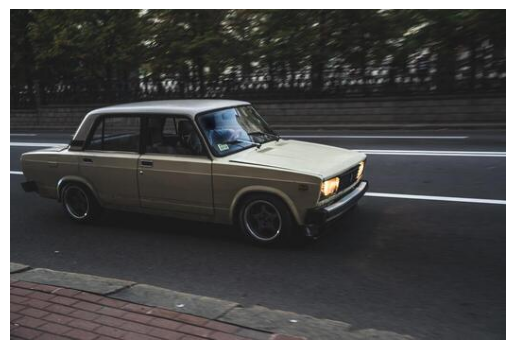

In [158]:
#base image
img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
plt.show()

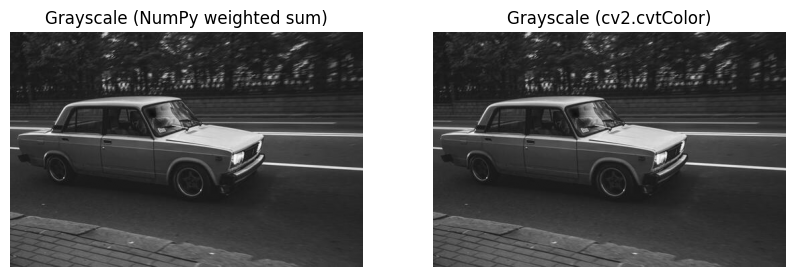

In [127]:
import cv2
image = np.array(img)
#output using inbuilt function
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

#weighted average
gray = 0.299 * image[:, :, 0] + 0.587 * image[:, :, 1] + 0.114 * image[:, :, 2]
#plot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray' ,vmin=0, vmax=255)
plt.title("Grayscale (NumPy weighted sum)")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(gray_image, cmap='gray', vmin=0, vmax=255)
plt.title("Grayscale (cv2.cvtColor)")
plt.axis("off")
plt.show()
##there doesnt seem to be any visual difference


In [128]:
print("Shape grayscale cv2:",np.shape(gray_image))
print("Shape grayscale numpy:",np.shape(gray))
print("Shape RGB:",np.shape(image))

##the grayscale images only have 1 channel and the rgb image has 3 channels 1 for each red green and blue.

Shape grayscale cv2: (350, 525)
Shape grayscale numpy: (350, 525)
Shape RGB: (350, 525, 3)


In [129]:
print("for cv2 image",gray_image[100,100],gray_image[200,102],gray_image[349,524])
print("for numpy image",gray[100,100],gray[200,102],gray[349,524])
##the cv2 functions rounds of the values

for cv2 image 43 44 48
for numpy image 43.131 43.843 48.145999999999994


## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [130]:
#B1
f = np.fft.fft2(gray_image)
fshift = np.fft.fftshift(f)



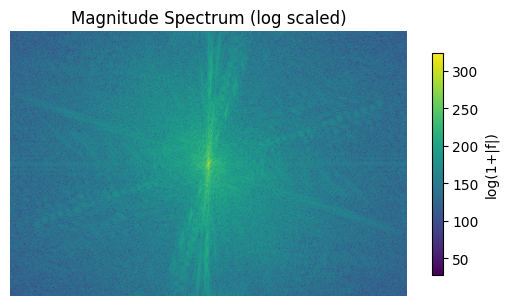

In [131]:
#B2
magnitude = 20*np.log(np.abs(fshift)+1)
phase = np.angle(fshift)
plt.imshow(magnitude)
plt.title("Magnitude Spectrum (log scaled)")
plt.axis('off')
plt.colorbar(shrink=0.6, label='log(1+|f|)')
plt.show()


## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

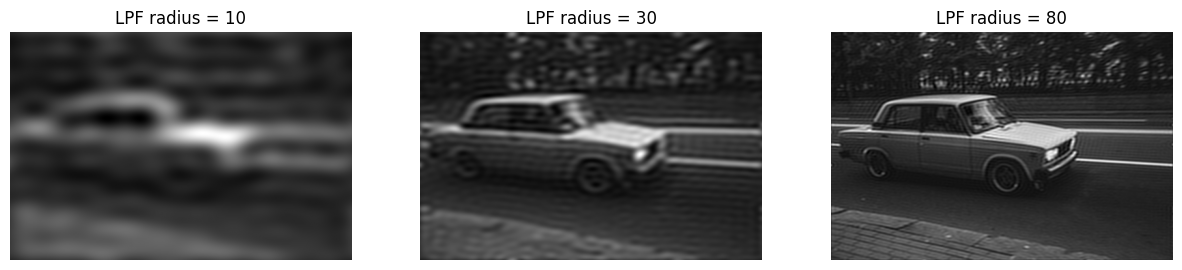

In [132]:

r , c = gray.shape
crow,ccol = r//2 , c//2
mask1 = np.zeros((r,c),np.uint8)
mask2 = np.zeros((r,c),np.uint8)
mask3 = np.zeros((r,c),np.uint8)
r1 = 10
r2 = 30
r3 = 80
cv2.circle(mask1,(ccol,crow),r1,1,-1)
cv2.circle(mask2,(ccol,crow),r2,1,-1)
cv2.circle(mask3,(ccol,crow),r3,1,-1)

#inverse function

def inverse(f):
    f_ishift = np.fft.ifftshift(f)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return img_back
img_lp1 = inverse(fshift*mask1)
img_lp2 = inverse(fshift*mask2)
img_lp3 = inverse(fshift*mask3)

##figure
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(img_lp1, cmap='gray')
plt.title(f"LPF radius = {r1}")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(img_lp2, cmap='gray')
plt.title(f"LPF radius = {r2}")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(img_lp3, cmap='gray')
plt.title(f"LPF radius = {r3}")
plt.axis("off")

plt.show()

##The image becomes more blurry as the radius decreases because as the radius increases the area for convolution of the respective part also increases which means it gets convolved less times therefore becoming less blurry when the radius is small
#When radius is small it keeps only very small frequencies as the radius increase the it starts keeping larger frequency as well hence decreasing the blur

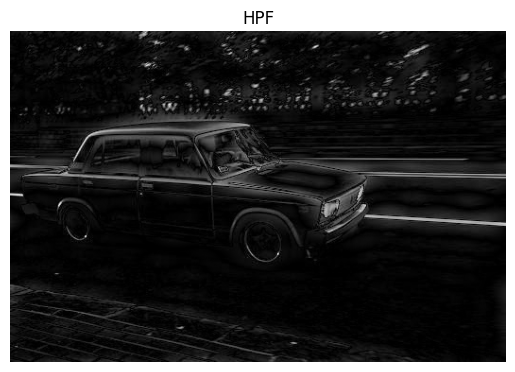

In [133]:
#C2
##I will make a hpf mask of radius 10,it will show more edges,could have also use np.ones and then cv2.circle again but this is easier
hpf_mask = 1- mask1
img_hpf = inverse(fshift*hpf_mask)
plt.imshow(img_hpf, cmap='gray')
plt.title("HPF")
plt.axis("off")
plt.show()


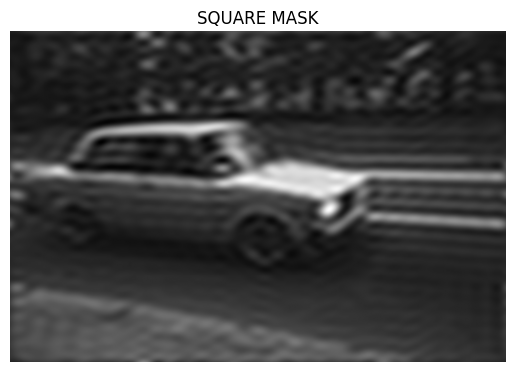

In [134]:
#c3
square = np.zeros((r,c),np.uint8)
square[crow-25:crow+25, ccol-25:ccol+25] = 1
img_square = inverse(fshift*square)
plt.imshow(img_square,cmap = 'gray')
plt.axis("off")
plt.title("SQUARE MASK")
plt.show()

## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

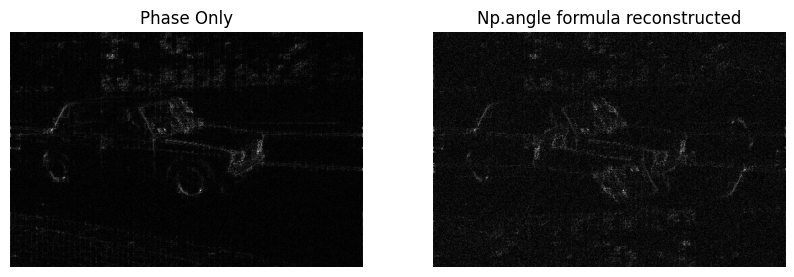

In [135]:

#D1
phase_only = fshift / np.abs(fshift)
img_ponly = inverse(phase_only)

##np.angle does not carry compelete info its a real valued function, phase_only has a complex number with magnitude 1

angle = np.angle(fshift)
img_angle = inverse(angle)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(img_ponly, cmap='gray')
plt.axis("off")
plt.title("Phase Only")

plt.subplot(1,2,2)
plt.imshow(img_angle, cmap='gray')
plt.axis("off")
plt.title("Np.angle formula reconstructed")
plt.show()
#if inverse is taken from np.angle it wont work as accurately as it only returns the real part

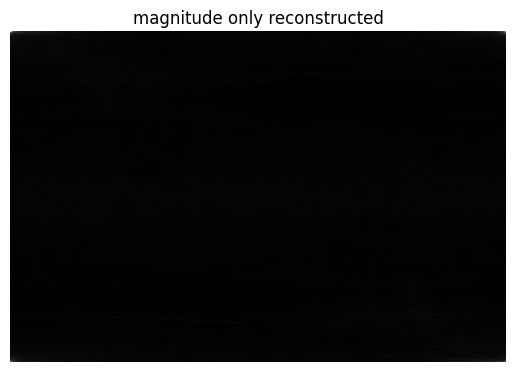

In [136]:
#D2
mag = np.abs(fshift)
img_mag = inverse(mag)
plt.imshow(img_mag,cmap='gray')
plt.axis("off")
plt.title("magnitude only reconstructed")
plt.show()
#the log scale probably helps us to display more data in a compressed form which will enhance the details making the spectrum actually visible

## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

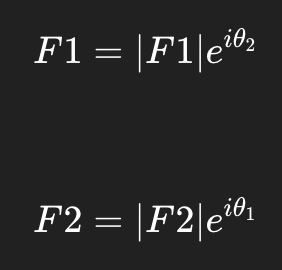

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [151]:
import base64
with open("download.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())

/9j/4AAQSkZJRgABAQEAYABgAAD/4QAiRXhpZgAATU0AKgAAAAgAAQESAAMAAAABAAEAAAAAAAD/2wBDAAIBAQIBAQICAgICAgICAwUDAwMDAwYEBAMFBwYHBwcGBwcICQsJCAgKCAcHCg0KCgsMDAwMBwkODw0MDgsMDAz/2wBDAQICAgMDAwYDAwYMCAcIDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAz/wAARCAFeAg0DASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD5I/4KSfG5P2lv2wPDeg6DqUk+iWdk+97N98cj+f8Afry79oj9l6zsPhtqWpQeXBNp6PdT+d8kl5sSue+Af2PRv2jNHuUS7u3uLJ53tof9ZGm/7j123/BTDxbr

In [152]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image2 = """/9j/4AAQSkZJRgABAQEAYABgAAD/4QAiRXhpZgAATU0AKgAAAAgAAQESAAMAAAABAAEAAAAAAAD/2wBDAAIBAQIBAQICAgICAgICAwUDAwMDAwYEBAMFBwYHBwcGBwcICQsJCAgKCAcHCg0KCgsMDAwMBwkODw0MDgsMDAz/2wBDAQICAgMDAwYDAwYMCAcIDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAz/wAARCAFeAg0DASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD5I/4KSfG5P2lv2wPDeg6DqUk+iWdk+97N98cj+f8Afry79oj9l6zsPhtqWpQeXBNp6PdT+d8kl5sSue+Af2PRv2jNHuUS7u3uLJ53tof9ZGm/7j123/BTDxbrF/cab/ZaPY2F5apB5M3yeZ/rPk/364ZwMOdHwdqSMNtwGkhYvsTf/cr1X4mX+t2HhPSv7b8u6e8gRLV3f/V/JXmOsWFzLeJDP5e/fs2JXf8Ai/U3+KN/oOiW/wBqurkRpDB5Pz/PsrqgI8yk3y37zJD8lehfBD4qP4RivLOK28z7Qnzp/BJUFx8MNY+HNv53iCzktLPf/GmySStLxT4j8PQ6HC+g2cljNIn+umREkkqOdAc/4c+HTzaHc38vkfu337Hek0PWftUk0Kfu3+/+5rHs9evPLSFrmeNJPv8Az1padr2leHI7n5J3vN+zen9ykB7f8K4vid8bvCb22k63dQWeh2vkPcvP5ccdqn8G+vsPwnoyfsv/ALP/AIem1eG08aW2qTo909+/meWjp86Jsr87PCnxk8Q+DdA1LTfDuqzWum647xzwh3T79fX/AOzfpeq+PPhpo+la5qWo32g+H3TVL15n8zy02bH/AOAV5GOp+4Yzpn2H8N/EnwZ+JWoP4esNHsZ7nXNOhS6sNn7vY/8AB9/7lTfFD9nTTfDnh+wubLTbTWbnw3O90iInmfI/yInyf8864b/gkv8ACrR9Z1Dxt8TryGCd47q60i1T/nnDDN8jp/t19Y+NLD/hX0kOpQQ79B1z5J/+nf8Ajr5XEU+SZynmknhdPgtpaa9ocP2u58QbPPs4f3kdvsq/8ePgFo/7RmhwpeQxyX+jo86O6f6v+PZ/45V/4J+NrPxl8SLzSrVEksI/4Jv9Z/wCu2k0a88O6rrD3qIlhH8iQp/x8R70/jrzZ1wmeLfsv68//CL6r/Y0L6VZ2cDwXVtZx/8ALZ0fY6V514C/b/8ADHwz1zxVpviC/wBYg1LQ9OurV5rlNkd5Ns++j/x1Q+Bms634S/aM+JD2/wDaUk1vO6PZ23/IMt/3H8aV8zftyfDDR5fC/wDat/rFp/wmfiTVIbp7OGf9xHav990T7+yvWy2hzzM6FD3zktY/aqm+NPxssL/xrqus6x4ejvUeyh2b7eNN/wAn/A65j9q+b+ytdfw9pt55lnrH+nWttbP5nyTfcT/frx/x5rL+DtLfREeNJrefz4Jrb/VyJWR4M+IN5/wm1hf3819qN5ZlPso37/8AgFfW06HuHX7M+lfCfi3WP2ZfDngyZLCe6h0fUX1Gd9j/AMafcr7J+OGsv4j/AG5PhFrEWm3UD6pau97MkH8H2L5K8rt/Hnwui/ZjvE8Q6rBd+JNQtdlrpXno93G/yfwV6d4H/b68GfEb9ozwHbNYQWPh63g+ywaleIieW6Wux/n314eIocs+cXsz1T4hiz+AfwP8Q/Fq6hjnh/tCySD/AKZ75/IevofxR4js/jR4f0HxtZTR32m+Xsg8n5/L3vsryLx54E034n/CebwH4gm8jR/Gk6T2Vt5n+r8h99eqfAf4S2H7N3gdPB9hrEGpQ26b4Laaff8AuE+d6+ZxZyzgb3izwvbfEH4bXOlSpHdpb/J5z/6yT/brzH4mfCDTfG/wL1LRH/cXNvpb2Vrc/wC3s+R69j8H6hYa8LPUtJm/0a8g37P+WeysfVLW2/tC8+3p/oF5e/ZYET/lnvrkp14QNvsH5DfCv/gmz4+1n48X3h7XoZH03WIPI/tL5/L8l3/v7K5j9pzxnrEX7Q9hpXhS/ntLT4aQQx2v2b/WR3MG+B3Sv1b/AGgPi0ngPwnrdtpfkSalpenP5Fsn/H3cbP4Er8m/A5f4YfGPUb/WdNvb7VfE9673qXMe+OzheTzPM/2K+ywOMhV3KPa/iJ+0F4k1T4B6bZ63Z6HY+KtQd/IvEnfzLj7n3/8Ab8uvRfB/wlh8b+E7a81bVdSkmkj/AHd5Dsk8v/gdfK/iT4c+KvjT44sLy3/eabJO8GnQvv8A9HdPvulewfs1614z1jw3r3h55nks7PYn7nf5lvXNmOFhOHuAfRtubbxb4fttHg8bRz/Y4HSD7TdInmPXj+qaX8WfhB8K9bvL2w1LxVeR6vZR+TeI72mz+P50rp/2c/gPN4X+LGzVLDz9N0dHSO5vE/4+HdPvpXovxg/ab0f4cmz0fXtY1VHuI32I86fZ7x/4K8Gh+6qGZ8u/tga94k/aH8efCjwls1HTrzULqymSGzTzLfS08/y/kf8A6Z17l8dPgtZ6X4TTwx4j1i01y809/svnXM6STybPk/77rgPEnxV0q01D+2Lr7dY69bz/APEreH93Hbp/t/7G+uP8P6D4h8R+OLzxDe62msX9473SJczu9vHN/f8A9yvbrT9vyG1M8F/aY+Afhmw1/wAuKdNNbycxhNnnyf7/APsV5t4X/ZusPGNnePb6x515bp/y2kTy67n9sjVNK1744TJZ3N1rM1vpcPn/ANmv5kcd1vfej/7FcZ4DtLn4q+JPscVzB4cs440jd7N/I8z/AH6+noQqQgd3/Ls7bwv+zpo+l2f/ABIX1HVde2fPvg/0eP8A3HSn6h8GryS4s9K17UtS0OzuN/zon7uT/vuvUf2Z/Adz8ObzUrm31V9Rh2J5Ezz+ZBXeWfw5tvjJ4kmsPEsOsz20n/Hk9n/q7N/9vf8Acrhr1+WZy0z5Ctvga9p8ff8AhGJU/tGw+4lzN/q469v8WfscTeHLf+xNI1j/AEaS6S9ns96eRG6fxp/uUzxp537LXjO/0fWbCe7uY/kgv7lN/wBo/wBtH/4HXGax+2Rr1ho9/ol1psEeqxz/ALi/2fvJE/jTfW825l+0PddQ/Y9s/CXw6TxxPf2uv3ccP2Xe8iPd27/f+RK9g/ZW/ZasPiro9nDq76lJZybLrY8H7zfXlf7G/wAKvG3xa/sfxt4luf7G8H2+yB7Z3dLeT+Pf/wB8V9geJLrXvBtx4k1jwpqXhiTTbfw1s0uGzd/M87f8jvXhYr3Z8hhUOA8MeDfhj4S/akufAGl/DrQ4P7HsodU1DVXgdJ9jvs3/AO/X1LJr1tYaPc3llbfYdBs4E+TZ5cn/AHxXzZ/wTvittZ+IviHxJ8WrPUZ9b8UQf2RvsE/dxwo+9H+evorxpqlta+C9S0q4T/QLj5IP+fvZvriqe+Seaf8AEq+N3ht9Ni8Q3cCXkj/Yr9HTzI9j/PXxb+0Z8ArD4VfFTVbaw8SXXiO58QTol1DeOn9xE3vs/wB+vofxb430f4Xiw0Hw9ZyXWj2bu7zInmXcbvXm/wC0B4S0Hwl8RdN1htS8y/8AFH7+d7mT/j3dNkexKuhX5PcMzwH4u/soalo2u+FfCuk/2rfWfh9P9d5H7jyd/mP89dz+1Z+2Hc/stfDvTfDfg3yJ/wC3LHyLq58z95Gj+Yjp8lfRX/C2tH8L/C/XvtkN3BN9leDzn/1m90fZsr8wfjJqr+Mo9Nh3z3Wq/akgghm+f/gFfQYSpzm1Mxfh38Nbn4v6v4wv7x/tT6fos2op/wAtP46880CO8sbOZIvk8x3jnSvqj4bxWfwluPFs1+lpY3Mng14Xtv8AV+ZNv+5Xzxodo+s6heXiwvBbSfO//TOvUhXOj2hxWoI8t+jXGY3Mmz/gFWNP1kaNr8NzFbo6R11XxM8Of2zFbalYWz7P9Q+xP7lcr/wjl/a3iWbJ5f2j+N666dTnL50fS3/C5NK/aR1TSvBmr3kHh/w3JazTvc7/AC/nRN6J8/8A00SvPY7rw9pev+G5rC8kgSRHhn2bPM+d6qfGf9mbVvhTJ4ftmt7u6m1mB5kRE3/c/uVyUfgm8tdX00PDIlxqEyJHvT939/ZWFQyPu/8AZP8Ah94V8G+INb1iw1Wd4dPgmgd/k/ePsr2/4N/D7wf4y8D+JNegm+yaxqEE1k9zDs8zY6fcrxb4X/sH+LfAWl3mpS37vZ6pp0z3sMMj/wCjzbPk/gp/7Pes2fwf+B/jD7VNqr3On3U06TTf8e9xMifcSvDrwMzE+LngK/8A2YPEN/4q0rQY9V8N3Gl/Zb2aZH8zf993+Svof44fDnWPgF8L/Bl54I1ufUrnxZZWuo+Sj/u7Pz4N+z5K4P8Aak8W6l8Vfhv8K/Ddh8ln4wntU1GGH+5PB89Yml/FbxP43+LnhXwNoyb7DS7pNOupn3/6OiJs/wDZKK1f3DX2h9P+IPDk1r4X0e8uraOTVdUgRLq/T/X2+xKufFz4ta9a6hoPhWw0HTYH1BHefZv8uPZ89dz4bupv7Dm+1WFpfJbwIn3PMjrgPE/jL7V4kmv2027/ALNs0ffeOn7yP5P79FDFh7Q2PC9/c6p4A1K5SbzLPyHdE/55185fCvxa/wAdJZvBmg+XPNqiO723/Pu9YN5+259q+FepWfhSF50j/cu8P/LTfXkv/BNPxvrfgj9tDTby1SeSG8f/AE1/+Wf8HyUU4GR0/jD9jeb4c+G9eh03TY77XtH8Spa6jNCnmSbNnz/8Ar7M/wCCd3hzxhrPwj8W/D3VtVu/D9nrmnTXVk+/y/v7ETZvpn7MfjK21n/go58afA2s2clpZ+LNRvdR05L+P+P5EREr668Pfsta9YSW2q3Gm+Q+hz/ZYIUR/wB5Cn/slepTp85rTPAf2X/2I/Fvw01zWNel+wx22jo/+mTSbJLjY9fAHxI+IOq+KPiJ4he4vEn8vVLpETf/AKv53r94NQtUl/Z78Q/2j5cdz5D7Eh/1cf8Av1+AnjSXyvHmvQxW0Ec39r3Tu6J/B5713+w5TTnRWjtZorKGFHj+373f53/d17x+wZZaBdaX4lfWZ/KuzLb7vO6HiT7vtjFee+A/g3c6951zqiXUGlW6b/k/4+KXwJ+zzrfie51E6xJPpawSAWscC7ZDGSxzJ71EsXaPIHOi9/wTP+C2g+KPjhr3iS8fz7mS98iCH/lnGj7KZ/wVY0FLDxZDpsUPnppd1/aLvCn+rRN9e9/sl/BGz8L3Ntquk3McFtqH/Exukf8A1lv/ALFU/wBsT4S/8J5HqusWFtJPDZo91dTP8/2iH+4leHPHGHtD8yvjJ8JbmXxZolgth9lm8QWsM9q+zy/v1a/Yl1nSvhf8WNS1jWYY76/8L/vLWFxvjkdH2fcevUP2kL+5sNL03VZURL+4RNO0tNn7y32J8j1m/s7/AAwTwno76x4j02d9K1Cd/P1X/lhv++6f367qGK54B7Q6r/grR4ttte8QeHn0aztEsPISd/JT93I7wJXxtqlqkvhxLxpvLeP7kNevftMfHe017RrLwzFbTvcaPPI8dy7+Z9oR/uV4lb3L39nNC6P+7/8AIddFBTNjNkv3ptnE99Ls8xE/36tjRzc79i7/AC6htLHy9QRP9Z8+HSuyA0dj8L/CyXvijQmu9Rso7G71GG1m/wCmSP8Ax19tWfx3sPgj8LPiLpVr9hvrO88PTadZXiJ5nmP/AL9fCvhvUP7B8WTXP2V57aP5/J/5517J+0f47sNG+Heg6JYOh/teBNRn/wCeke9PuVjiqYTPoP8AYB/aL8SeLNN0rw8jx6Ppv23fdfZv3H2jfX3t4o+I03jzxh4Y8MS3Pl2Fn87wp/rJN6fx1+Sv7Of7SOi/s/XMN/Ekl9NaIk3k7/8AWV9DfFz4+3nxk1C8+J3gt7vztU06HToLaF/3dnND999lfNVcJepeS0OWdM+urPS7z4X+NNS8SRXMFjptm6JA7/8ALTf8lel6P8WvDHww0vXrzxR4ngurm4RHfzrrzI432fJ9+vy+vP2yPiL8S/2X7DQbyaD7NJdP595DB5clvsn3/O++sT46fH3wr8adYvPsV5rGmpZwbJ5pr393ePs/grjrZNefOZwpm/8AFX9v6/1jXPihpXhJHe/8S6vDqMd/Yf8APCCH5/n314J+0t8QI9Vj8Dara6tJql1caL/pX77e9u+/7leS2mqTWF5L9luPIfY6F/8AYpNE11LTULB70JPDbyJ8n+xX12Dy2nCHMjrp0ybVPEb+I9UtnlT/AI902VW0u6e11SOaB44H8/5Hf/lnR4v1SHU/Ek1zap5EO/5KI4vtUf26Ly0S3/gf/lpXTyG3IegeG4NW1r4g/wBnX2k6ld61qdtBHp9vD/r3/wBtPyruPA/wM8Z3XjSHwfeWepWPie8nR9LsH3pJ/ff5P+udcJ8B59Qh+MOj+ILp5549Hkjnk2P+8Kf3Er339nvw5qv7XPx0R316SDXrd/kuYXdJLdPn2f8AjledjvdgXyQPs/8Aa78L+Lb/AMceD/7Z1h9Dm8J2UyQTWzvBb6hvRPuVf+H/AMWrnWfgnbXl/f6lY69Z7PI+0z/6R5O/9/vr134d+A9N/Z9+G9y/jLVYNV8Sagn7iz1LfdSbE+/s3/c/d14V+zX4o8MfGn4yeIfD1rbT6bDv/wBFtrl98mzZ89fnuY+/sedW+M+h/wBnv9q/RPiD4Qm0rRvL+2afdJaweTs+5XoXw3+LUOsePNS0TXrnTtmnzv8AwfvPOSvBLz4GeGP2N/Glt4ztdYgsdEuE/wBKhuXd/Lf+D/0CvFvi5+2Rpvxa+MF4miTJaWce94Jof3cl5Nv+RK8enhJ16nIY1D6x/ac0uHVPiA/lf2bptnHpyXU9/cp/Bv8A79fGfx98ceHtZ1hLnRrPTb620/5L2/SBJPtGz/brjPjZ/wAFCdVutLv9EnSSC5uLL+yHSb55NleD6P4tudU1i28PRXLwabcf6Veu7/6tHr6nA5bUgZr2h9seF7/StL8N6Jrf+i2r2bu6Wyfu/wCCtX4L2Hh79n742TTXt4n2bxQm94bl/wC4n/2dfJFx48fwv44sPB8tzPdXOqImzY//AB7ps3o9dDrnxG8Q38cKNZvdJZvsS82f6uuuvQnSgach98/BPS5viF48vLyK5jgsI0dNlz/q/nSvLviB438B6P8AHybRPiDN4cj03Q96adc3iJ+8+4/8f+3UPwL+N2m/CXw/c2d5NPaX9x/r3mfzI468W/aA+I3hXxH40TUtXeDUr+N9lqif6u43/wAdeH7OftAOn/aE/aH8JeLfEFzNF4eSPStHtXtU1WGBEtLh/wC5/vyV8kfGO+8SfD+z+33Wq3enabrifbdOdJ3T9w/3Er3L4Z/Evw9a+MNWm8daU8+iWbukCW2yCD/gafxvXjn7c3xl0j4x2ENtpSR2mlaW++1/3E8zYlfR4ChrqbUz5+s9dh13XLzyL/7C9xH+/md/3lw9bHwnlfRrx9N8799qkzpA/wDt1lar4JsNC0T50ne5ktftUDo/9+uk8F2tho3gu21i4m/4nFnO7/Zv+Wlun8D19Vye4dx9Cfs5/Eu5i1jVbOW2j+zRoiWqOn+sf+OvTvAfxf8AEnwM8J6ref2l4Yu7OzdPPmuYHkk+f7nz18T2/ii88O+JNH1X7f8A6BcTv9z93X0P+2BqGj+KLfRNB8FXMk9hbpv1D955n2j7j/8AxdeJXoe+cZvfGjxE/wC1V4L03xDfp5l5Z/6Lvtv3ce93+SuM+F//AATe8bfErx3M91eR+HE0efzN+t7/AC7jZ89ezfAvVPDF18A9e0eyeC7udYurW6snT/lmkG/fXZ6H4j8T/FDwHZ6PFqtpa2ehzo+o/I/2uSFPnf5/+udZVJzh8Bmex2/ghPCXwT0fwr4o8SaH/pEyPA+j74LSRNmzZ/v1z3h/4v23/Cn/ABbeRQ/2bYeH57rS/sdz/wAfeoJB/HD/AL9eG+NPj7bfFr4oW3h6wefTdN8Pz+Tpd5cv5kd46P8AJXlHxF/ab1LVNL17SvsE6JZ3s1ldTJ8ke9PvvXD7Cc9wPqj4d/tS6Jdao/mzSaPDb2qPB9pfZJI/9yobj9ozVfEfxItpotbtZLCP7iO7yV80/wBqPa6fDc6i8Eltp+nQ3sjwps+T/brzfxh+1zDpXjC2/s6zd0j/AIErengecD6i0vx5jxhqV/q9/A6b0+yw23yeZ/fqH9qDxbpvi34f2D2syfafPh8h3/5Z/PXgPwq+KE3xB0u/uVs54LmPZs31W+Nfhi5+JPh+we11qPTrzS3+ez3v5lx89diy6Ach618YPG9zf3Gj6U9/BPbSfJO6Sf6z568X/wCFGaxf/tN3lyySR6Jo919qR/8Acf7n+/Uvgvw5cxW+q+bczz/v0ngd38zy9iVZ8WftA/8ACO+GpIZbyBLy/tX2f89JKunT5Ni6ZT+PmgprOuPcxXPmPeT7H+f/AJY1g/DPwbD4c1j+xL10n/tD5/8AgD1Q1D4yabYDR0un8x5IESd3/wCWdYPheLxD438ealeaNHPfTaennoif88d/yV08nuc4z3vx7+zxo/hf4DzX7XLyXl47pBbQv+8k/wByuA8afs+3ms6hoNzp00Efl/6/zv8Aln/v19Iax8L7P4c/DNNK1nW7R9bvLKG9SGbe/wBn37Hqb4PxeFPiD8QNS+Hs9zHJrclrC+nXkL+Xb3Hyb3TZXL9a5fgAPHnw0sPjJJ8OrbVtVj01NHgukebf5dxJv/266r4mf8E7NK8UfEzwlqXh93neT/Sp7ZPnjj2On8GyvPdLsYfi/wCE30q1S+g8T6XdIlrN5/7uNN/z70/3K+pdPv7/APZ48Lw+KvFF/Bodtp8DwWttef6y4d//ALOsJ4qoB6R408OTeEvhvf3O95IZLpP++P8Abr5U0fxHoPxBjfwlFYefeXHjJJ5khjTy/suzZ/3xXselfGTxJ8c/2c7y/uNNn0e2vLpJ/wB9s/efJ/Bsrof2U/hV4b8EaPeal9jSfUtQ/wBKff8AvJI/9yuWdeYHm/xAtZovix4eh0nTbT7H4bnTYjwfxp8mxK9L/ZX/AGfdE+Hv9sa9qT2iar9qn1R0m/1nzvv2V4t8dP29dS+EGqXmm6D4Yge//tF995cwQTx26f36s+E/2wrfxn8RPDFtef8AEn17xZs05Jpv+PTfs37/ACaJ0JgfVf8AYN5deD7+2T9x/aD+ZZOnyfx/x15X48/Zz1L4jW/iGw03xJ9ktvEHk74fPf8Ad7Pv7K9a+A/ii5tdYubDxN5fkyfJZP8A883/AI3/ANyqEnwqfxv8aPGFzb3k+m6bbpDOieY/+kIifPsrOhQqAeY+F/2D/hp4E8B63oOl6lA95qGx3/ffvLd0/wCAfcrH/Zu/Y303RtPs7O8vLGfUtDnTVIbzSv3cmqeR+8+R/wCP+5T9U+KHhjxvp3iTXvCT319pviB08hIZ/wDSLfYmz79dV8A/hpf6D8F9EsNbv5L651S9tdR0tLN3gu9LRH+dJn/jr1KYHs37Mf7Ptn8eP2nNS+KN1YT2t59t/fwp8kml3XyPsevtX4wfEuH4c+A9SvNX8/7HbwOnnQvs8yvkv4Z/tGax4M8eeKrC30qPTnj1fz57nyE8i8T+N0Sq37Tn7QWt2ulzaw7wT2dnB/al0jp5kH2L/crvp1IGhj/D79vTW/FFn4/h8faJJ4S8MSWU0GiPcweRJJ8/yTu+/wCdJI6+A/iBaeGPhB4ss9S022n1K2uNUmvZ9SvNk9pIj/Psrrfgn+0P/wALl+OniS5imjn8MRwb54bn9/HH+/8An2f7Fee/ED9gXxP8W/jRePoniF5/CUiJOlsjv+7d/v1hPGzJ9oeteKPFvh74S+INe03Ubn+yk1yytXhub9/9Ej+Tf8lec/Br9oTxP4Dj1KHXrPTfGVpcOsmnX2nwHBTL7gzNyxzjmu68YfsW+GPEckN5rOvX0/hK3RIHmmvXkkjdE2ff/wCulcJ4k/ZQ+BHh/WprTV/ibeWjRBRFHBq88KgbR/D9NtcjnOcyj7O0+XTbnS7zZ5drD9ldPkSpvAcug/2H9mlh+1JcQeRPvf8Agp/ii/trCS2sILOB33ok+ybf5dZWqeOPB/w51Ca21y/ksYbiD7nkO/mV87OE5nOfJf7fnwqsPFun3OvRJHAngd31F0RPL/cp8lfnN8R/ih4k+yfY5Zp4LOSd54E3/u5Ef/Yr9Fv27P2ufAfjz4f+IdE0a5n/ALbs7J0g/cP/AKQn3ESvz006003WI7+88UX/AJDxwbLXYnmeY/8Ac+Svqsrp8sNS6Z5jeX82s6hvl+e5krpPDeg3Os6wj2v7hJPvu6b66G88OaDo2jpNBc+Zfx/Ps2VQ0K/v5bOws7BJI/7QmRHf/nn89ex8J1Tmdt4P/ZufWtRsLPZJP5iO7zJ8ldJ4/wD2Ctb0u4sLx/3FneWrzpXsEktzoPxb8PfDTQbyPVby3/5CLoifu/uP9/8A65vX2l4X+C3hj/hojQXv7ae6TQ9Om07yfn8uRHdPnrw8Xmnsjl9oflaf2QfGfhjw2mpW+iT6jDqD+RBMJ0TzEf8A2Kx7f9nTxhc/Euw0HW/D99PeagiQ2sPnf6tH+5X7C/HH4VQ+DfD/AI28eaXo/wC58L6ddWtlbb/9YiJvR689+KHijXtB/ZT8K+P/AAvpXn699lh1Gd9n7y3fyN/8dYU85nM29ofEOqf8EifipFrKWy6b5Fs9ql1529H+R/4Nm+vefhL+yjZfsweHJPCXj4PqFn41T7LHcQT+R5bp+8/g+5WD+yx/wUS+IvxV/aEmtorN77xVqiJpb73SOOREf7n3NiVk+H7rx58Rfj545tvGVs+m3OnwI/2OZ/3cib3+49a1J1JQ5GHtD4t+LOl3/gj4h6vprzXTw27/ACbJHSONP4K5y/hm8O2iJFc+el5X0P8AH74jWGgnxbp2pWsB8U36QJbOj7/scaf+Q3/d186SRTf2fbO0P/A99e3QnCVHU050UYZvsx3tUFxcpNcb6ujS5rrUkh281tap4E/eQpAkkj/6t9n9+t3iIRhysOdHNySpLHWlo+qPo+mb2h8xN/360rfwHNYXmy6heB9+z567nSPhfoniPwXeI9z9l1i3R3tU2f8AHw/9ys/rUA50d/8AEj9mTVf2WvA9t4hvNRtLq28WafC8CJs/d703/wB+vUf2WvB3hX9n34T6b8S7/VdnjC4nm+w2CO/7v59m9/4H+R68I+B/7MOpfFHxxqEN5qN1HpvhyyS9upn+fy0f5K9o8T/so6rdeKPBvg/RrD/T7yeZ43e68v7R8m/+P7leRmU7w9wwrn294w+FWj/FX9jfW/EPhnVbv+3pPJ+26lNO8kce9/4Ef7leM/A/wxbfsj/CC21XTZvP16TUbXz7x33/AGhPP+f/AHP3ddPefBv4wfs0/s96rokvkXWiSeT8/wBqg/v18zeNP2h/Deg+H7nw9qN/Pp1nE/mWqJG8/wBodPn/APRlfPYLCznPkMKcOp94ft6ftI+A/j98N0v7e/S7/s+RPtWmwo8Hl/x/fr5a8B/tQeALrwveabZeCZJ5o96faftuzy4f7/3K+QtY+PF54y8To7w+RD/r7q231wHinxJDqnjya5svMSHz9/yPXpYTKeSsdXs+Y9p8S2um3/ii/SKznnhvL13g3z/3/wCDfWDceDf7e0PW3gd/7Yjg2IiP/B/BVbxJ8fUutDsNK0uz2eXGkbp/t/362I/HlhLrGiX9lvtbnekN6mzf5iIlejyeyI+A4278MeJPGWmTeJ5bx/7R0dEjdE/1mxP3aV7v8C/EepePfB15C/z22nvD+5/5aSfPWb8M9Zs/CXxNhhitt/8AwkHyP/6HVPUPAc3wWvNS/s7Up/tN46fZX8j/AFm9/n/9DrCvPnM+fmPof42a9rfgiOzuYrm1vrmSPY8yQJ5cledfEjxS/hu30R9ZsEu7aRPk2fu/469U8J/s5ppfwLuf7Z8x00+eGCBP+u715v8AFSw0rwlrFz4P0m2/tXWNDvobVHd9kez77vv+5XlW/eElPWNB/wCFg+D3udLs302G3fZ++ff5j15X8ZJXsND/ALKvEgk8u1893RP46+io/wBl/UviPZzWekX/ANuubdPtT2z7II7fZ/t14VcWsOl+JNV0q8sI7q50/fvff/HXq4UqmeS6hLbePJLBLD5/s8CQT0eENG/t7Q9ev5f3cNmnkP8A8AerOjyvoN7r0Ngkf2mRHnRN/wDq/n+5XVaX4SSw+H+paJ/q7zUIPPn/AOB17v2DopmV8I/hzpXxG1CHTb25/c/wJXqlv4NufCVvZp4e/dpHvTzpv3nmf9918zR2t/8ADT4gQ/Zbl47m3+dNnz161bftXX+oa69zrNmkmj2+yPZv/wBXXm16fMZ14Hc6PYTeHPHlzMutwI9x8mxE8uOPeldD40+H1z4N8N6VrH9sT+TG6Wt66O/7ze9eV/EX+zfiBImveH7CS0023/do+9/9I/26x/DHxy/tD/im72/kk0/f/crH2BHsz6usPG+j+PPAb2eh+Rp02lwbILl03+Y6fx18/W3ii/8AtF5YatcwbLe9eed/I/4+K4/xx8c3sNUhsLC28izj/wBF3o/+s/265LxR8SrzxTb/ACfu00z5/wDrpsraGF5vfGewaXr0PxQ8P6xpsVz5dzcI8CfJ/Bv+SvPbP9njXrrxB9j1F0SG4+RJtld54X+L+g6p4f0fRFh/4ndxs/gf+5XqMf2PxHp9tCvzvb/f3/u6P4QHzP4w+GmsfAzXIns7x76z/wCW2z93W1efF9/EWsfbNJ+eG3+R0/364bxZ8UL+w8QXkKzSJDI7o6On+srB/tC2i0SFLV/ss0nzzf76fcrrhT54c5rTpns1x8RnsNY0fR7xPsM1wmyd9/8ArPnrI/aj8JaV4XNm9vc+e8boif7leP674uvvEcv2y+uTPdxv8j07W/GN5rUcKXnmP5cexKv2BpyI6r4f+ErPxl4s03Td/nvqE6J9/wAv7On9+vqL4d/s8Q+HP2pNKtrK/jSwj0u18+FP+Xz5/nTf/BXxn4bmSK8tvNd0Tf8AO/8Azzr1X9lS6+3/ALQmm2FvrU8aXl0iI7p/rPn+5ROh7gciPX/2vPCXifwl4sfRNU0272aW/wDaMD/av9Yj/cTfX1p8UPiD8NLD9nOz8Q2EKWPiHw3ZJvm+dJN7oiV8VfG/9oHxOdUhs01iPXMahNZQI6Inl7KZ8WPjLqvxy8P+HrPUdK/c2e/z0R/9ZXm/VeUz9mUP2VNZ8VeI/iRf+IdN1WOC8j3u6On7v7j/AMFex/Bv476V8RfiJqT+OYb6PTbe6Sy3zXTyR+dN9z5P9+vGfg/qmm6DbvrGk6VJBqUe/wD0/e/7v/gH3K2PGeupdnwfrsum/wCmao+zfv2fO82xKzqEezP0I8Sfsta34D8J6bf+GtVktfLnS1S2m/fxyQv99/v1wHxD/bIvPgP4guZrXSn1jxDp/wDxKHhR/LjkT+//AHK91+Gfgjxb43+Dem+GL3WPI1iyg/12xPv1wfg/9jLTb/xxf2fjTWHu9St3eeT9x/rE/wCAV5ktw9mfnr4H+Ml54y+PniHWNcs5/Jkne6SF3/485t//AI+le1/tEeA9EsPFmj+P7K8nnTR9OtbpHhR/3k2z50RP4Pv19D/HD9m74V/Dnwn4n8baN4DTxBqXheyeedHvZ4PkT+Osr9m/9r681n9m/wAefFGw8JQeGIfDekeRpdtv+1/voHj/AL6f7dev7T3DY9d+Ees6bLp7va6bfaVbXmnWs9rc3N08/wC+2eY9aXhf9siz8R+B0efUoPDFhp/nQWt5NB5nmfwPXi2n/tI3Pxfk8Jalr1+k/wDwkE7wPbIiR/cT/YqH/gpf8OdV8W/sF2etvpX9j3+jz7J7O2fz/MR50RHrD2nNMD2/9n/xT4e8L+F/7Ktdb0rWNS1T9++pQ2XkW8ez+Dyafofxk1jxHrevQ2sMEH/CPv8AYZ/uf6RM6fJs/uV8Q/sOeHL/AODmj2Gt+I7973Tf9RpFtN8kmx/kf/x+voTx5a2el+NLmbwHfvBresajDe6g7p/rNn+//sVFQzOD+Jn7SPxO1n40ab4Y0GH7JNpbpdaojoj+Y6P86V9V+INQ8SfG79l/Utb1a2/sqz0+N7G9m+T7iJ89Zvjz9mTXpfgvrHxI8NaVHrniTULr/SpndIPLd0rV1DXvE+tfsXv4SWbyLy8st979z93M8HlvXJOoZni0nxp8MaV+zPrD6N4P/s3W40eygh+1J5msbP4/9jfW98VPiXoMuueGIb95LRPD+l22qajbWzvHJp6PBs3u6ffqbXP+Cf8AD4t0zwl9gv3sdYuIIUeZE8yOR9n+/sqn4f8A2ZPN1TW7n7TBrN/HB9ikm37PM2P9yhV+cmmeG/tUfH3R/wBnnwPZ+G9L8Tpfab4gd5JEeB/3fz7/AOP/AH6+V/ibpPh7wr4lkvbrTdS8Twaz++tpYb941iVQB93tuzmtPxv+zN42+JXjR7PxRc/ZUtLqb5Pkfy0/gqfwh8IdU0Ke9tXuvtmlxOo0+ab9wzrg7vl+uK9ahUUIcpset+MP2gvHPwb+K+lJ4Q1v+2Hk0Sa91d3dI49iP8//AI5Xuvx0+I1t8Qf2U/BOsa5YPPf6pdQzwTQ73+R4P9ivir9i7TLPxv441LQZby7gS40G6T7YifvJP9ivuH9n/wCF3iS68FaP4Y1J7R9B0dE/s55p/wDSI3T5E+Ss54WnAzPjb4t/ALXsaJf6M7wJrmr/AGXZD88kabN+969I8cf8Etrbwl8Prnxt4g/0S2s7JJ/s0P7+S4f+N9lfU3xn0Ww/Zg+AnirxHpthHfa3pdrNqHnXPyf8Ar0fwPav8X/hfpWsakkk8N5pcM91bTJ+7k3onyf7lcvt5wMuc/Fj4sfBZPBGuWdzsu0s7x/kfyP9XW9LdQ6N4P1JIpvMvLjZ9ld/3flp/HX6R/tMfsbab8R/hHf3nh+88+/jf9xDNsS3j+f+/XGfs9/8EVtN+MniSHXrrW54/D0fz+T8nlyf3/8Ax+un69zGk6gv/BCj9j3Tc3PxF16wt7qGfiymmk2SRo6Oj/JX6OeMPA+j6NqE02lpHJNqCOmz/lnbp/sPXzf8XLVP2dPB9zo/gCwggsLPZB5Nn+8kt3f+4leRXHxz+K/wh0PTfEPiXVbu70ezg/5Brv8Ax/wJs2V4OL561QwPsnUPEelWFumiXV5HfW2n6c/nw3P7jzErzrxx+1p4J+A/hdH17fJbXD7ILaGB54/sv8CfJXxn8fP2pdb+Jfxs8JeKtj6dYSaCl7e6b/yzkTz/AJ0rm/BXiPUv2oEvNKlTSrX7Rq7/ANnQvdbI44f4Kzp4XkNDotQiuf2c/wBrvW/iX4V8JaVqPhLUNIh1STZev/obu7u7on8b/wCxVi8/aqsP2r/hX4tvPFum/YfFVumyB4d7+ZDv+Tf/AHPkrm/iJ+0jrfg34X2HgnRvCWjQalJqk2nPco7/AOmbE/j/AO+Kp/C/456D48vLnTbfwlofhWazRI9buYXdI9QT+5vf7/z13VJv2fOaGd8Jv+CUXgr43aNZ3N5451LTvEmsb3SwtrJJ449n+3vrzD4s/wDBNjxb8JdYe5tXg1XR5EfZM86JPcf78P8ABX6ffBr4S+APCeoaD4h8OQ30dzZo/wDqbX9x86bPv13Pjj9lWw8Ua5c6ql/PG8iP56OiRyXD7Pk3149HPa8Z8lTYr2h+C/g7wImseJLDw42myf2vBewxzff/AL/z1963n7DPh74VafbaxdeZYw+IL1IIH2f6u5f7lM8B/se634X/AGoPEOuy6b/pMWrwp/10R9m/ZX3V8ZPhzYeIriz0TVrPTr6zknS6tUd/3dvs+4/+/U5lns+f9wUeG+LP+CbHhL40eG9Khv8ASof7Y0u1Tffp8/2h0/g+/sr578ef8E+/D3w0+Pnhiz1JPsOlW91DPe3mz/Vw1+kHw/urn4feF9YSwe+vodDsnukhmTZHI6fx/wC/XzT/AMFK/DGsftF/syf2robwWN/vf+0fsz/vJIdn3H/7aVzYDPJzqezmB8AeLfjTD8INY8SeCfBqR6rYXl1M768/ySbHf/UbPubEqnJ/wUF1uLxZc6rqMP8Aat/HBDa6RM7+X/Z7omx3T5K8u+Jmlv8AAPxhDpsX2S7+2WsLzwu/7uTf/frz3w/NN4j8T7Lq8+wwyP8Af/551+hUaHtaPOT7OZ9yR/tpeLfHn7G+seEtUubtPFUk8P8AxMtm/wAxPP8A9zZ9yvjH432N/wCEPHl/oV+ifatLmSP5H3/7de0Xnxzv/hV8I30e903R9VfVNj2t/wCf5k8ex/40r5y8V+KL/wAb+KZtVvZjPf6hOju71phcKoTLpwO/t/Dlno2jw6rezbLy4g+5XK6BYXOs63cvb2yJDv8AnffXSeG/hXrnxZ1RXkmtXSwj37En312F54Js/CWlp9q1WO0S4++iOlbzqe/7g5z5DzGzlvI/FaJA/lxb/nevVPCfiPRNeuNN01H36l9q+/srK8cf8I9oPhdLNJoJ0vE/10L75KrWmj6d4Ot4XsIkkfyEn+0p/rKwn75n8Z7fo/i3R7Dx5f2HkwPf6XawzwTb/wCN6m+DfxB/4W/pdtpV5qV9Bqsj3TwOlr5n3N7/APslfMGjx6vL4jfUvt88cNw+x3/5abK+gf2a7q/8Gyab580cCW6XX2WZH/eSb0ffXDioQgRUpn17+z98ZLn4g/sXul/D/aPiHVPn/wBJ/d/Ijvvr5L+MHjKHRvEnhtNDSexezgefVIUT/WOj7/8A0Cvo39h/xdokv7Mej63q6WN9eaXvtURH3yb553+/Xzx+05Ff/DD4weJ7+e2TZJP5Don+ojR0+f56832c+cgZ41+PvjmE/wBseHJv7D0rxIm/9y6P5kL/AO/XKyeKE0vQLzUmfz9Vt4Hef/polU/CHi228R6P9jdLpLON9mnfJ+7jh/2/7lY/iy/tvAfxQRNUhnfTbzS/ss7wx+Z/HXq0KBdOmedaDFN4s1G/1JX2eW7z7P8A2SvbNPlttU+xzSps8yBIX/74ryXVNUsPh14huUt3kksLiPz7X93/AH/4Hr0WPxa918O4bmJIHubj5IER/wB5XrfYOqBx9xf6VYeLLzzU338f+ormNX0G5i1hPtH/AB7Sb99el/Ez4aWF/wCJLO/tXTztib0T/crm/HHg651Tw3/aVvcx+Tv+f5/9usRTO0/Zc+M8V9PB4N1K2SOySynR3/29nyV5nqPg3/hHfFmoon7x45vkrIs/FEOg+J7+5tXf95/q3/4BXX/CwP4xge5vp0NxJ/fep9mZnPa5fpFqkMzp/rIP/H6s/DjRnupNS89PkuN6JR8TfCd5Yag9zB5E9tG/8D+ZVPQ/GVzFcW1nEnlzefV06nJAmodz4D8OPo3x48N3lx+703z0Sb/cr2+S/ttZ8SXNtZ3/APo0f/Hrs/v/AMdeCeD/ABHf69bzb/sPnW7ulr50+zzHqpZ2Hir4LeKLO8vLCSez85598O+SP56wnDnKOv8A2j/BNh488Npr1u6Qa9b/ACX0P/jiV8+fZHl0x3nf/V12fxh+IsXi3xpfalpc08CXqJvR02fcSuO0+K51n5PJeRK6KHuQOin8BvfCyx0vX757TVf3EXkvsf8A29nyVnT6LdW2t2+lz7JHd9kL1LGc6hDus/I+zpsp+oX8UkkM0M8k1zA/yP8A886vnRoZuqWD+HNQm83/AF1vPsq54T/tLRtQh8Q2f7t7Ofej10r+Drz4n2f9pf6DA9vD5PkvNsuJH/v7Kzbu11Sw8ITWyvapbR70kTz/AN4f+AU+dAc8moXN3rj3KP8A6dPM77/7lfcf/BO/4cv8dPC/iqG9T7dNHAmz/pn9+vk74GeHNEu9c87xHc+XbbPk2fP5f+/X6X/8E4/AepfAf4R+J9SXSoEttQRN8yb/ADNm99n/AKHXDjqnKB5R8H9e8H+DfBet+EtU0ee6mknTyES1d4403/P9ytX9rD9nm2l+DfgbWPC9skGj6XqNtHZIn+sjR7pP4K+w/wBjf4NeHvhV8aLP/hK/D1p4g024tbp99yj/AH9kmyuqt/hz4Y1Tw/qvkaOljZ70uvsezy/sbp9zZXmqvAx9w80+Cfi3+3viz4zudR1ieObwfO9rvdP49m+vddP8OaJ8afDf/CQ6W8Go+J49O2I8z+XXw9/Zd5/wlHi28uNenS28SeL7K9ghhdJPtkOzZX0z4g8I3/w58SaPc+FLaPTbaOBNUukT5PM+f7lcM5h7hx/7M+vXnxa+Mni2z16GOS2s4H0i6hR98e9J/nrv/FH7NPhvw5+zv4t8DaS8ECeLPO/c/wC2776rfsv/AAgufgtqHifW7z9+nijUZtbT/npG8779lX/i5pem3Wh6P48uL+7tIfDeqPdToifu9iJ/HW3tDL2h8i/Fj4QeG/2UPiJ4D8PWcP27xVpc73yf884/PT+/X2H4f8eXPxGuNV0TUtN+1W1vBC/2l/8Acrxz/hX3gz40/tIf2xLrcmpalpcEN0lsmx4I0dPk+evpzw/ap4Xk/ezWm+TZs+f/AFdcs64e0Pz3/wCCgGg6JdfFDwBpul+faTW+/wA+2dPLjt/nSvTo/GXhjwt8RP7K8R3iaHqUcn2KDyf3/wBsd/uPXp37anwb0EeKNE8Q6vpUGpXmqPvurl0/jR02V8Y/td/st6zrv7QkXiy81We1tZbpLrTnfZHHbpvT/wCIrupTgzI/Ua4+PGifDT4B23gbVPEkFjDeJ87/ACefI+zZ5+yvMfjRo3/CU/B/yfAPiSNJpIPInuUdP3nyffevz0/ak0vWJfjB4V8Q3VzY+J3jstmyaf8A4+LXf8+/ZXQ6H48vNZ0OHTdBudS8HWcmo77p7NP3ez+NPn/gqKlMD1Hxx+2v8RfC+kXPg/wv5k9/b2X2X7fcv5Ecc3+r379myuA/4J8fHPVfBun/ABI0TVLmS+1LyPtsDv8A6uS6ef50R67PzdNi+Hf2bW7x9RhvLp4Hmuf+PiNP76J/HXnXjD9njQdLs9HTwD8Tp49S+1PO9hfzwWn30q8LTgKmTfGD9qrw38ZPOvItHsfDmq/6hLy2neeS32ff+R68S+Jnx9svFOpQWekR3evafpKskdzND5bFmOWGPqK4HUP2edb0bxHNLf36WOo6XO8jwu+yPY/9z/fql4y+KR/4SOePw9HceHNKjVRDbWsfHTkt77t1el7CBtDY/Rj/AIJ6Q/DHxX4I1LxBonhWxtNO0a1fzL/UrVEuLifZvT56m/Zbi+IXxk/aU1jxDrlt/Y/gnS53TS4YUeOO42P8j/8AfuuS8D6z4ktvg3czeHtBtdOsLedL2e2htfLgvIUT50RErSt/+CkU1/8ACfWNNbw9P4V1W3sng0t5oEgt5H2fJ/H9+vnPb1pvQioe5Xmjf8JR8P8Ax/oPjyH7dNJ9quoIU+fzLJ3+RPnr0L4R+G7+10vSrOVHtLOS1S1S2T/WeTs+Svhj9lP/AIKk+Hvh98PtY1v4kJJrnir7VNp8FtC6fcTy9nyO/wDv16Z+zp/wU50T4nfDPVdSfUrWDxtaXt1JpelO/wC8kTf+5TZv/uVp9UrmHIe3ax+znc+A/Amt+HrrxDd2lzcO88CPP5clvvffXyvrH7fWvfAzULbwN4PvL7UU0/f56I+//b/gr0X/AIKUfH288D+H08VXWpPHqWoWUPkWaP5cm/Ym/en/AAOvzl+E/wATNb+FXjj/AISewS11nW9/3L9PPjk3/wB9P9yu2hgS/ZnrXif/AIKEeKtM+L+pXOnXmped56bLO8f93I+z+5X6ffDOw8PftIf8E4H8SfFKzg0DxJJa/wBox/Zk8u43oj/J89fEn7Nf7Q/wx+N1xqt58S/BPh+0udLuodl5o+nQWnlv/t769p/a3+HOq/tc+A4dE+FvjnStKj2b0sEun8zZ/c+SnOmoVA9mfNXgP4jfBn4yeO08Malrfjyx1G4g/s6OZ3gjt49719H/ALPf/BPbR/gFqD39/rb6r9sn36I7zpJ8/wDBv+SviTxp+wr42+C2kOl5omqx69HJv+0+S/7z/bSvvz9iPWfEkX7JelP4vsL6fW/7R+xWv2lP3kcPkJsf564cdU/kJMrxB8EdE8eah4hh8UTaVof/AAh8D63ZTaa/lyXkzvs2fPXyZrGleEtP/bfs9L0F77UvBNvDDdXvnbJPtEzo+9H/AIP9ZXtH7Vngi28Ea74z/t7xykesWeiJq9lZ2166faN7/JBsrxn9hfS9E1nxB4q1jxXqVjaJo9rDdWttv8u7vHd/uf7dXTh+4A/Rr9kPxRbeF/AdtYWVnd3elXDv89+n+3/BX0Dp/hZIks3lubqRNj7Huf8AWSV8kXHi2b48fBfSrbwfqVjpV/p7u7pZ/J8m/wD2P9yveLPxvrfxa+GcM2kulpquluifvv8AV/f+evnMV7EDldd+INh4t+JnipPC/lz6r4LtZrW9tv8AnpM8G9PuVq/Cc3/xG+A/hXWPFGj/ANm6rHAk8++DZ8//AAOut+FfwR03w54w17W0sHtfEPih/tV7C6eX9o2Js+Stvwvr1h4k/tjQbpHSG332Xyf8ub/3Hrhr8nJ7hdMzdc1S28EaXbXN/eJ9j1x/4JP3ex/4K+Qv22P2lvCv7NPg/wAT6bFeQSf2pZPPawo6f6968o/4KKftS+NvhL8TH+HUGx9Et089JnR/tH33T5Hr4e+Mes6r4y0t38QXN3d3Nv8Av4PtL7/LT+Df/sV6uTZPCc/aTF7Q8s+IGtJ8RvF0+qXt+N9xJ/G/+rSmeC9H0fU9P1K61u5uo0swnkeXs/efPXMXVupdpS6bHfZsStLSNBudT0t7txJ9kiP+pT/lp/uV+lUfchyI7v8Al2a/iTxPYa740M0D30elBNkKP/uVz9pE82rvDaxPskf+NP8AV1Wkt/LuUTfsz9z/AKZ11/hfWbbRtP2Swu9zJ88j0pmZ0nhfxJ/wpG8ufKm8+a8geuG1vWbzxjeTSXSyeTv31N411621nVIbmJJ4/k/jrH+3vLZum/8A1j76iEAFs7J7TUEaWN54Y69K8B6pD/Y76bdf8fO/z0/3HrzGzuntZE3vvTfWxofiK3iv0nZpPtHmdd/8FFQfIjqry/mi1R0gT9z9yvqL9iv4g/C7QdHmtvFrz3d/Ij+X9v2fZ9P+/wD98b6+Rf8AhMoZdYRIHRE/26hvZYbSJLyV547mR/8ASk3/ALuSuSeE5zP2Z9FeIPi/4Y8B6g//AAjlzqNjbeeiJbWez7JePv8Akf8A29leS/tMfEHxbrPj+/tvEN/qKQ3E+/yXf93J/t1yGsazp3ifWJnsEvrSGN0+xI8n/Hv/AH6yvGms3mo3kRvLu6vZpP8Altcv5klb08Lyj9meuaf8fdK8L/DeHSrWwg+0x2uxLl0/eSP/AH65Dw58cftMsSeIrf7XDG/9zfXnupyzRToj7H/uVHHfvbecjIj+Yn8f/LOt+RFwpmt4wu2v9WmuUbFpcTv5Kf3Er1b4Dy6V/bFhM9556R/6+F5P9XXl+raB/ZmjRsXKTGHztj1f+FlvNLrVwLDzPLECedT5Cz0H/hN7m/0+5vIoY5Lm8neBP+maI9cTpfiTWNH0u/s0T+0UuH+4/wC88up/g7rLWPjRoboTvDG77N/+rjrX8YX9to2hv5Tok0j/ADvDWfszMZoHgTQdF0izvNZuUS5uE+ezeRK6Gz0HR7XUIbyy1LTfs0if6lJq8a1/XZNRvFdnd0H3N/z1b8Jyw6XrENzK7vbR/wAFHsx8iPZtH0H/AISjztKt5rWN47r7Vv3/AMFZtn8NIfDl5qqXsO+aTe8D1wH/AAsu5tfGE15E8kEO/wC4nySbK9mk+IFh4t8P21/A8cD2dqm9Jv8AWSVhUpmFQ4/UfhVf/wDCGTXlqkifZ3d9/wDzzr134T6rrFzZ2elXvka4mxN6P+88uq0fxf8AD3i3wXeWFr+4mjtfnT5P3j15pp/xafwb4kv7mzh1G1ufIRIEf/lpUFHpfxT+CPgPxFePD5Mnh+/t/nfeiQR14JofgibTPHj2cGpRx2cf/LZ3/dyV2et/FXW/irrH+n/2bazaf/Hs8uOTf/fqH7BpsUb3/wC8vr+P/ljbf8en/fFdVMqmGqapDFePYWthprps/fzXKf8AHx/uVzEfg28tY5ryKwtI0j/uJVmTVNS1jVEvLqzgsXjTZAmzy46rXnxB1XVNQfRFRHmkfZ/o1UUdV8P9Lh8W6hbOts9pcx/Jv2bKPEfwvudZ+IkPhvS7ZLvUtU+T7S6fu499bfgvwbqXw00N7y/hu5Hkj8yu5+H9rZ6p4k03VYPt0H2fY7zb/wB5HXnznyTOadQ6TwX+wXpth4Ym8OX6/ZdYnTe+pTfJafP/AAb69m8P+PNY+C32bwxdeKv7Vhk2IkNndb47j/frmP8Ahclh4t8SJYXGpP8AZo0Tfc+f+4/3P9+uJ8eeLX/4WprF+9hvsI4IE06a2T93G/8AHXDXqe1F7c/Sa8+LWlaXePeTvJAnyfZXf/j3k/v16Lp/inSviX4PmeL+zYLy8geB0tv9Zsf771+a3/DUv/CR+G9Es7pJ/sFvv2b/APWR/P8Ax1NP+0j4ksPiB9psLx7XR47WeB0hd45JN6V53sJlHb/FT4Nt8B/2s/Dj6pqXn+AbPSLn7LeeZ/o/2nenk73+55lfW3g/Xv8AhbXhewuYrlPtNvAib0k/4+E/+Ir4S+C/xu02/wDAfi3wl8Sbye68N3iPfadc3j77uzdIPk+d/wDppXYfsx/HiHwv8N7+HQdeTVdKt9Le1R/P8y787Z/frT2dQD6WuP2r/wDhHP2iE8H3Gj+ZDHpcKWv7j95JNv2fJ/sVc+L/AMS9E8OeA7PTb/TZ9S0fxBevDqNtCnmR2/8AG++vi3X/ANpuaw8UWfjPxXeWNpf6GiJp1tD8l3cbPub/AO/TPGn/AAUih8SaVf2EFtYx3PkfbdkyfvJHf/gdawpzmB6F4HsNK+A/xI8W6q1zaWOlaxawxweS/l38ex65XxB/wUTv/iD4oudN0t7Gxh2f8fNy/lyfJXzH+0R8c7/x54TtrOe/jg1iN3nk+xvskkR/uJXmN5Y63rOhzTWttdxvcbNn/PSuiGB5gPsD4j/8FK9Zn+E+lWurJJqVhbzpsuX/AHn2j9//AL9avjj9q+z+PHw7vLCWFHs43SeC5f8A5d0T+CvkXwn4D1jxtoEOm69Na2tnbpv+wJvS7jqbT7+5v/8AinrVJ7RN+yBE/dySJ/t12/UYQA9O8YfGmzl0/TbyzsJ76z09PsqPCnmfJT7P9oL/AIS3R5rZf+Jdp8abH87935iVw158NNe8OWf2bZ/xLbefY8MPySbKs+JNGvLXwXs0iztZLmR9iQ3MG+TZWXsAPXdH8ZQ698J7zUke71W/0NHeCGH95cbE+5/wCvFPjv8AtDeEviZoCal/Y914c8c2X7mF9Nhjjjk2fJ++/jr2X/glx8S/hV4NtPiHpvxXudSsdavNPeC12TpAm/z0+RN//A6p/tSfs06P8ZLez1XwleeHEs453+S2T/SJE/29lbKhCDND5dPxL17VLmx1jxDqN1qkN58m6Z98kmyvYfh34ttYbvVJZ/BOq6vcSvGJJraw8xOFIxu711nw/wD2bvCXiS5sPD2nW2pTz/8AMRmuXSSOP+55P9yvTLbRPEvwcjGl6NpEU1ifmSSS08yV/wDfbua5amK5fgMz2X9qz4GeP/hV8G9H0TSZktNE0eBIL282P+8T59/z/wDXOsrxZ8OfDfxa/Yz0q/0a5017nwndJe6pc+X5kkkKQfPX2N8ZPBMPxu+E9zoM8z2kOsWrpv8Av/Z3dNlfmn+1n+zd4t/ZW+EF/o8VtqX9mxo7pqSXX7i8TZ/c3142Er/vLTJpnyNoHhf/AISzx7raKmLDUL2aGC5/5Zxvvrm9cmm+DnxISbR79HvLP50dPub69rOqX/hz9mfTbOJ7VLzUL153T7L+82On9+vnnxpok2l6psnffNJ8+z+OvqsJWhPQ66fIdV8VP2mvE/xquba48RX73aW6bETzHqD4d+O7zwbqP9pTvAk0/wDqftKeZHXA28giuk81fk9K17jVJtUih+Te9v8Aceu72dMORHr3hP40abo2u674kvfnmlnT/QLb5I5H2f6zZ9yvoT4AftNfEi/8MTXPhLR4ILaSB3kme18ySP8A3H318KW/728RH/dw76/Tj9j/APa+8B/C/wCDdh/wkf2FE0vSJtOgdIPL8x33/f8Ak+evHx1NWM6hD8O/ip8XdLt7a/e80rxP/bHzv9ptXn+zu/8AB8713/xov/iFpfh+G/ifz7m4sk2Wdgjx+XN/uVvfsx+T+2v4PvIdL0Se0hs5/wDRb9H8uOR9nyT/AO58/wByvre4+FVh8OfhvYabK9rqV5b2qfarnZ/q32fO9fMVvj98yPyC+KniPwkfCcyazqWq6lr2oO8GqTPe+ZJZp/c+f7nlyV3/APwTn1nw9a6f8Qk8mC+1XT9OhnsvtOyfzE3/APxuvSP+Cnn/AATim1TR08f+DrPZcbN+owp88cibPv7P996860/4Sv8Asofs96l4ztfCuq7PEFqlq9+97+7s3TZv+T/gderCdOdDkA+kP2A9FufihJc+LbL9xoO94HSH938/zpX1X8D/AAvpXwg1DXrDUtV+ww65PC8CXj/vJNn9yvy++D37fX/Cm/2Y7nwr4a8N6iL/AFiffA/2r/V7J9713ng//god8Qvi18X/AAZ4cbwrPa2GoI806O6PcXGz+NH/AINlfP4rKr/AZn6F/HT9oKH4QePNE8N6tZ3TzXkD/Zby2fy/4/462/AHijSvFun6xYSzQWmpW7/PN9zzPk++9eLftq6XbfHj4ROmmpPG+n3trAk2/wD0iPe/9+q37Ofwb1X4aeF7y21y8nSwvPkgmd/3l4mz+/8AwV486MPggLnLn7XHwRh+PPwnuX0/TdN1XW7Od7J7+G1TzI4dn39/36+Ev2kPgPD8Ebi/0q/02e+udU8PQoj/AO3X3J4Lv/D37LXhPxDZ2upXU7+JNXmnRLmd5/Ld0+58/wDuVx/xI+NNhrOqJqXjDwx/oGn2qbL/AHp5exP9ivRwFetSnyQMD8R7jw/JdeKnsbe2f7RJM6JDX1n8JP2fdB+C/wCzvqWt/ET/AIl2pXif8Si2mk8vzH3/AD1xv7bHxM8NxftTWnibwfor2lnZokmzf5iSP89edfF/9pnXPje+nL4iu0ntdOd/JtoY/I8uv0GE5zgpo9GnP3Dzm4lQ3jzRJHI8j10mq6NNYJ+/Ty5tnzpWVefYNV8WfInl23+/XT+LNZhlt/v+Y+z79dkCzgLiXzZIf9yofN8qmSS+Xcf9c6JLRPIebf8A8Arc0gR/avpSvEnkB1f56itrV724SJB8710B+Gmq2Bhee2fZJUGgyPTIYtD85X/fVfuJU16RHuH8tI6zdMsE8+Z5ZvLS3/gp97azRR/K+9P9is4mZNrl/bWpRLD/ALabKh8Qf6VHC6/frKii8qT5n2Vq6WEupIX37/LdE2UGZTt7X7Leb5/+Wab6La183XIXb7kj7663x/4OeW3e8t/uR/JsrhjI8hR9+PL/AI6uBpA674lazDr0Fnc2/wAkMcaWr/8AAKpfD/4gf8IHeXLxR+Z9oj2VkRF7jSysj+Wm/en/AE0eqm9Y1ZSnzVoM9J8H6pbS2esW2z/T7xEeB686v7+5lLpK7v8APXbfCuW2i1h7m8fy/MT5H/551xl5H/pkuz9+kj1miymZfMKe1Pjv3iG2riWv2XejJVCRjK+7ZxTVgJoN9zcp/wBNK6jw3vN5b208zxwyTbH+f+CqQ0F4rewdH+e42Vv63oX2nVLCzifY8myPf/t1y12ctc6C0+Dj6hcb9Lv9k33/AL7/ALyp/HcknhS50fUryESTRyOjps/1mxK2vhH4S1LWdPmeLzIPsbum/f8A3K9gj+HNhdW6PrdtH5MifI//ADzesOcxPmPx54ofVJN+mw+R5f8Ar/3dHg/4jJo3h998O9/43q18a/htfeEfFT3M8LyaXcf6iZP3cclc0baaw09EtofMivPuV1QqG0Jnouq6zoniO48PXkV+m+3j2Tw7/wDbos7r+xvHmt3lvYRvDG7+Q/l1zGj/AAwttMjhm1TWINK/cO+x08z56x9QlvtLu1vILzz7e4+d6oo2I/iNreveL9894+z7nk7/AN3sr2/4N/FWw0W31Kz1JP30lr+4SvAUimutUTe6SQ3ifI6Js8uvWpPhBeaNp9nMr/ubiBP31c1enzkezOw1CZ/C+jzalPbSSWeoPsjRP+WdcT8Y/jxNo2kTabYyI7yIn/bOub0C/wDEniO8m0GwvPPmkndEhdKoR/CC88UW9/vfyNYt/wDXwvWdChD7Y+SBc8AfF+51PTHsJ5v9JuHTY9db8UNa1XQfCbpFf7Jt6P8A6x68ps/hh4h0u4eVdNkT+z32SfP/AH66/wCIlh/an9g2d1NJHeSJsnT/AIHW/sKZJ1uu+I/7d+Bmm38E32q58n/SkT/gdYlv+03N4D8D22iaRbfYftHzzvXWp8A7bwT4Xm0eDxDBdPqD+ds2P/o/+xXjXjD4I6r4be5vLoeXYRz+T5j1Hs6YHffES/Txl/ZXn3jxzfZUutjv+8k/3K5XQ/G82lf6He2ySTSTun3P9I2f79asd/pXjK30eG6v0e2s0S1dETy5JET/AG6zdP8A7E1nx5Z2em6VfQQ28/795rrzPk/v1p7CmAR+MYYvECTWEMl9c/cdH+fy69L8D+HNYutLudSidIJvk/culeU/2xZ/CvxRNeS2b3TyP+42Sf6uus8efFXVbrw3bPKn2RJP+WKfJWXs5/YJ9mbHiyw1KwvEvLJ5J7ny33un+rqh4TltrDULO8vLl47+T/brK0/4waro2jpbJsjh2fIjp5kkn/A6m0PWLbxbFYPevHaJI6fPs/26OefUk1fGGqaxFrlzbabc3V29xdefs3vJV+zl1LWbeb7ZbX0dtZwbLp0fy5I0/jeq3jT4ZpYahNNYa9HHeST7/njf92lc9H4dv/AdvrFz/bsd9NqFq6eTsetFTNDS8LfEXwJ4OvftjW13fpbz/v0mnSSe4T/YevXvAcPg3wvZQ68mt6j4KTU33pDr1688cn8fyIlfJGreP3ntBZ/Y440P+u+T55K7P4fftHah8IdctdS057HVJbeNPIhvLVJ47d/9x6c6c5E+yPuPwf43v9at7b+y/Cs/ieGT/l80FEgj/wB9667wZ4tuPGNzfXNn438G34Uor2q2UrTaecH5ZCOCW+8Mepr50+E/xQ0T4qyaVD4lh1LxV4z1Cd3g0HQb3+x/s/8Av7Pk+5X0zpvxD0rwxf3VhqvjTwt4ZvbfYH0X+w3kutP4P+umT5ZGf7wI6ZNck8IHsz37wF+2HrfiONNE02wjsbnR/wC+6f6Y6fx/PXW/tEaPbfGT4Z2dh4hs/tT6gnmajD/q/M3p86b6+APiJ8UPE8vjzTU8PzSeI3uNRhgspn+SSNN/3P8Ac/26/SDw3pepS+A/DFn4ghgfUpLKF3Tz/wDj3m/uV8XX54EnyX+0p4N8Mfs8fBuH/hHtBjukuE8iCF3/AOPN9n996/Kn4x+DtS8N+Jbv7ekcH2uR7pER9/36/fvxB+zdo/ijQ7+21l4Lqw1Dek8Nz+7/AO+P79fnx+3B/wAEndVv/EE3iH4aI+s2Gzyb2wm/cfY0T+5v+/XuZTiu5VI/N63l82LYsPmPVSX7Raz7G/dmvRNb+HN/8HPEtyNUheD7P/BXMePNTs9Z1BJrVPkkr6ynOEkdXOVLC6Hk28PKeZIm96+vPh/8L/BPjjwX4e0S31t9V1WOeHUb2z+yvH5kMD/vvn/6518gXGn3mj29v8syPcfwFOtfZH7C+jar8L7ew1698PWuzXE+xR3lzdbJPss/yP8AJXDjvg54GPsz7b+Jnxu1L4feB/Dfh74d6lH4Y8PXmiI6WaWqT+Yn3Pvv89eRfDf9q/8AsH4ieGPh7ql+87+PNbTTtbR3/wCXKf7776oft4fGnSv2ffAdtbeH7aDfJp32K1uUf/V/fr86NU+KGt6hrltr0+q3UmrW/wA8c2z/AFdeXhcu9rDnmL2Z+yWv/t86P+yh+14ngPxRZpfeCdQ061tYUef/AI903v8AP/t/Ile3/tYfBvSv2lvhfonhi6eCCz8SfPaun/PHYkif+OV+VujfsffFH9oW70H4hePreDVdES0hjhdLlHku4UT5EdE+59+vqT4sfHjXtZ8X6V4V8DJd2j+A9Otbrztmz78GzZ8/9yvLx9BYf+GROme/af8A8E3fCUXjTw3rGjJBPZ6WjwTw/wDANn9+tXT/ANhTSvCXxstvEmmvH9p8N74Psbp5fmJOn9+vOv2Z9Z+LvgPwHeb7CDUdYknR4POukTzN7/PX0z8YPihpvwq8FQ694yufLvJP9fCnz183Xx1SRyzMH4keMrnw5o2q6rYWaWNnpeowwbP9Z9+mfEz+1fGfwC1XUpXTzrif+0bFE2eZsRK89/aU+I0PxQ/ZXttV8FXkkk2ua3p86bE/1cPn7Hrj/j5r2sfB/R01LTr+Oe2kuk893kSP5P8AcrCFOfxnOVtH8R6J428P21hqieRqVu/2rY+//XV8aftCftkarrPw38T6O3+izR6pc6WiP/cT7j19K+NdZs7/AOx695Nrd395apPBvn2V8nftt+HdK+IHgd7+ytv+JlbzP56f8832V9HlNDnfvm9OmeS3lrNFodtcxQp9pjRHk3/8tK86+I/hOzklS5tYv9+uh0jxG/i3xjolhfv5dhGiQP8A8ASuYi8ZeV4kubO8f9zG77K+0pw5YHXTOKkiW/u2+fY5qnJfzeXs3nbWrrnlW2qTS+T8kn3KxzIsc7bVyldEDeBHjy/vipLOP7TcIjfcL0lxMlye9Nkl8tNi1sbm1HEml+KLPyv3ifJWtqHxA1W11tFun3wxfcT/AGKl+Fel21/epNdTf6ur9v4ds/FHiqFrcyTtcXX2XZs/1dZzM5j/AA/oyeKNRv4Vh/5YI9H9lpafIvz1q6h4d1vw5q95c2qRwJJAkHyP/cqHwXoNzLp/2n/XvI/8dc5znGaxoL3VwjoldD4T8OTWt49ylt5iR1q/EjRrzS7hPIto/s0iff310Pwb8ZWdr4b2Xjyb47V/4P8AWVoaHMxfFOSPxGumz2f7l38mr3xJ+CPlaW+vaMiSWf37qH/nnXJeO/ESazBZ3dtCkbxpv31nW/xZ1u0s3torx0hl/wBcn/PStIGkDD+eXd8n7mOqcv36s3F88rvt/dpJ99KrSdq0NDV0fWZofkiTe/8Acqtqcnmyu+zy/wDYq94Av10vxVazN0Tf/wCgGquthDeuzS+ZQA8kE2Oz522fPTLmX7LeXMLp1en6NqaaZdNd+SH2cIhqHWdU/tPVZrrygnnn7tAHZ/C2S38T+LdLtb1/Lht5Eeuv+IkNtoPxAhs7NN6Rv9qR6xPgjbaDo1rPqWqTb/LT7myvV7OLw9r0aaxYOl35cHzo/wC7rlrmEzx/S/G+q6Dq80MDu9t5nnuldz8Q/iVqvijVNNms4fMtreBN8O//AGKvy+FvDel6hbQ3SR/8TSf/AFyfvPL31t+B/hBDFpd5qtlco8O90+//ALdcNQ5ah1XhOwh+I3wbRL3y47mT7m//AJZ/PXmnxU8N23g2O2v9LdLu5s/v16d4Sl8N/wBn2FhLZySPqG/z/kfy64z4oaND4D8WJpsum/ZNBuP403yUsPuQeP6JoN/8WvEFzf8A+seSTe8L/JHXbeB9BtorjUrO9h8/zN8CQ/8ALOP/AIHXPfFzxRbaZe2dnpEKQaVH8mxH/wBZWxcfabXwlpv+ku9heOk+z/n3r0ZbHVTM3XPhLf6Xrr2enP5dtHB5/wA//LN69C0v4oaxo3hewsJXjunjfZ/B/crj/FHxLmi0v7NK/wBquZH+ywu/7v5KPA/he58W2aXjbLFLef7+/wAzzHrH2ZR3PiiK/wBZ0uwm0u2S01u3fe//AE0SuevNL1LXpEsLzTfP1XUP4PP8jy9n+3Vbxh43mivE02DUpHe3Te6IldDrHjLR/Hnwjh1XUtn9pWb7ET/nn8+yo9mBz3xQuvE+g6pDbXX3JI/kdNlcr4U8UXNrcb9StpJ9N89H3/8ALSvRbP4oab4j8J+TLsnvJPv76NUitovh/NM0Kfb7NNiP/v0chmQ6H8ULPxl48uYYvkh+1Jsf/Yrp/iJYaJa6VNZyu999sut+zY9fPPwyt7uy1WWZP3f7t0+evevh3qnleG7aZ0T7TZzonnf6zzKHTA801DQXi1yHR7XTZLTzH3o++rl54Sm+EvhfVb9vn1K8g2J/0zr6Bt9Gm1S0ubyWHz7mODz/ADn/AOWdfPHxH+Ir+LfFF7aNDJBM6fZYU/20/jopzMqdQ4nS9eTXtHe2uk8+5jffvrs5LCbxH4LTUk+e5t/k2f8AA9lZtv8AAPW9L0t7l5rGDzPn3/ak8yuw1vxjYfCHwUmgywb9Yk/uV1c6OrnRQvPhzqXmabZyvG9zb/7ldJ8P/hf4h1nxRqWg3lnHB5k6To+9P9H2Vyvw3lufEfiRLy8uZI/s/wA86J8/z/wV9Y+B/wBn34hfFrS08f6J5H2bUP8ASkh89PMk/wA7K4cVX5TI8B+KHwGSw8SW0Mt/9u1K4+d4d/l+Z/t1yXjvxj/wh1pbNsjS50+T7K/8fmIn8Fer/Hj9kb4ka9rl/wCJNZttN0r787umoo/lv/cr5d8Yf2rLqk0N46TyR/uN+/8A1laYSfOTSJPG/ilPiT4ghe3hjtP3aD/gdYcdr9quPs0r/vo/uf8ATSptHis5Y/sd1D5c0j/67/nnXZ+H5fCGheFNSs9btnn1K5TZa3Plv/o/+3XadRkaTNb+FJfKuIH/ALV+/BcxzOHjru7X9pLxD8OtRubzw/r6xR60EeYSWqztujBQfM3PrXkE+q3P2/7Ss0huI/uPs/gqG6tDb20EjyOrTAnH40AfoP8As1/Eu50HWNHv/wCx4NGTS3Syurmw3zyR/P8A3K/Qv4g/EvR9U+H9trFlqWpbND07+0XvPI/0jYn99K+Kv2K/BHhv4l/DO/fTdY1WfXrzVIdUvYbbZJHvRPuf7lfUXiDXrPwl8F7yG90r7Kl472V0kybI5E2V8RmXIcZ6F4kuk/ag+G/hLWLDVYLT+x50uvOR0+0XHyfc2f8AA6808f8A7VOrfA344aL4Dt9Vk1XW/F4Sytd//Ls+zf8Awf7lee/s1+Mrb/hPLDQbeae10fT73+0bJ7b/AJeJvueQ/wDsV2Hxr1n4deMvjb4Y1KW207TvE/h+98+eZNiX9umx0R/9ysMJADzH9rj9gHSvG/jTR01nWNcf+2Hd7r7HZefHH8m+vnP43/8ABNrQtU0/TdV+GWpT6rDbv+/trxEgk+//AHP++6/SL4Z/Eb7L8VHs9Ztr5H1BES1hv02RyJs/grE1j4I6J4N+NGia9azf2VbW8F1v0qH5I7jen9yt6GPrUtJmUKh4/wCEv2CvB/xu+B1hqt14StNK1Lw3s2XLo6Sah8+/59/+5XhX/BRT4yaV4X1TwNpuk2emx/2HpE1rdWfn/u7ebf8AJsr7euP2yNH+C3gbR08TJBJYahBN58P/ADz+evy//wCChfxf+G/xV+LD3Pgqwvp7PfsnmuYU/dv/AMArvwlepWnqdVOoeMfGj9ofWPi1oVtpV/ptrHDo/wC73pPv+5XJ/CfSrbxb4/0fTdUv5tN0e/vUhupkT/UJ/frMuB9l8SXltE7vD8/36rXkT2sb/vhGkifcSvpVDl+As/UTwv8At16P4D+IHgbwH4I8j/hD9LeFNU1t32TyfJsf5PuP9xK9R0v9pb4e6D+x/wCKvH9hNa32sfbbqDZcv5c+obJ/uOm/7lfkXeXWq+CPDEOlfuIHuI/tW/f+82PTbfxveaHo8OmyXkk+mh/P2b/9Y7/frhr4GFYc6Z+pPwX/AOCk/iSXwRc/avDEepX9xs+xXNtvn8v5/wCN0+5Xbftd+CPiF8ff2X9ES6toJLySdE1F0n/0iTfP/Gn+5X50eEv25rn4N+C08K+FIXg0qeaF5NSf5Lu4+fe++vur4D/8FBH+PH7UF/bWd/Ba+FdPRE+xvPskvH8j7+z/AGHr5nFZHNVOeByVKEz3L4N/DnSvg3o+j+FrW8gnh8P6dNa3SPJ/H99K8N/bglm8W/Deaws7+0S/t/36JNOkfmQpv314h+05+1f4w8B/tb+LbPw1bPrCXk7vdW1nvnkt0RE3/cr54/a0/bDf4tXGgw6N/aWnTaPp/wBivXmTy55H31vhMqnP+IRTwszH8YfGTxVaaxDDda3PY/2HB/oqQuj/ACJ9yrPhf9qRLqNLPVHnu/tj/O7pXher+I7zVLtZrieSeSP+N6rNcPcHzXVz/t19NQwMIHXCgdZHc3OqeJ7z7Hvjh893R/8AgdX/APhEkv7ea5vf3b/36r+H9YtLG6sNOtxJi4O+Sb/lpTNW8bTT+GBaskcbwSON/wDy0krfkRfIjP8AEGs21/cJCqfJHWDHbZieb/nn/DVy0voorRAUR3nf56v+K7RNLld4E+SStIQNIUybw58NNV8UaHNqtqifZrf76b65a4/eXTFk2H+7XR6f4j1jRtAdLS8nggk+/Cj/ACViJazaoS6J5j/ferLC21iaxP7ptlei/BDxj/YpkZYY5JopPO3vXm5i+wSbHT56nttYuLAv5D+R5ibH2d6iaM5ntfhPXk1T7N9vv/30l1M7pv8A4Kh8R/FWw8JaW8Ngm/y/9XXi9xq801552/Y/+xWpLrqf2BaQsiO+9971nyIj2Zsa58VdV16zSzdPkj+5ReeKLzRdIhSWzRPMTZU1xdaadUtoV+SOOB/nT/WVzeoa9c39nDDPM7pH/fo5EIoy3LyQIn3BGn51Uqe8ufNk3hNlQVvCBrBBSyRU/wAr+Kmeb9KCxsZaN/l61buLb7TKmyobeLzbirOn2vlR+c/+poAm1i1hi09PK5rOuB5capVtLT7VcbIkndJPnT5KZJYTfaPmh2f79HOA2O6mjh8kl9n92up8F+KLnS7O5SJ9kPkfPWPcWtz8k3k+X/BVnw3F5uqPbf8APwmysJ++YTOwuLp7WPTdSS88xLifyHR3/wBXXT/D/XptGjmhR5HtpPnryy50eayuI7Zn32082xP9ius+G/jL7B9p0e6f5JPuP/y0qJ0Ocw9nzH1FHYf2folslq8H9/79YPxM+LWieLdLTSrp0tJpE3o7/wCxXlEnxfh17WLPTZ7yex8v780L1N4z0fSvG1m6Wj2U81u6b5pn/wBXXOqHJMPq55R44ukuvEc1tE/mQ7/keuq8B67NrHhh9NvPkFn/AKurg+CUNzcJcpeQXefnRLN/M8v/AH6rahpdzFHczKkdpbR/I7/8tK2KML4o2v2BrN4HyPLRy/8At1T8OeJ9RGg36PeSJDsd0/36h8RXX2rRETe7+W+xKzdJme2FxDsR1uE2f9c6a2H0O7+BkXm6hDNcTI6XD7H31D8UNBsNG1C8sLN5Hf7+zZWL8J9U+weO7NXQbEk+5/BXceOPDjzfFy/2pHAkkMOx0/1f3Kss8ysbK80ycTRo6Yru9H8W3P2eZ533w+YnyVc1DS7Ow0e5h3yT3kf35n/1dcZ4clmijudzwTpJ/Aj0E+zNi4urzxHrjzQW3kWH9/8A56VvaP4o/wCEc0/zor/5I7r94lcTca9qV1PZ20VzJBbR/wDLHfTPEl9Z21+ieX84k3/9M5KzD2Z9gfDr4jJ4j+GyPF+7uY3/AH//AE0h2Vw3jDwv4b0vxpDqtxCkf2jZ5Hyfx1414b/aHv8Aw5dwp9kgSzj+R/J/5aJXo/jT4heHvjJ4HR1mSx1K3/1CfInz1l7GZh7CZxnxPis9UuHtrWaOD7P+/d0/5ab6wrOG5+Kni9HV55JoI/nfZ/sVx93LfG7uXXfMo+R3Sus+Dn2y6vX+wX8djcyf9NNkklb+zN+SZ9A/sp+CNN8OaHquvatbSf2VG6QT3Nsnnz/P8n3K+gf2U/2tJvh74sufBnhTR77UtN89JrW5mgeO4jhT7/yV8/fCPVPFXw50OazaG1/sq4+d/tO+P7RsrvB8c/EngjxB4e8T+F/D1pBYSfI9zCj+Z5Lv89eNmMJz+AxPpb9tT4aabr3wzv8AVf7SupLnxp+/ezuU8uC3mdHTe7/36/Ob4hfsQeNvh34T/tj/AIk11pUc29Lmzvknk/4Hsr6k+Pn/AAVA0G/s9S8JRaJa6/o+oQPvmv08yS3m+58nz18xjx5qt1pZ/svxDrieGI387UbBH/0fZ/H8lb5dzw+MqmeXXnhfzY5rm4udlzHD8n+/TdHv38Wawls1paXc8abE85/LjkrX1TxlZ61b3LtpSfYI3d4JkT95J/v1z0lg9rZw39gk6JcTvHBs/wBZvr2DqN7wxoFnqlteTMmo6rrdv9+zhtfPg2f76VNol74N13Ub+61/7XY+Y6m3ghT5U4+b9cV2FhpkXwY8OW3iXwx4luDc6hH5b2aTp9okf+Pen/A64rSfANjZrJP4jkMdzdnfHGnVQOufejnA/Sj4B+A9e/Zu8P2cN7c+CtA8N+H3SB9SRHgn1j/gf8dckf2rof2pP2k9R8N2F/dx6Vab7XZcz/6PJ8/36s/ET9njx/8AGTwnf6xo0OqwabqkDz2WlXju8kfyfIn9zfXmX/BOD9ky8P7R+sWfiOaeCay05/tsKSbJ7ObfHv3181iqFOaftDjPoP4waD4q+EvhdPH/AIBttDnTwmn+m2E0DvJJ5H350RP+elfH8fxa8bfHP4oTeP8AybGC8kf7K9tCjp9o2fwf+P1+wfiD9m7R9U+Bc2iJNJHDqEHkfaUk/wBZ8n8dfMn7HP8AwTy8Q/DDwxraatHpVi8er3N1p1zf2vmRyI7/ACf+OVy0Z04QJqHy7b+N/jp8RvH839o36adFp8EPk383nx/Z02fwP/BXZeOP219Y0v4R232O5k1jWND3wXWqu++P53/gevof9sT9nOz8GfB/VfEl1qvn+J40RETTXeC0k+dP+WNfBP7QF1YfDn9mu2hgSdNY8USb503/ALu38if+5W0KMKsyIHnXx4/aH17x7oGlJe6lvuY02eTvf+/XB+Vc6Po8yS2ySQyfv3dI/wCOq/xD0KSwt9F1K5uYJ4dUjd4fJ/5Z7Hrd0uwm/wCEbuftX7yw1B/9Fmf+5XuUKEKUDemcMYvt8n2lE8t5Kr6Npc114gTfsdLd977/AO5W1rGl/wBhSwwvNB9jjTzN/wD7JWJJoN+bZ7yBJ/s077K6vacxvA7n4wa9eePNQs7yLTbWC2jsodOR/I/uVw+v3c2pvDbfZoY1t/vuiV3llqln8Rfh5LaXWqWOjzaOnmR7/kkl/grzS3l8y4+x/aEjTf8A66rgblmwlS1uPJ3pOn8H/TOtjRbrVfAaabquj6rNHf3iPs+xzbJLeq3i7SNK0W2h+yzPJc/7D/6utLx3Bpun+APCdxp1yf7Qu4J/tsaP/q/3nyU5wMz1T9mTxRrXg74kQ+KtZ1GSdNcgkhnubmR/P2P8jvvryv8AaPg03TPjX4kttGuftelRXrpbTb9/mJWBqeqXNqLfbfz7APueY/7uqGr3h1Ocuy/OaiFH3+cEVo4/NqYxTGPyVT5KrRyvEfkqzBfuse+tjQnsjc6XfxXez5oOagvLqbULj5/vyVE9/MN6b6ckrxIk38fagAs7V5rjZ/cqa41ma/jRP+edLpl84uHf5P3lOs7X/THRV+SgB8d08tn5OytvwP5NhG/n/wDLT5KzbOVIrzY3FWdUtE8ven/LSs5gU/Elr9r1R3i+5v2VQkhqaPVH83/xymSSp/ckkoArSRVNJEn9/wCSmPKhH3Hp/lQyx/Ij1pTp8wc5Dl/v73309JfNNTPYeXGkrPn/AGKfBpiTXHy7402fx0TgL2kBpssxb8CoI7WuhuNG8rR4bxHRIZErN0u1S5k/8fqIRH7YhktP9Heqfk/SuquNLs4tPfc/z+XvrBuIUi+5vq+Qj25DZxf6Qm10T/br0n4JaP4e8deJtP0LxFNHo9s+/feO+z/x+vNEH7wbm2LUsd1NLeu/zyf7lRycwfEek+OvDHhn4dfGnULGx1j+1dEtJNkFzBNv8z5P79W/+Ex8H+VsWGTzv782yuV+Gfg6w8WGdNQ1CCC56QQv/rJHrtfiF8KPD+i/DTRZU0LxFoGtxoqapdajMj2ly5f+BE5Sj2AckzmtY8L/APCRx/6BqumyJ9/7Mj/vKpf8Ibf6DH/aTpvSP5N6VckufCX9iJBZW2s2t/HP5c999qTyJEq5J8WobDw9/YNqkc6XEm/7TN8/l0/YGc6czB0+1vBcQpLDJI8k/nolZetakdO8ULM0ex4q7zRfixaa3cQfb4bSC/0wbY5kTZHcbK5v4tzaRrOppfabcwu8ifOlZ8nKzSnCZiXmsJc6h9oXZvk2V1lx4j/4RLULxLVIJ7bVHT+CuG0u1m8zekPmeXT9QlvPk81JI/Lo9iFSmdtofxQ/4VzrFzDYJvSR/n310OqapbeMtH/10cEMn7yfZXj8d+Zrh3l+/J/G9WrDVLm1je2gm3o/9ys/YGE6B6Pqt14burS20212b4/k3/JXK+INBTw5rKPv8xKwp9Pu7C7ico7/AO5SaprN5funm/8ALP8Av1fIi4Uy5peupa+I4bxE8tN9eo/FjULmXX9H0eB9k0ib3vP+em9P79eNW8iRT7GbzI3rrPFnjybWfCmm2ZdPN0uR3jmT/X/P/fejkQciO21D/ikfCd5bXVhfXc0n/Lzs/dyV5v4T0tNQ1C2s/MnSa4f7kNVLjxlqWqPClxeTyQx/wb6luNee11SG/tdkdzHVlnqPij4N23hzVLawupng+2fOk0z/ALyuS+IfwmufDd5+6m/tGGP+NPnrO1D4lalf+I7fVdRuXnlf94ifwR16np/jLSte0NLa6vLVH1CD9+//ADzrGemoHiEkVzpkbwtD5kMnz/cqbQ9He/0y8mVpE+zpvTZXoWuWulf8I/c2EW97yPf5E2/+CofBctn4S8LzXl1NY3fl/fhRKu4HAW/2nS5fJZ5IPM/v/wCrr074P6D4bsLhLnWbmSf/ALBT/vI6fZ2vh740aj5Ol2F9aTbP43Sub1T4c3+l6g8Nnvgh/v0gPddU+MnhWG4h0Gzv7vUrDS/kgubmZJPM/jr6B/Zr/al+HVh4Xm8N3+lT6zc3FlM9qlsiPHboiV+emh/afC/iRNqRyPGj7EdN8cldh4b+L8Phe4+TTZkvLh02PDsT5P7lc1egY+zPsmw+Gfw0+Mnh+50T+yrHTdY1iB/7OuURI/Ld/wB2jvXzZpfwrm/Z0+Let6DrOqabfabZ6e8l1sfzIJE3/wAH+3XT6H+3glqHsP7BtIJbeH7LvS1jS4jT/Yf+/WPpfxk8MeI5L97rR9Vu/L3vdTXLo8kif79XQph7M8I1vxj9gvNYhsoYH028mfyfk/1ab69HuPsEXwLhv2extLmR3S1T7kkb/J89Gp/FT4b2FxNBF4b1XyZPn+/BXT2fx48E6ZYWd43hu78mP5IEufIkg3/7ldUzY8Qs7V5U86W5+y3ccn3Hf93Xo/xY8c2tqmlWVxp9vLq1nE6XjqnByRs/TNeh6p8ZNH0uyTxC/gOT7Brn7hHe1g/g/uVx/wARfil4BfxC76v4f1sai4zMFZFwazA+sf2EP2oNeHiXxt488W3n2Hwf4oknj+zP/q7N50+R4f7iR/7FdD8I/CVn8OdU8efFSw8Z2mo6JeJdWWnQoj+ZeXX30+evmbxB8Nbnwd8D7x9J8/TbbxJrcMaWz/v/ALGjps2V63+yj8ItY+CfgzVdO1HV42fxBA8enWsuz+P7k/8A9hXg4r+c4z9OvhHv174R6Pf29y8/2zS4bq6tn/5Zu6JvrmP27PG9z4I/Zj1i506aS6vPsWyBIX2SRv8AJXz38cPjn8QvAfwb8Maxpd59hsNH2WV06QJJ9s2J/wCOV61o/wARtb+LfwTtrm68K+ZrHkJO9m90n+mJsTY/+xXzdac+cD4n/bA/al8eeEtP02w8SzQT6JrFqiOiQbJPuJ/HXH/sp/CrR/ih48v0ltr66h0+B/sVneT+fJ86Pv8Av19Oft0fshX/AIx+B+q634xvI4NYjSGSyRE/4903p/c+/wDu6h/ZT/Zp0TxHZ6P428Far9u02P5J32eX/sfx161DFckDLkPkvwN/wTZ1X4qahrNzqk0+m2ekXsMCQvv/AHaPXs3/AA7O8MfEzxDYaJYeLbS18PeE/wDRZ3ff5kn/AC0r6u8L/FXStL+Nnxg8N3/kaVNb/wCohf8A5fP9F++j/wCxX5WfFC1fVPEFzf2GsX32m81SG1nfe8HyP9/5K9GnUr1Zm9M+rv2r/wBjPwxoHwAm0TwfbR6+8d1s+0w/6zztj/36/ODWBq3gDxIdLv02TadNsMP+3XveofF7xb+xB48udN03Uv7SsNbtXkgSV9/lu/yfx7/7lfPHjTXrzxd4sv8AWNU/12oTPO/++9eth6E+pvCmdV4m+Js/xN0drBbbTtOh0+D53S0RHk/g/grGk0vSvFGsTeVcx2MMcKJvf+/XJeb5sj7P+WlaUdq8uoWzz/c+49dvJ7hudh8NPhBL4zuNSmur6C3h0/Y8m9P9ZWV440a2l0uG8tbmOd5P9eif8s6ufEjxR5V/bQ6a/kJHH/B/uVzH2rydAf7++4rAzM24kSWRNtFzv8x91Wbiw/0eF0+/JUN/YPan2qwKcnaprf7lQyb/AOLNXtJgSW3vN/VId6VoaFGX79TJ/wAetM8r6ValiWPSrZ/77vQBHpf+trSs7lPtDpWVBL5X3f79XNb/ANA1B/KoAfJE8uofLUN5dXO90f7kdaXh+Lzbfe/36ueG9AvPG/iB7OBN/l/foAoeH7W2lH72ptc8LvF86OiJXQ+IPh9o+g3M0NnqUmozW8H7xPIdPLm/uV7x+xX+xHpXxf1Sz1XxlczppUk+xLPY/wC8/wCBpWFSvCHxkU588+Q+UtOhRJdsttNN/uV0mkfD681qD7TYaXfSJH/BX9AH7M//AATd+HXgLS4f+Ef0GC+8xEffN/8AZ19D6H+xboN/rHnNomjwPbp8+/ZHHXiV87t8B7dPLvtzP5utX+BniDxn4Mtn0nw5ffaP40+T+/Wj4U/4J7fFHxHYPcxeFdS37PufJ/8AF1/SNb/CD4b+F5Jnv7nQ4LmP59kMaSeX/wB8Vm3H7S37Ovg2R5tR8Yb/AC0+5DoM/wD7IlYPMq81aA/qNE/n50P/AIJq/Gzxv4KtrFPBN/CkZT5/k+5/33XR+EP+COnxdm87do08fmWuz7if/F1+4uh/8FCf2b7/AFjZp3jC6vnj+Tyf+Eeuo/L/APHK6q3/AG3Pgzd/6rWJ5P8AuETx/wDslaQq42Zn7Cifhjcf8ENPi7qdxC6WzxnyET/V/wD2dSf8OEPi/KfvQf8AgL/9nX7s2/7X3wxuz+6ubt/+3Kf/AOIqyn7Wnw3i/juv/AKf/wCIrRSxoewwp+Edv/wb8/FeW4Tz5oY4f+vb/wCzro7P/ggr8S9Ms0tleCP/AG3tf/s6/cW3/a5+G/mfvXn2f9eU/wD8RWJrn7a/wf0HUPtLard+d/c/s6f/AOIqnVxUYe+HsKP2D8UvH/8AwSc+MHwqs0v/AA94S/4SC8s02fuYET/0N68H8Sf8E9vj9rN+dV1TwNr88Mj+e6ecnlx/8A31/QtF/wAFGPgPNcO914hurR/+wRdP/wCyViXn/BTv9mn+1Hmv/Fs6TfcSH/hHrr95/wCOVn9crKBf1Q/n+s/2KPij5jzf8I95FnG+94XgStvwX/wT21X4v+JIbCwsJ/7bvP3CWyfu/nr9+9P/AG3P2b9es01KLxJHs379/wDYk/7v/Y2bK0tH/ag/Z41S4e5g8VQWnmfc2aDPHJ/6BWdPMq0jX6j7nOfmR+zP/wAEL9W1Tx/ba74q0STTrLSrWGF7Z9n+kSJX0xef8EUfh14tjf7V4VnjT+/DOkdfZnh/4jfDHXrN/sHieORJP76OldbpdhpXiSSGaw17TpPL+5+/RK5a+IxIlThA/L7xB/wb0fCvU9UuZotN8QR/889mqPH5deS/En/g3K0qXf8A2Hqt3p3/AF8u89ftheeCbmKRNupadsk/uOklMvPBGq/ft4YLtP8AgFOhjsVyF+whI/ns8ef8G7PjnSoHfSfE+m3/AP0xSyfzP/Q68E8c/wDBKv4y/CG4d7zwZfT2Ef37lNn/AMXX9R1x4TSWDfeWHkeXXMap8L/B/ii42Sv/AKT/AHHR63+v1zD6ofyj/Ez4Zv4I0d0ns76C5j+/vf8A1deVRIz7vm571/WL8cP+CcXhX4v6O6apoNjd2EibN6bEk/8AHK/MX9vT/g3btrWzvNb+G832KWLfM9h/rPM/4G713YTNYS9yZyzwMz8cakjlfzN7Z211vxY+CviH4JeKJtK8Q6bPYzxvs+euckH2qRLeJK9ta7HDNcpBL/x6JRY/fqGSV80+OV+KiaA3tLOmxXifbN7pJ/cf/V1t6Pa6PdSXiOk8cMf3H31yFhG8t4mIvMf7/wB+vWfh/df2zpd/okVnHaTXkDz73rCoZmVH480S10vyVT54/k31yXjCHToZEfS7ySRLj/WJvqf4hfDi58HXG4Zki2fO9c9lLa3dPvvJVpAXtL1688JaolzZv5b/AN9K9O+Hd0l1ePDq95v8xPkrlfhBf2Euq20Oqp5lhG/7xK7nw3f6bY6reTW6f6Zb/wCopMDmrjwvYX/iDel55flvWdrmgvo3jdLm1fz7ON//ABytXxZrFsfD9nc3SeRf3H8f/A6v/D+6/ePD/r7OP7n+5WkwMTWL/Qf+EvuZdk6XEk+z79X9L8LPF4X8SXiu+zyJtnz/AMFZXxQ0a21TVHvLX9wnmbHSrPw/tXi8B+IU/eb/ACHpw90Dgb+N5DGdj/vErsPFcqWvw30WFUMc0d07vv8A9yud0uLztRhhlh8//Y37K7bxJE9hp9nNFC/nb/kf/WRx0TqEc6O5/Zt+I15daBD4S1u2jk0C8k+S5dE32/8AHWl+018PvA/hvxBY3Frrcety3yN5/kiVTbFAgCtu5zyfyrzr4J6zpvhLXLm/1awkvkj2bIfP8v567jxX8LPG3xy+KniKfRRFcrp7QLIq7IhGHjyox9Aa538Qc6PrXWLDxJ8R/wBoTxnNpfh61tZtH1R3gs5rrZHI6fP9968c1j4VeJ/iD+03Nr3iN5N+hp9teGF/MjjdH/1G9P4P9utv4b/tpJ8af2jNKvPEPiS7g8N6hZPPqNs6J5e/f9z/AL4r2b9m/wDag+HXi3xJ8TtBi03StGhs0ukspvP/AOPy1+TZ9+vHnQqRM/Zn0z8I9B1L4q/BP+ytZ0eCCwuLXej+fv8ALTZ9+tj4H/FDSviroesaVptzfWiaOn9nfvrJ4/tHkPs2fPXydqn/AAVjs/8AhG08GWEP/COWfh9997eW2+SS8tU+TYm/79cD8YP+CrGseKNQs9B8A7/ssaI/nX/+iyb/AOP79ePUwNQPZn3N+1R8bvA1h4Pm0rxNbPPeWcaJBCiPJ9o3/wC5XAfAPx74V+DngO20eDRLXR/DGn73d3un8yTf8/3H/wBuuY+Aes+Hvi/8K9K1LxRqu/xPbzu/nQ7J5P8Agddh+1B+xHD8ffgu+seHpo3mkurV0s5v3cexJ03/AD/8ArChT/nMj83v+Cl/7W//AAvz48CfRHnTTPDr7LW5dHgkvN+x97pXkfxI+NM3xL0OwS4T/T9nn3Vz9zzJq+7f27/+CU95f+E/GHxL0hNk2oXtt/ZdnD8/mQ/6t9/9yvgb4r/ALXvhTb2c3iO2vrR7lN6b4K+xwnJ7MqmcHrHiO5164he8d53t02fPTXtoZLNET/XffqPyvtUn7r79PNrNYSPu2btn8Fdp3Fa3/wBGuK25NQSXS3/vx1Tktfst5Cnk+f5nz12Hhz4XzfY5vtieXNcJ8if886c5gcreWE32zzmrb0vS7Y+G0+0ffk+5WrcaUn9j+dKnmeX8lM8QeFnOmW0yJPGlvIibET++9Z86MzmJNGmGuIi/crVuLD7VJN/0z+Su8t7DSotY3y/c2P8AI6Vz3jSwTR/C/wBvs9n+kTpvffRTmBw2sWHlVFocf+h6j7QV2RtdNtbOzub9EdLhPuViS2NtbSauLX95C8G+OtzQ56OL7/8AuVNcf8ge0/33qtHLVmT/AJBNp/vvQBUg7f74q9qn73VJkqtZx5/77q/rMqWusXNAD/D8uL3ya6rwp8QJvBsl5Da2f+mSTbPO/wBiuP0DeJXmZ9letfs8fC6b4la6n2W5ndJJ9k6bP46wrz5DOZ6R8F/g3c/EbxYj3WmpY215ZJ/aMySb/wBz/G/+/wD7Ffo1+xf8DLP4tavomiQQyQaPo86b02f6tP8AV+fXz34L8L22l2lnomiefdPZ7EnTyP3kj/xon9+vvnwfLc/sofB+20rSJnn+J3iy1TY+z/kDwum+B9//AMcryq9TnOvCUPtnoX7SP7V9n+zlqEPgzwXo8fi3xb9lRILDe8Fpb/J9/wA77n/AK8W1Twl42+IMty/xJ+JF9quj3n/MK+xJHbx/7HnJW9odhpXwM09Hv5njudcd5728hj8ye4d/nfen9zfXzZ8ZP2zU0HWH0HRk/tx9/wA+iXP7uwj/ANtJv/H65MLgec9WeK9w9m0f4GfDT4QW9tf/APCKwQWG9ER01GefzHd/9+vTrjxd4M8JeKPsz22q6Vf/AN+HS5546+D9H+N1/wCPPFmj6bLeXWm6D/aNq76a6fu433ps2b/v1+zfjz/RbjTfK/d+ZA7vXqwwPIck8UfPej+LUv7x303XtStH/wCwJ/rP/HK2I9e8SS/8e+qzyf79kiV6j9vm8z7/AMlSed9a6PYHL7c8wGqeP/v27pO/8COiJRF4j+KnH+h2n/fcFeox3T+ZVmOWtPYB7c8ouNU+KmqW/k/ZrWDzP498Fc9rmjeMzH/pWyN/76Ij1795X2+PZs3/AOxUJv30+SZIof8AVx/6mlUwXtYB7c+QvFHjL/hCN9zrdzqOz7m+HSPP/wDQErp/Dd/pWveG7O8SHTne4+eDyXR/k/2/7j/7Fd/cfGXXte1y80RLNIJpPk2O/wC7kh/jrx/wX8DNH+F/xs1JNB0r+ztK1y1m1fUbBI38u4vUT5J/+AV5WLyucKB6WExXOdDqHw58MS679si0qDybiDY8O/8A1k39+uS+NPiPwH8JfD/2zXnjj+z/AD/Ztld/9lSK30eadNk2qXSTyJ/v1+bP/BYjWbyb4iXNnFM8dnImzZ/t/PXzWBwVebPRr1+WB6L48/b6+GmvXronhuxvrP7if6a6VyVn8ePhdf3n2lvDFjY/7aavO9fBPhPwRo8r3j3uYP3Hyf8ATR6NU8B6bLInlW0eyT+OvqIZPOZ4ft/3h+l+h/tm+APDdxCml+J77w4/9+2ge6r2/wCHf7a/jPVI0m8K/H7UZ0j/AOXC80iC0j/77evx20fwO+g3DvpOpPA8n30+Srkn9t2lwk11eT3dR/Z3J7hv9aP3v8B/8FLPi7pd5Dbap4V0fxbD/wA/P9ron/oCV7T4T/b+8DeNtQhsPFGjyeFdVk/ghSe7j3/79fzweB/2tPH/AMOY9mia3faVYb98/k7P3n/jlfUv7P8A/wAFd7DWbO2s/iDoMF9pv+oe5+d7uT/b2UfVA9ufvBZaNYapHDqWg63B9muE2eTC6P5n+/8A3K57xh4XmsI3+0WcbpJ9+Hf+7kr89PC/xCf+x7bxV8FvE/l21x/pT6C7pBHv+/8AP/Gn8FfTn7J//BSK2+Ktwmg+I0/s7WLP5LqGb5I5P4Pkd/v15Vf3p8kDqp1Oc8W/4Kcf8EztB/bM+F949lZpaa9Zpvgm8v8A+zr+dr42fBvW/gH8RLzQdZtpLS6s32fPX9lWqaXZ+LbO2vNNhT/SP3e9P9ZH/t1+Xf8AwWo/4JJ2f7T/AII1LxX4X02C08YaOm90T/l8+5/7JXq5dXnhvjOLF0D+eq4lNy5eo061reI/DF54Z1i7tL6ymsbq2fY8M8bo8dQSWsO/yfuPH/H/AM9K9/2nOcJc8J3NnpfiCwmuH+QOjumyu5+InjLTf7ce50h5I32b/uV5lJbbW81fk3/OlSxzPFG+/wC/J/HUez5jnmdLB8RrmXQ7nTblPP8Atju+/wD365e4sPKuNkT+ZU9g6XN8n8GxP++617exT+yrl4odk39+swGeH7XzfC946f66tLw/rqRa5DM/3Lj5Ks2+lpo3heZ3T55KrXmlw3UkP2dPLSOgC78YrdFuNIj++iRuKg8L39zYeIEtrf8Adpb/ACPW98Q/sGg3Gm+VDI6Sf7FGlxQ2viyG8lSC7S8R3dHegCh8SdLf+z/tMX35J9+ytLwnqHm+A9Sdv3E3kOif79Ymq+MIpfFl/FcfPbQT/uE/551fkuodU8B6k6J8ke96AKH9l2d1FC9vZp9p2I7v59dtfyXJ+Cl8yan5CQJ89tsT/SP+B147pGuvibz33+XH8ldr4sv8eEEhlf5LhPkpzgRyI6TR/hNc6p4Pm8Qr/wAeGn7PnruvC2uX0Ooai3hSe4tpXMf28NEVJYJ8n3uema8q+Hnxp1iOzh8JPqE8PhiX/WWH/LOT+P8A9Dr7W/Z1+Bfgf4seBU1LU/HB8I3pOJLeNomEvJ+b5nzWE6ZfIfCWu+HYdC0uzvLVLWdr+1+dIf3n2f8A3/8AbrJ0S7fwdcQ38sPySJ/qX/5eP/sK9IvPhVqXg74d6lvhgkmuJ/4/9Zs2V3n7QGoeG/GXwf8ACVhoPh7zNV0vQYU1G8hgTy43RPnd3qg5DzHxL43sPifeWc32CDTtYt4Egtbawj3wSf79dz+z98DX+L+twx64mqx3e/yPtNnBv+zpXmnw81TTfh/aXV59mnu9SjT9w/l746+5/wBhv4q+FfgPJpuveI9S0Z4fFD/ZbqGZ08uzT7+//YrKcIcgchif8Ex/h9rd/eeM7D7BdvNeP9ltby8R0jj2O/8AHXsH7T/xQ+MH7Pv7Peqp9s+yW0d1bJp3kzv5kf79N9eb/Hj9pvQbS81Lw38LNV1HTbC8nR3v7adE+x733v8AOlfWnxY/ZksPEfwXsPDCeLX1x/3N7e3OvXXn3Eex4568KdPmnznL7M8F1f8A4LAa94I8ReH/AAl8Q/D0FjpVlpdz9qubaN5JLib78Mib/v1n/FT48fCv9tf9m+w/tG/T+2/D+g3Wz7Zsjk3/ALyT+/Wt/wAFNvBXwa+Nuh+DNYF7/YUNzY3T6RqUMkEFpeIjp5m9/wCN96bEr8vtVubbw5reqW1hdn7Nv2I6P+8kTZXrYWj7hdOmY0fh1x/pP/LHf8nvVaSL7VeffdJt/wDHWnDdOlzYxQedHFsQv9oH7tP9uqGrj7JrR8qWO4bfvyn+revQR1ntGn+A9Bv9Y0G2iuY0s40hnurzen7t9nzpWr4o1S2uryb7FN9rTS0+eZP+WifcrxTw3f3P762E0/7z50hT/VyPXd+D5Zr/AEd/D2+0sbm4++7/ALuTZXLP4zMzvGVwfD2kW0Mg5vHz/wCP10HiDx6+l+TbWSQbJE3vvkrjfHngTVYYnmlvvt1tb/7fmeXXMSX93NY75ORH/G9aezDkNHXfFt5rN5NNK/yf7FM0+W81jQJrNFnnhEnmcJWdHE9tBvbZ5P3P+uldHo9heaZo/wBqgm2Wcn8Cf8tKv4AOckubm6dLa4cIlv8A360bOLy7PUvnjf8A0X+CtKTQf7Zt3mskgnf+Pf8AvKoaXElhp2qwyp8/kVpCoaHNx/60Vck/5BNp/vvVaOLzpPk31pSCWLQrbdCmze/z1cwKGn9f+B1P4kT/AIn0w96gtInlk+Tf9+tvUNHvPEfitIYod8lx/AiUATeAvAdz8Rtch02w+/JX6O/sx/s56V8B/gm80yQHXtQ/cTv/AM+6On368o/Y3+A9n4It3v1tkutVkTem9N/yf36+5P2X/hBZ+OLObxD4o89PBnh//Srqb/oITJ8/2VP4H8xP4K83F1wVD2vwHT/sx/Bu2+EHh+z+IuvWEE+q7/I8NWaJ5nmXSfOl0/8AsSf367y88UW3wW0u/wDH/i2a+1nUtQd38mZPMuNQ/j+xQp/Hs/uVc8L3/wDwlH2zxb4qmg0rwfoaf8SuGH5INP09PuPNv+RPkr5X/ac/avm8Zagmq3Dps0+6dPD1hD/q7fZ9y92f9NI/464qFDnPRU+Smc98fP2kdb17xDrd/wDb/L1LXIEgeG2ffaaXap/qfJ/6b/wOleFaf/xNLj9x+7eP5/n/AOWlWbyWH/TJrp/+Pj9++z/Vxu9FnEkX3Hr36FDkOH35HT+F9U/4SPx54eS4TzLm31G1+T/gaV+7XxEi/wBI0r/rg9fhF8N9lr8QNEmV/n+2w/P/AMDSv3a+Il35uj6Jcr/y8Qf+z1pyEchz0kX7ykpY/vp/uU/ykpfAZ8gyP/WirkctU5P3UbvTIL+nzhyGrbS/vPmm8hP79U7yK51S4R0fy/8Abp9uft/7nyfP8z+CuM+OGvX8vhPVbDQbmOxubfY6PM//AKBRPn+wdEPg5D5g/wCCgn7UFz+zx8SLB0d0vJH2b0/ub031sfDP4oal8R/iJo+t2/iHTXsLzTprXyUuv3nzvX54/wDBRX43alr3xks4b+a7vobPej7/AN5Jv+StX9i74yPF8ZPDGmvr2jQeXqMPl2fn/vNm9PkdP79LFzn7Azw941j9O/EFrc/8JJo9nL9zT71IN9fnR/wV40b7L8TJnf8A5Zyef/6Mr9HfG+vPdeMNSuW2QJ/aO+DZX54/8FgIntfHFzeXXyQyaIj/APodfJ5dX/ech7mLhOMD8/dZv7aKR0lT+DelX7fVEis4f7lc94sv4YtQTytkkPkJ89WdUl83T7bb+7r6yVScD5/45nT6fqlnLeTfZ/3bx/frbt/FEMsez/WVw3h/QZr/AFR03+Wkn36v/wBs2fhfXPs0tzaSTSfc+f8Ad1HxnR8B2dnoVz4jt5kt08v+OsHT9L828mhnhktdbt/uTTJ5ckn+5XoXwn2RafqWt3V5AlnZ/wAG/wDdyPs+Sue8WX9t48km8SXXn2upR/chh+Ty609mZ85N8JP2gvGHwH8YpeWd5PY/P+/S2f8A4/P9ib/Yr9CPgn8ZPCv7aXhezms7+Dw/420f5/OhdEk3/wCx/wB91+bmn68mqR7Li2k3yff85K0vh34t1L4LfEGz1vSfPg8t0d/JrycdlfNDnonfhK/KfvH+w/8AtualpfiCbwl4vf7DrdmiIkzvsj1CH+D7/wB96+xtR8OWHxGs01WL92n8dfj/APs//GTRP2w/h2l/a3P2Hxz4f+f7/lybP9Wn+3X3V+wv+1pf+MvC82g6pDs8Saf8mo2f/LO4h3/uHhT/ANDr5PBVqntvY1j160PanwJ/wXa/4JCz+OrO/wDij4K0eCDVbf8A4/rCzT/j5/1ab/7/ANyvxIvNLm0+4ezuv3c1v/f/AOWdf2f/ABE8EW3jzwPN5TwTw3CfJ/ufx1/P7/wXS/4JHzfAzxIPiJ4JsJJPDusfPdW9tHlLZ/kRPuJX1tKpy+4ePXwvIfnf8L/gRrfxZ0q6msGjkh0+F5Nm+ufj8C6rfaw9glnPPcxp9xErq/APxYv/AIa+BNTsLKaSyv7u6TJhfZJ5ez50rvbeK80c+FfELTfZbbVHhtZ5k+ST5663WsebM8h0HwNPPI81wvkpaSbZFf8A2OtdF/Zfm6pbJs8uw/jevSz8DLy68bj+zbl57bWLr79y++OTfXbeNP2fNH8CaHZwxX6ajqWoT+Q9skm/y3/2K5/rZHOjw3xpYJL4TmSKqGj2v2WT5v8AYrsPHHw9udQ8WQw27/ZbC8/cbH/5ZulcN4/1hI/ECfZ3RPszomxP+WlaU64c6On+KGjXMslhMnlyWex/nSuP0PZd+MUSJ3kSOB62/iB4oubDS7nTX/5eNjwbP+Wdcx8KZfN8Qvu8/f5D/OlbFlDWPDs11PeXP/PN66Lwjat/wry8hb/lo7pWv4G8R23gPXZtYv7D+0YY7r9xbTJvt7hP9yt74qfHO2+Jfht5otB8P+GXt5/3ENna+R5iUAeJnS3lvHhX/lnXVfEiV4tL01P+ecaf+gVQu9Fc6Amq/bLVHuH8nYj1f+Jmz7PYIrf8sU+f/gFdBoVvAkqXPiCwaVPn+ep/HmpCPXXja8uXWPhfL+6BUHwgtftXjS1Rnwnz/wDoFZnji3aLxNcqGbr0U7gPxrn5APZNU1S/8R6fNNKmo30P+of7M/8AHXc/CvVPB/wl8N69pus22ufbPFGgvZQfaZ0/du9c3Jqlz4X8Lo8VnJHcySfOj1f+KHiP7V8K7a532Mlzs+ffB+8j+So5EB4zJo15Fvs4JoPJ89/LR/8AWSJWloXiiHRpIftCX19D5mx4Xk8yOOqEeqfardH/AI66TwvpdtYW7veW0k8Mn30T93JJV+zA9R/Yb8G6V8af2mLbwrFNJaQ65/Hcv+7+RHevv/U/gPpUsfi258X+Nr7UZt9ra2UOg6i8HmJ9x/v1+aH7LfxBf4S/Gy28YabcwWL6W/yJcpv8v+Cv0vuP2lra/wBDsPFt/wDEj4ax/aHRPsaaI/8AG+yuHFYU35IHtPwv+Evw3+F/gzQfBniHStG8VWHhtPIsra5gSe4j3vv/AI0/263vGHwW+BsXiya/1H4LR6VbSfJ8+nWUcdx/tp8n3Km8UeKNE+EvjDR9Y1SaxgttcgfffzJvt9/3E+Sr/iT4t6Ja295pv2lNY8uB3+0p/q43T+D56ihzhyUzxmP9nP8AZ4+HPjDUtVuvCv2vTbx3eCF0gk8v/wAc+5X5/f8ABVr9jvwr8J5bDxr4Piexs/El7sgtv+Wfz+ZJ8iIle0fteftGaxo1x9jsNe0Cx8x/tSJNY+Z/wCvmH4x69q37VvjfQdHv/E9pPBYWsMzpCHSOP+D5Err5+TciZ4r4b8nRtUsHltv30fzp8n+seuzfVNH8OeJJtbuJoI5vITZC/wDfr1Hx5oyeDdP03TbXSoL65s9mx0gT+5Wl4s/YF8SWHgO81L/hG9S1HUtUgSfejp5dmn30+SsKfvzOc+XYvFqS65cvfvP9muP+WKPV/wASeEtB1jQIbzRpp/tkn37aZ99ZXxEjudZvzf3s1pBqUj+Q9nDD5fl7Pkrb8LeEtS8OazbQy+XB9o+d96f6uukOczX8CW2qaXcpBc+ZqVvMiJbb/wCD+OrPiSwttBjhs4rzzJo0+eHfW9/wi76X4s1XV4tNvr62jR02Qv5flvs+/XH+F/G9zYSX9zLbJOl4+x5nj8zy6fJzj+M2NP0aH+y3/s682Xkn/LHfVDT/AARrFrZ6r59tI7yQb/uViR3/ANlvJk+0/wDHx86Olattqj3WjvNPfyR3kf7hE3v+8Sj2PIEKZiR6Xf2sj/6H/B/covLq5urSG22fvrf+Cnx+LbyS42M8ez/crtv2d/hzYfFn496Jo9/fx2NhqE+x5n3/ANyjlRv7CY/Q/gFrF34Ah1h7aSBLh/v7P9uvcvgv+zelrrFm8v797j/WP/zzf+CvuT9rD4N6D8L/ABJ4V8BypYz+G/Id4JrODZJv2I/zv/10qHwn8B7n/hLLbSvB+lT654t1T5Es4f8AmHp/G77/APnnH89b8sOQf1eZZ/Z3/Z8vPFtwnhXRrPfqsj79UmRP+POFPv7P7ibK+qPFHwvs/tHhvwBpM0f9j6WiPOlt/wAvEyfJvf8Av11vgf8AZ90H9m74FzeFX8Z6VY+M7xP+J3qUyP5lw/zo6Q/xp8lY/h/wHbXUV5Do2pPqU2n+F5oEvEd/3b/33rzfYwnM2oc9I+cv2uPjV4e1nxRYeCYrySPwxo8+zUZrOfy7e8uk3o9k/wDf/wByvk79oTw5NpfjjydjyWFxao+nIn+s2fwf+Q6639oD4c+JNL+ID+bYTwJ/r97/AOruH/571yWs6DqXi7T7ZJZv9Js3+T/np/uV3UMLAK+KOYuNFufMmhiSO+S4gRJ5kT93H/sf79Wbfw5NV+ztbzVLi2tonSOG3d/uR/6x67Dw38PtV1nzvtSbLmPZs2JW86MDh5+Y5vwfo00XinTX/wCed1D/AOh1+5esXf2r4R+A7l/+Xiyd/wDx+vyI8efsoeMPhLoeleIbr57a8ffs2f7dfrR8K5ftX7Ifwfuf3k7yaI+/f+8/5bvUeyL9nMI+bib/AKZvT6fqEs1192Hy3j+Sq0FheH70MlXD3R+zmPkh82N0plvpf7yr8dg+PmSn+T/00rTnph7OZDJavYW7zJ5m+P8AuV+Y/wC2z/wVA1LwH+0pc+EvBX2Sd40eC9+2J5/8HybPn+Sv041SKb+z5kif5/L+Svgzx5/wSmtrr423nxL15JPO3754U+T+DZROpDkMvf5z82dQ+FT/ABa8WPNdaxdf2rJ87wzTu9d/+zf8Jbn4X/tEeFdVvdN3/bNbtfImmj/1ieenz/7lfXvxAtfhv4k8QP4Y8PaVsm3/AGq9v02fu3g+dE37KPgfK/jf9pDSrm/sLXUtK0/9xavbQIkdv86ff/26wxdSHsB0Of259S/GD7NF40v7lnj/AHbu6bP9XJXxD/wVc8Gv4t0O5muE8v7ZoiJB/wCP19vfGTS00zUNS2v9rS4R/uf8u6V8x/8ABRz4Z/298H9B32epbNQRLHYk/wC/uPkf7j/wV8Jl1f8A20+txVD9wfj54t+F9/8AD64hsL3zN/kJPH/uPVnVP9F0+2rsP2g/iWkuqW1sj2trqWl/6E8NzH5knkp8if8AA6xLjxlNpej200tnBP8AaP49iV93P3z5X4Jh4H8RzWvjC28hIJH/ALjpv8yv1u/4J7/CH4dftLfCu2e68E+HL62t4H+236adB5lv9/8Aj2V+VPwz8W2d/wDEC2ttWextbOTfvdINkn3P79fXvwL+PGsfs+2dt8OvDl+l2/iSdHuktv3clnsf7j/7++tDSZ956P8AsUfA268Lzf2vDBpWgxyJ9ifekf8AaD/wfwfP+8qz4f8A+CbvwB+LV4kP7+C5k++kM6R/+yU/S9L/ALZ8DzWf9pWNrD4fdHnS8TzPLRPn2VD+zH4jvPjJ8eH1XwDqum3elWaOl1beR5kkfzp89BmPvP8AggD8E9elm+z6l4gjmj/uaj/9hWbZ/wDBvl8K/wB8kupeJ5Ej/wCoj/8AYV9/6Pv8v5kge58j9/sT/wAfqzHa+bGkKJJ/sVnTn79ph7TkPyF/aQ/YU/4dsaxonjzwDNqV9olvdOmqW00/nySIif8AAP8AlpXtkktzr2l6J8QvA1/HY6lGm/Zv/wCPj++j7Pv/AMdZv/BZT9qXSrvw3c/D3RP+Pz791M/7yOPf/wDsV57/AMEv/GU2vfD/AFLw9O8l9Z6P86P/AMtI97vXzOfYT2H76me/ltTnP0y/Zb/aW0T40+E7bWNNeSCH7mo2zv8A8eb/AHE/77rpPjp8JdK+LXhu80fVtNgu9NvIHT7M6JJ89fDHh/xHc/syfFi28T2qSSeG9Q+TV7ZP9XG/3Ef/AMfr9CPhX4osPFvhK2ubO5jvoZE/4lc3/P5D/G9cGBx3OdFegfz4ftU/8ElL39nT9qrUr6K0hvtA1RJp4IHh3+X9z/YqXxh+zJ/wkn7J+sfYLC1n1jS9+o2tskP7z5Er9ev27P2brP456xbJqjz2OlfYnsvtkMnl/wClP9z50r8f/jJ8AvHn7KHxJ1jw3qN5qUlhcTulrN57/vLX+/8Afr2fbHz9egeIaxqiS/sl/wCi3iWmq6fdO86f8vcc2z50R69L/ZD8B+G/jn/YM09/JaPI6WscN5P/AKXcXSJ8+yvLvip8G9Y+F/iiG2dPtej6giapO6f7dWfB+qw+F9Dh1uwS6tYdPundNj+X5b1ocnId/wDED4N6PL441vQXv4NHudL+dEvH/eSb/wC5Xyd8cPh/o+jePLz+yZp9lm6b5rl/Mjr6Z0/VNN1nWL/UtSmn3xwI/wBsd9/mf7FcTZ+MvD1/bzPrempA9w/yQvs8y4rqphyHz/8AEvw6+p38U0VyiJH+5ff/ALddDoH7N+q6H4gtkgv7TzLyF9ifPXq1x4803QY3tpfCsl3/AHH+StXwv8QYb+8hmt9NkR4/n2PskkrqA8u8QfAPxVa6B/YmvPp2lJb/AL+CaaB08zZ/BT5P2eP+Ec8DwpPNBrdzefPvtv8Almj16F40/abTXpLmz1Tw3ffabO6+Te6fcplv8ZNE/wCEfm1WXSr6S2t4PkRJ0j+f+5QB8zeIYrCLUJrN4buCG3+RN7/x1a+K8UMsFmlr8/lwI8n/AHxXtdl+014Vu54oX8A3TvcP99/J5re8cfFrQfCenwpqPgl/J1D5Ef8Acfu60ND5n+DsTnxva7PR/wD0Cs3xo8sPia7OTkvtJ9cACvonT/jn4b1S8ms9L8HzprGz9xs8iuW8S/HjSdQnjWTwqFu4AUn+WJTntnbxQB2viS1fVI5nuH/8crjPHmmaVH4XRFd5JpP9+t7wH8RrbxReJpWqXk7/ANoTpBBMlr/x8b/469y+Ff7B7/GT4maVoL6rfR23np9th/s7/V2u/wCd99Z85pyHydb+Ektbe2rofGGlpFp9nbI//Hx8nyPX6F/ET9gr4FaD4h0fwfFeX0Gt/akS9uUsp3/0X7m/7+z79U/+HX/wZ0vwvpSNr19JeXmsTR/2xNZTp8n8CbN/8FHOB+cvhiKa6t5plsPtyfcR0fZ5eyv04/Y3/Z58c/tff8E33mg17RrHUrh0+xb9ISTy9l0+/wD9Arlf22P+CRHhj9mT9k/xD420vxzOltpcCT/2b9i/4+N7p/Hv/wBuvqj/AIIj6omjf8E7/DG9/PePztkOz/j3/fvUVPfMz5guP+CcX7QOg3kNsnj+CSGzgdIPtOnI/wAn/A3rxb4gfsZfG/wRG6XHieR9Nk+f7TsT/wCLr9R/iL8Rry/j16a6h2Ppc6Inz/36+MPiL8abzxveaxYXUPz6feoifPR8AQPCvEHwg8SReA7Ca91u1nv40RN72SSV4P8ADfVNN0Hx5/aus3iT3lvrb2Twomz5Er6o8F6pc+I49btrqzjkhs710+/XzxqHwls7/wAUeIUgRLV47qaf7/8ArPnrDk9qaTPTh8QfDd/8aPh79qm+yaJrGtpa6i7p5nlw7K+utH/aR8JfC/4oQ6bp1/8A2/oOxPPf7K8flps/26/OKTQZte+weV4keS/0e632v+i/8e7/APs9fS37O+g/GD4l6hZ694fuZJIdL/cO9zapB9z5PuPWE6kKRh7PnM39tzWfAHjz4kWyeCNEk1Kb790iQPB5f/faVTvPg3Z+A/hfZ63LDJ/wkOqQO/2N4PM/2Pv19z/DP4D/ABIsJP7Y1nxh581x/wAu39lwf+h17ZH8G7zxlo9nbXlhBG8f8fyfvK4Z5jyHVTy7mPxJ8F6p4nsNDuYdOsJL7Urz5IN9r/x8Qv8AI9el/s5/sofFS68P634Yf4exx6J4gf7U/nTwSSRvs2ffr9ifD/7PqfZk037HAiR/x7Ers9H+EH+j+T9mT/R/k31y1M1/kPSoZPy++fiZ4f8A+CF/i3xHrly9/qUfh+28z5IXg8/5P++69y8F/wDBBnw3Fp8KX+pSain8ezenmf8Aj9fqtb/CtIvvvsqzH8L7b7/2z/xysJ5liZHasugfnp4L/wCCJHwr8L7Jv+Ebu5Jv776i8lbHxA/YP8N/CrS7C/02zgtLDS333SeRvk+f7nz19+R+Eraw/wCeclYPxItdHtfCd/8AaEjjeRE31h9br/bNFhIHgPwT/Y88MeDfiRf+IXs7vUZvECJvS5unn+z7E2fJvr1T4yfFbR/2Hvg/v06ztLvxPeJ9ltU2f6RHv+Tfv/2N9dP8O5bO18D232/79vXnvjT4VaP8afFmq+KtRf8Ac6fMiWSf7DpS+vT/AJy/qp8W6p4X+Ivxu8aaJqvxB8Txzpo8GxEtrXyPtD79/wA+yvpn9kvXr/wl8SHTVH8/R9Qg8jf/AM+6O9b2qfBHQfLR4n/fXHz10/w78L6JpZhS6tvMmj++++ohjpx+2aQwsDqvEnwg8H+KLe8/sOzj8m4d/Peb5/M/2/nrBvP2fdKsLy2eC505PL+RP9CT79ehRy+G4rPZ9m/8feqEmqeGP+fD/wAfetP7WmZzwNOR57pf7O+iWtnNsudN3yO+z/Qk+/T4vhfYaNJM8U1jI8mz/l1rtpNU8Mf8+H/j71Wj1mwik/dWH/j9XDOK5jPLoFbxZoN/4y8L21neXNjPZ28bps+ypXqPwf8AGXhjwb8J/DGg3GmzyJ4fsngT9+/9/fXJafLYapF+9s/L/wCB1Zs9eTQbjyX/ANTXXDMqkjD6id5/wtXwldRu6aVJ9/8A57vVmP4g+Hr/AORdNf8A7/1j6XFo+pxo6/fkrYs9C020r0cJipzMKlDkHx3Wjy/OmmyP/sefUn9oaV/0AZP/AAKq9b/YPL2J9+rNvpcP9+u6c+Uz5EYlxf6PLHsl0SeNP7/n1m+ILTw94jje2ltpP3ieWib3/eV3P9g200ezelZXiCws/Dlm7pcx764Z4sIUD5R8SfsCfD3RtL1WGwvJLV9QdHe5+eT/AIBVz4d/CXwr8AvDcOj6XbeXNs/4+X3yfJ/HXqOsfEbStLuNktml3Nv/AL/l1DqHxV02K4RE0SD95/03rir473OQ3p4H3+c+ePHH/E6+3papPJDHvjT/AHKyvihoNh8WvhvDoOpP5F5HaomnXP8Az5zbPv7K+mY/HmmxaxCjaJBsk/265v4dy+DLCTVbnVNBR/8AibzP/r3rwsLD2Vb2x7FafPDkPyR/aQ/4JV+If7Qub99EkgeRP+P/AM9H+0f7ezf8lfN/ij9kHVZbhLO61WS0Sz/g+xO9f0S2GqfD3VLh9ulRwJ/vvJVyPS/hvL9/TbT/AL4evo6eeQPnZ4Gpzn84uh/s523hzxJ9sl1Wd0j/AIP7Of8AeU+8+A811rl5rF/4nvru8uJ0d0hsp4JP++6/o9Hhz4b3X3bC0j/7YVctPhz8Orr/AJdrH/vzXcs4hMPqMz8nfh3+1L4V8J/st3nhJ9SvtRv5LX7Kk32WeOT50f8A2P8Abq//AMEq/Hngb9kHVH1jxH4kvrW/kTyNj2s7/bPuV+ten/AfwHrMb/Z7ax/78Vc/4ZG8GX8e9tKsbtK3p5lCRn9RmeGx/wDBWT4PzRo9rrDx3Mj+RdJ9in/dp/3xXB/Gz/grR4bv/Aesf8I1qv8Ap9vA/wBl/wBBf7//AHxX1db/ALFHgCW83v4btI0/ub3/AHlVtU/YP+HV1cb4vB8CP/f8960r4rmh7hyzoc3uH4aeNPGVt438SXOq6lNdaz4h1Sd38nyHT5Pv19dfsFfAfWPhB4T1LVdetv7K1LxAiefbf6zy0R/kr9Hbf9i3w3a2yQ2dslqn9z7L5lU9Q/YZh1T7t/8A+Of/AGdeLmVadejyHq5dT9kfMfiDQYb/AEf7HL+8trhP39TfsV/GS5/Z9+IieA9buZP7H1RHfw9M/wDy7on30/7aO9e/a5+xnZ+F7JPtWtpvj+RE2J+7/wDH6ZrH/BOLQfiDpdhZz63HPf6fJ59q6J/q9j7/AO/XzuBwvJM9Wc4HrXiDRpvFvhd7a/to/wDSIPv/APPOvjD9uH9m6w+IXw3fRNSSP7Tpb/arW5/5aSQoj19saP4S1vwvocNnLN9uv9n7+b7nl15R+2B8Arz9oP4V3mg2F/JY+IfId4NS2f6t9n/fFe/OE+Q82vCB+DP7bH7Ofi34Bah/bF7cyalYXFkn2W52fu7dP3mz5K+Xdc8Ua343jhhs3/0a3+d7xE8uOP8A4BX69XPxQ1X4aaxD8Gf2hNBjks9Q/wBC0vxPv3/bP4ER0g+RP3aO/wB+vh79rz/gm78Qvhp8VHvPBdhBrnhjVJN9lN56Qff3vs/797K6MJW5jhnhT578H/H3SrDR9Vs9Z8+7SSBIIIUgdPnT/brnvCd1oMuhveeI7C6nmjf/AEWZLp4/L+f+5XqN58Efj3pcdnD/AGPaweW773SeB64zWPg38S4rebVbzw3a/Zrf76fbU/eV7HIjhmUPGF/c+MtU2b/P/s9Nkmz5Pv1yXg/xvqvwq1DUraWzn8nUEfY/3/L+StiOLxb4jvJtVfQf9X990mrSj+IXjDRtD+zW9nPdXkn308j/AFf/AI5VmZ5Xo+l6l4jvLlIPP3yfPvf+5XeaX4oudL+D82grNG6Xl08D/J/q32Vt6X/wmfxL1iHR38NySXP/AD2/1dWdc+BnxCtUm0pvDECQ+f8Af+1JQaHiHiDRtV0GREuPM8n+B0plxf6xr0ltC73c7x/6jeleu3Gl+PPh7rENg/hif7ZIieQ/+sqt4o+LXi3VdPSzutEn86zffdIkH+sT/vijnAwfhhdal4W8aQ3lzCf7SkR/L/74rzrVdRl1DU57iaTdNM2Xr0bwp4/vx4njml0K6R0D/Psk4+SuRtfDWs3cbTxxyrHKxI3JzWgH0V8B/g34qi8Q+HvsHmbNQvYbKB3/AHf2NHev1i/ZL+C3xa8G+OL+5/tu7jS3059I850SP7Qm+ut/ZD/Yo0q70S5/4SbR9n9l6il7a/J/cr601S/s/M01LeGeNLfZ/B/BXD7Q0PhuP9ij4weLfFGq3n2mCxm1Cd4HmSdJJLeHf8l0n+3/ALFdh8TP2GfH/i3wPomiX95BqOiaXP5/nTTpHceds2P8lfZ9nr0MsnypHXN+LNUeLWYXdE2R0e0A/Hb/AIK0fFX4keF/hXbeBtc02x/s3VP9FgvPtvmSW+zZ/BX1R/wSz0G58L/sH+Hra4udj/P8ifvP+W714h/wXU0tL+38JbP+fqZ//Rdeu/sX+Mk8L/sfeHkR/nt0f/0OtjMs/FTxHNFrHjC2luZP3l1C/wD45Xx/4L0Z/FHxE8YPdTef5d7v2P8A7le5fED4gvf+IPFrt/y8XUP/AKBXiHwb0X+3vGnjOFbmO0+0XW/e77P4KcANL4Z7JZdbtrWzj33F6/z+ZXzZrHwl8efF/wCLGpeHvDmjwPf3GovBBM8/lx2/z/fr6Q8D2E2lSXlss0kHl3v+uh/eeZX3t+wH+yronhzT7nxhrl5pXk6h/G86faJPuP8AcrDFV/ZG9Cnzngn7C/8AwRv0fwHpem3ni2GTxH4hkn8/fMn7uzm/2HR6+/8AQ/2ZNKsdH2avN89uiIiInmfJWxrnxV0HQdP8nQ7+1ghj+/sdK4zxJ8c7Py08rVX/AOAOlfM1685nuUKED0L+xvD2l6XCiWEEiW/9+mf29ptreb7eGCDzP9uvE9Z+NPm/cuZ56xJPHlzrP3Un/d/7FebXmd1OnCJ73cePLa1vHRPL31j6p8WobWTYs3l/7leIXmvX+f8Ajz1Wf/rjau9Vo9ZvJfv6Jr8j/wC3ZPXm1PbfYNz2a4+Mj5+T56zbz4y3Msny2yJ/wOvKJLrWJf8AVaPrkf8A25PRH/bf8em65v8A+vV6m+MA9FvPihc3X/LaRK4n4meN/wDhI7O20TzpPtOqP99/9j56ofZfFsv+o0Tf/wBdkeOr/g/9n3xV4y8UW2saoljaW1n9yHz6UPrX2wNW28WvdXDvL5kdt5Gz/wAcrN8P+I31TwvpqLvjto0f5P8AgddnqHwR1W/t5kebTtkaO+zz6574V/D7Vde+H+m3ipB+8T/np/t1pz1AK1ndeVI8L/66T7j1qxf6B9+b99V+X4S6rz8kH/fdWY/hBqXlf66x/wCBz1E+cDH/AOEi/wCm0n/furP9oP5f+uq//wAKb1L/AJ7ad/3/AKp3HwqvBJ/x82n/AH/o980GebNLJ8r12FvEmjRo7zeZWDo/g28sP+Xm0/77q/H4Sv7r/l5/8frtwv8AfM5lm48Ueb/qndKp6xr32X5Jf3lXI/hff3X/AC+f+P1cj/Z916+Hy3MD/wDA67TlqEPgv4l2eg3EMMqeY8knl16Xp+vJd1xOj/s3XljeQvdPB+7f+/XqPh/4c/ZIvkevWy04K4yz2eYnz/PVbxBrz6X/AMto6v6h4Dv5bxPKrK8QfC+/1CPY8MG+vVmYHK6h8WprWX5pp0T+/Cm+SuA8YfFGG10e5v8AZPqTx/wTI8ddnqn7PHif55rW5gtE/v764Pxz8B/Fssb+br0cn/bdK+cxU5wmddCByXwn+JepfGTzkl8JaHYwx/P502o+XJ/4/XeXnxB0f4feG5r/AFHw3od29vH9xL3f/wCgV45rP7OfiH7Q7tqXmf7j1m3H7L/iS+/5irwJ/v1h7c6qdMs6X/wVA8H6z44/sp/Ad3azb9iTQwXUldV4D8bv4j0vWL/7H5dtJPNOiP8Au5K5Xwv+zxqvg3XIbm11Xfc/cfe6V1Xhj4S+J7/xBqtt9psZPMg3/PP/ALdYV6nuGnIgk8ZJavvghSP5P79Pt/iNN/cj/wC+60v+GbvFvl/Imjyf9vVUJP2afFsVzvawtH/64u8leBPn59Dqp+zC48b/AG8J5v7uprfx5Da/xvUOofAfxVaxp/xJ7v8A4BA9Vv8AhSHiv/oDX3/fh60hXrGk4UzobP40pYSbPOkjT/crs/Cf7QUNrs8rWLqN/wDrhXkt58G/Ftqfk0G+n/7YPVO4+HPiG1P73w9qsf8AuWr13UK9c5ansz6i0f8AbSfw3GkM7pfJ9/znf95XZ2f7cOm3Wj74kjkm/uPXxPF4N1j+Dw9rkn/bk9PTQdYtfvaVrkH/AG6vXV/a+Kh7hyfUYT98+sdQ/b616LfDZWFqkP8A13rjPEn7X3jPWv8AVXjwf7j14Vbxarax/wDHnqX/AAOB6sx6peRffs77/vxXLPNMVM3hhYQO51T4oal4j85728knv5Nm93rS8P8AxL1vwleQw6XeeZc/fd3fy686jleWTfKkkaf7aVc+3wxR/uvMrOniq8J87N50KDPqv4V/tafb7SHTdcfyJrj/AJbJ+88yvV5NG/t7Q08hIJLaN/tUnz/6xK+D7a/SW3h+dEeOvVPgn+0bqXg28Swv5o7rR/7m+vbw+YznoebXwR2H7WH7Hngz9q/4Z6l4S8VWCR22oI/2W52PJ9nd/kr88fh3F4q/Za+KD/BD4q3899o+oP5HhTWJk/d7Hf8AcwO6fIiRwJ9+v1r0fXrPxlo6XllNBPYXHyTwu/7yNK8T/bg/ZL0H9rT4Z3nhjVk8i82f8STVUT95p83/AO7r1Ye4Y+zPxV/4KF+I/i7+wh41T+zdSutY8N3EjzQP8n7vf8/8CV8kaj8ZPH/xP8GX/ie48YTwzD7lmnkPX6ueD5n8UXl58Cvj7YR/8JJo/wDyC9Suf9Rrlq/+oTe+ze8caJ/q64P42f8ABLHwB4Ys31Xw/wCFbWxtpP8Aj9tkh/d/7Gyuyni/sHJUwh+ZXwj+MniTQfBd/qV/4knkTen+jPs/eV3/AMJ/29U0vXHh1bTUjSSymR7n5/v7Pkr6lvP2HvgtYeD3udZh0a0to/40dP3deX+Dv2TfhZrHxVm0ETWOq6VqD+da3j7P4K9dHlHz7b/8FCfFvhy8dLC5kks7f7jv+78z/wAcrrdH/a58bfFDw3bXi39pa3n239273SRyV6B+0v8AsA6P4b8L+IZtMsbUJb3T/wBnbP8AlnDsr5uj/ZvvPhLpdh4k1Sw/tiwkRHeHZv8AL/joA+0vhH+1pNrNm9n4l1XTZ9Ys4Nkcz3SVNqHxp8MX+nzTLNo/9pRu/nv9qT95XwlcWGg2uqJqupeG/Is5H3pbeQ/7xK9P+DX7HuhfEqTVbzUVOjQ3ECPawunl+X8/+3QB33xQ+PCaN4smht0014ZE+/DdJJXlN78fNJknKTP5ckeQR+JrG8cfA3TfCfh/UrxX0qdLN/k+wT+fJJ8/8daXgn9luw+NmhQ6pJLp+lPtwY7d+W5Iy3v8tAH9FHh/S/iWNPhh/wCKfgm/jR9/7yq3iCw+MF1I7pZ+GI7aP9xv/f0//hZfhi/8LpqTP4q868T7Vvhuk/d/7Fcr4o/bX0fw59msIrPxGftH7jZNOn/fdeeaGlb/APCztGuE3f8ACK/vPufPPXK+PPG/xIluNlxD4fe2/wCW/wBm3+Z/wCmeKP2r9Nv/AA9cvFZ6q726fI+9Pv14J4w/a+S0uHhtU1HfefJ5zv8Au7etAPB/+Cxl/f69ofh65itp54bd33uif6v7lVv2Y/ihNN8E7CzifzEjR/uf79U/j5+0FpV/paaVPvvvtj/8vPz123wP8G2FhpW+ztkj0eTZv+T95/wCugzMSztbnXrnWJpYXjSSdN7vXZ/Av9jLxP8AED7fqvh/Qb7UrC8f57mGB3t4/wDgdd5Z6Do9rb3kKJ/x8f36+0v2A/jdpXwb+Bd/oL/ZI02f+yPWnIaU/wCIeOfAf/gmd4b8EaP9s8Q393dzXHzz2yOj+W//AHxXqknwC8H6D4fd1v54NNs/+WLunl1iah8ePtXiS/3vH9mkd/uVxPxc15/Hng+5sLC/ntHk3/Pvr5LMcd7/ACHuYTCnq/hvwH4GltvtNvbR/Zv77onlyVc/4RLwT9ofbo9i6f7cKV4J8M4tS8B+G4bO91J7pN/995K6248UzfbH2v8AJsTZXlTx3KepTocp6oYvCul/6rRNH/4HBTJPEfhuL/mFaNH/ALiV5jpdhrfiO42RQybK7PS/gZfxR77p/nk+5WE685hUgbcnxGsNLT9xZwJ/uR1Wl+PCfwQ/991Zs/gP5sf7+58tP9+map+z6lr89lco6fx76w/eEQh75Tk+NN5L/qoUjqhefF+5lk/evJv/ANiqfiD4QeIbCN3gh8y2/volcTrEr+HLj96j7P43esJ+3gb+0O2uPiXcy/8ALZ/++6p3HxGvIrd0eZ5EkrgJNe+3/von+SqeoeLfuVnPFTj8ZpyHoVv8QXjie5eaTZHA/wAn/AKxPgd8S5rr4V6O8TzwJIj/ACf88/nkrhrjxb/oc3/XB6xPgn4z/wCLX6V8/wDA/wD6HR9aDkPfpPiDef8APzP/AN/KpyeLJpZN/nPXm/8AwnH+2KP+E4/2xUQxxpyHpH/CWTf89nq5o+qTSSfvYa8r/wCE3qb/AIWrNFH9+tPr0A5D2OSWHyv+WFVv+EyS1+49eRSfFW5/v1T/AOE3m96X14OQ9p/4WX5Uf33p/hf4yXmg3H/H5dT/APA68U/4TKb2qC38ZTWvz1pDNeU5/qh9deH/AIqp4jjTzZp43k/v10lnr9zYf8tq+M9P+NN5pdwjq/zxvv8Anrp4/wBq/Wx/z4/98V7OBzyH2zlr4E+t4PG9z9zfVbVPHj2sfzTT18tWf7XOsRXCO32HZ/1zqa8/a0v9U/g03/vivRnnlCRn9RPb/FHxBvL/AE+ZINYSD/rtPXDahql/L9/WNKk/7b15pe/Gm/1n5NmnfvP+mdULjxvqWPuab/3xXlYrMoT+A3o4XkPRfNm+0f8AH/p0b/399Q3l1eRff1WxdP7iT15peeMr+WL/AJcf+AJVb/hKL3/ph/3xXjTxZ18h393ryeXsi8vzo/46xLf4jTWHxgmtopvM/wCJQjv5L/7dc9H4jml/4+PL2VyWj6ylr8fL9/8AqEJ/6HRDG8sC+Q910/40zRXDp50//A624/jncxW/7rUng/3Hrw241lJrh330z+1/+mlR9d5TD2J7rp/x91vzX/4n11/wOepv+F+a3/0Hn/7/ANeDx6zT/wC2aznmPvmkMKfQ+h/tQaxo29H1JLrzP+e09dPpf7V803+tfRpP996+TpNZp8espXVTzQz+on2x4f8A2pdNlt9l7bWknz/ftv8AV10ml/GTwNr3/H0kaf8AfFfA39vXkUf+jzbIaZZ+KLyWT5byTf8A79elQzv7HIYTwL/nP0g0u/8AAGsx/wCj2djP/vonmVpSeA/A11HvlsNOg/30Svz68F6h4nlvUS1m1J/9tHevdfhn4b1W/vU/tm81nZ/13evbwuNpz+wedXoTh9s+h4vhV8Pb+42NZ6Ps/v7ErN8UfC/4V+HP9U/hx3/uJsrkrz4I+G9ZuPOi1vxHBNJ/Al7+7rE8UfsoW1/b/wDEu1ufzv8AptP5lOuub7BhThP+cm1jVPhda3r2z6VaSPJ/GiJVzQ/Bnw6urf8AdPpUCSf89tleReMPgN4h8EQO8sL33l/xwpXE/b7m1uNl4/2VP7n3JK8vnnS+wejTgfV2h+G/D2lXH2PS9egjf+5bTp9n2f3K1dc8JaxLp6fYLmC6T+BHevkiTxbc2Gx7WZ4P9uuw8D/tBa3o3yfaZJ/+B1tTzSFT3Jm88KQ/ti/sAQ/tQeG4X1S8+yeKtP3vpepWz/6Xp7/7D7Pk/d18o/Df4teLfg38QU+Ffxc+e8vI3TSNY+fyLxNm997v/wAAr9I/h/8AGS2+I0aPPbeReSfJ8n+sk2f3K8Q/a0+C2ieMpLz+1LNJ9bk2PpFz5afu9n39ldy5PsTOGZ+P/wDwUo/Z9v8Awlrlt4e03Uv7N03VN886Xj+X9zZXMfst/C/StG0OzubjVdN+x6P/AKL/AK/95vevqv8A4KMfCWb9pv4Fvc6HDfWviHw3sfzrn/WXCb97/c/6ZpXj/wCxn8SvCXxL+D9s95pWlQalp8HkXtskCJ+++fZvr2cJjeY8qvhZxGeLPiro8Ueq6I+pSajDHvne537440T+CvE9U/aC03VPDeq6PFbQR/aEe1gS5/8AQ0r36z0HTZfEmsb/APhFbSaTeiW00H+s/wBuuD+JnwHsNZ1iw8qzsUm+R0mtoNke/wDuV6S5DhPE9QtbDXvhmmq6o+mzzae7wbEf/j3RE/jr3jR7/wAJfEv4b6bePcwaa8aJaz+S6R+YiJU3h/8AZj0rRo7ybWYYLuzkg3/Y7P5PMeut8YfCDRNG+F9zZ/2JPY215B/rkRE+xp/fpAfKnxI/Zl0r4LahNNp2sR6rZ64/+p87fWX8UfhldeEr+0j0a9stMgnjMjxs20k8c16D4g+DcP2N7DUr++sXs/ntby8n/wBH+erfjT4Jv8QLXTmvNY0l5LVHAeHftYM2aAP2c+IHwg1Xwlp9hZ6NpU8ltZ2vkOjpv8x/79eReNPgHf3fiSG/1FPLSzg+1b9n7vf/AHK+z/Enxp8JTSf6LZzv/wBt68i+KHxL8K+bvntnRI/+m9cvszQ+G/EHhLxn4d8cXM1rZvd6VJ+/+RP9uvAfiZa69YeKJv3P/Etkf9++z/V19veO/jn4b1S8f+0rCe1sI32I6T/6yvHPix438AS+c62cl19nTfBZpPskvP8AY30ezA+S/FGg3/i23sLaXR57q8jd/sv2ZPLkkr6o+Dfg25tfC9s7fft0+5/8XXlfijx5o+p/EDRLnTfB+o2Ntbu+/fqPmfwV7Bofxu8Mafp8KWrvYv8Ax798laUzM6S82XUds6bH/v7K7bwPFbf2HeJezT2PmPvTe/8ArK8f8Qftc+BvBFx5N0/768/1EPz/ALz/AMcqH4T/ALRn/C+PHEPhj+yp/DMMb/8AH/M/nxyf8ASrr/AaYf4z1HWNUTRtQRPO8tLj7jv/AMtKuW2vfvPs0s0cn+5Vb4ueHIfCWoQ2EU39q/Z/uTJ8lY/hvRX1TWIYd/8ArPnf/pnX5LmM5/Wj7fAwhyHc+E7B7+8/dO87/wACV6j4H+F739wk16/kP/zxeofh34Sh0u3R2T5I08x5q+bP+Cgf/BWjw3+zLof9laX/AKXrcm9E2P8A6v8A8cr2MJls6xy47Fch9meMPjn4b+Bnh93v5rW08tPvvXyZ8XP+C4/wu8G3k0K+IbXVbmP+Czn2eXX4rftA/tpeOv2kPFU17rGt3qRO+Uhid0/9Ary+30HUteTekMk/+3X02HyOEPjPDqY8/XjxH/wco6Jo+qOlr4Y1y+h/vpPBXVfCD/g5g8ISaoiar4X1a0ti/wA/nTQV+M8PgDU3PNhJ/wB90+48CanbQeY9tJDD/frv/s2gZwxzP6b/ANn/AP4LP/BD9oL7NZ2XifR4L+T/AJcHf95X0DqHgjwr+0P4f8mwhgtLy4T5If8AlpJ/t1/IHpd/qXhPVI7y0uZ7SZPnjmR9lfYf7DP/AAWJ8f8A7O/ii2h1nUrrUtEjdMF3/eQf8DrjxeT80PcNKeO5pn7EfHv4I63+z7rj+fZzx2cj/I7157qF/wDb5Ef/AFfmV7r8G/8AgpF4Y/bJ+ACWaQwarDJB5b3n/LS3f5P9jfXjPxA8Lv4d1d4Vfen30r86zXCzge/hanOYNz/x6Tf9cHrmPg5deV8M9K+f+B//AEOtW4v3FlMn/TB6wfgvF53wz0r/AHH/APQ64KdP3DsOx+0p/fFQSXX7z79N8n6Uz7L9a5eSZtTJvtI/vik+3fSovsv1o+y/Wj2czo9wdJfPT/7aaovsv1o+y/WtIQqC9pAs/wBtP7flUv295f4Ko/ZfrSR2s1Hsx+0gaHk/So03/wCxUP2Wb2o+yze1HsKkjOfIXPN/d/P5dTWd3DFJ/BWb5U38dPj70vY1DP3DpLfWYf4Nm+nyao4/jSub83yvno/tmT3renCcSKhtyX7/APLX7n+xTP7Wh/uT/wDfysqPVPNk2USS1E+cgv6hqifJ5XmffrkpL9/+FyXMyfc/shPn/wCB1sSfvaxLeL/i5M3/AGDk/wDQ60p84G99v82z+/8Ax037e/8AfFRxxYt/+B0fZfpXPOEwJo79/wC/T/tz/wB41WjipfJ+tYckzamSyX7+ZR9veKTY9Mji/jqz4f0v+1NUTf8AcreEJlGr4a8JX/ifVERXkSGvbPA/wv0fw5Ej3X7+b+5XK6Pfw6NYfZt8cCbN7vXyR+2P/wAFgPDP7N8d/onhZzqXiGPekju/meW//A0/2K+nyrLp1Tz6+K5D9INP8R6J4Dj+03sMem2cf8c1ee/FD/grH8GfhVI6Xvi3RkeP+DfX89vx/wD+Ci3xN+PusXT3+v3VrZ3HyeTD+78v/vivGi+teIZC/nX11/tvK5r7jD5Vynz9fFwP6U/B3/BeX9nu/wBQ8l/E+nRv/f8AP/d19D/Cf/goJ8DfihGk2nfEXQ/Ok/5Y+e//AMRX8kdt4S1X7RsSGff/ALFXdP8AFviPwJe77e/1K0f/AGJ3rsnhtOQ4YYr3z+yCz+MnhjXX/wBD1vSp4bj7jv8AvPM/3KxPHHwR8PePf30UPkXMn/Lb/lnX8xv7Lf8AwVe+JHwB1C3T7e99psfyTpN+8k/8fr9hf+Ce/wDwVe0r43aXDc29+iP/AMt7aZ98n8FeFi8PUgelQxZ7B8TPhfqvw01Cb7bDI9tv/cP/AM9EriZNeeKRE/49PM/v19h+H/FGifGTw28Pkxz+Z+/ff/yzr5y+PHwlm+H3jCG/07/Sra4fYiV85XyvmfuHpe05xng/xlf6DqEN+k3mQ2/8CV7f4olsP2gvB6fYryCPW4037E/1kf8AnZXiesaN4S+F9vbf8JhrEc+pXCeeltDvT7/+5Wr8P/2h/A3hLxAlzpulXb3P/X7XsZdQhS+MzVM+P/2xfjxZ/s3eLLC/1fTbqPSvEiOnk70/3K+Q/g/4wsf2av23UuEfTpPBfxLhmvdPR4PMj+REgj/8fr9Rv2rPhp8N/wBrS3fwx4h8GalH/wAJB/pVrMmo+X8kHzvs2fcr5L+In7BXg/4c+H7OF7/+3NH0+6hn0R03xyaWiP8A6h3/AI/Mkr6PA4KAsxnDkOq1n4cpf65NqX2PToJpPub7VP3af3K5vXPhBNr3jSw1JrbYmnojoifJHJNU3jD4oaJ4S09P7SuZLF/9t99Y97+0t4etdD+029y7pbpv875/3der9WhA+Tn/ABBmsazc69rmseHtItoILn7L895NBvjjff8Acp95dPf3iWd/bTxw+QkE9y/+ouNn9xK5LQv2h/DHiPWPOt9SRPMf538h/wB5VPxx4I0T9rn4kaVpWg+KpNNm099+z508z5KzLOY+JGvW3iOzvNK+zI7702XOz93H89dZ4i1nQrSxsba8tbCVLZSkcsMW0SHC7v1rxf4yfDnTfhLJN4bv/GEcF5G//Hn5DySf9/qNB+MXgnwbodtZ3fiT7XKNx3eQ/HNAH6d+LPGVta73id0rxz4mfEua63okMk6fx/wV0PiD4jPdR/frhtY1ma/kfY/+so5AOD8aao/i2z+zMkiW0afImypvhfa+GJbiGz8R6DInmSbPt/nvJ9n/ANvZXQyWt/8A8/M//fFMjtb+WXZ9sn/74o5AOD8QeDYbDWLz+y0e7tpP9Q+zy69d/wCCb3wM0Hxv+0ZYaV4qtt9heWt1vR/7/kPsrEj0a8/5/wCf/viuw+CeoX/hL4maVeRX8++OfZ9z+/RyAeS/HH4I/wDCpvjx4h8N6an/AB5z7IE8jzP4K+jf2N/Dmj/Cr4f3Oq/Y4P8AhIbhPnd/+Wb7K2P2sLDUvBH7Wniq5t4Y7tNQfz4Pn/uQJX59eM/jT8e7r9qC8hs9C1yfwxcT/wDPq/lxp8nz/cpVPgA+yfiRr83jfVHmuE8x9/z7P+Wdavwf0Wa61B7ZU/c7Pv1w3gfxRpug6H5Mt/fSX95P586Xlr5EkdehXGvQ+F/C81zazRvDqFrs85/kkj/4BX5xjaH+1H1uCr8lDnPMv+Clf/BQKx/Zb+D76Ppt5/xNdQ3wp8n8eyvxR8YeKNe+NPjS5ub2aSea7fe+/wD5Z16Z+3h8b7/9oX4/aq7TSSW2kP8AYUT/AG0d03074P8Aw+TS9Dme6h8z5N7/APTSvvsDh4QgeBi686pl/Dj4Jf2YfOu08xTXa28Wj+HI382GPZJ9yprjWdY8W3kOiaDZvdX8nyQQp/q/++69++G//BN2wsLO21L4k+JLu11K8+f+zba1SeP/AIG6P8ldx5vIfNOoeKNK/wCXeHfVCz8R6Vf3GyeGPZ9zZvr7zi/Zu+Ffhy3S2sPh19uT/nsiXX7ys3xh+xv8IvG+hvbf8IfdeFbyT/mJJazySR/8AejkDkPhXxR4I0q/k2QbJHk/g/5515r4n+G02lJLNav56R/6zjZ5dfUnxo/YZ8T/AAWifUtLm/4SrwfH/wAv+9Eu7f8A7Yp/sV5Xbl/Edo8Ms3mJv2bH+STZ/uVpzmlP3Bf2GP21Nc/ZL+J9teWd9Jb6bcPsuk+/xX7QeB/iNo/xV+F+m6xZ3Pn/ANob5P8Agdfgp8S/h8vh28+0Q/8AHv8Ax19+f8EY/wBoFdU09/Bl7N5iae++Df8A7e+vkuI8uhOj7Q9zKsX7/Ifbsml/u5v+uD/+gVz3wjsH/wCFfWaJ/wAu6fP/AN910+qS+VeP/ckR65X4X6p9l0Oa2/5518FQXv8AIfQc50McqS/cqbyvpVCzl/0dHp8l1+8o9nyTNC3RVX7V9af530qjMnoqDzvpR530qagE9L9qf+4Kr+d9KPO+lSBc+1v6ik+1zf3Kqed9Kd9q+lLkNIE0ks0sWzZTI4npn2r6UfavpRyGhN5X0pfsqe9QfavpR9q+lX7MCaOHyqJN9Qx3VP8AM9qjkAIvv1lRxeV8SJt//QOT/wBDrV8394lY8d15vjyab/p18v8A8fq4Q5DM3o7V7U7H+/8AfqTyfrUdxf8Am3G//Y2Ufb/f9ajkAfJFTKZJdebUMl1UVKBdOoP1CXyrff8AwVpaRqkOjadC8r7HuPuVz2qXaQxo7v8AJvrzH9rT48f8KW+FGq6rcPs8y1eC1/39j7K68BhPas569fkPHf8AgpH/AMFIJvh/b3Pgzw/N/wATR96TzJ/yz++n9yvzil0zUviLrM15fXLyX9w+96PEGv3/AMT/ABxNqWozSTzXD+dXX+Fr+28JRvNKnmPHHX6hluBp4emfJYrFTlMZ4P8Ah/YWMn2maEyfZ/v1sXvjyw0uRPn2Q/3NlU/AXhfxV8eNcTTfDlnPv899+/8Adx7P9+vorS/+CacOg6el54q8VfYUuE+eGHZP/wCz16/tzhqe+eLaH8adEsLx0dI0SP8A2Kvx+I/CvxBuPl2f98bK9jH/AATx+GNrYQovjO+87/ry/wDs65L4mf8ABM7W9G0/+1fBWtwarDH8+zfBHJ/6HU85nyHlHjT9nj+1ZJrnRnjnf78cP3PLrhPBHjjxH8B/GDX9ncz2N/Zv91PuV19v4o8Q/CrxZ9g1aznsbn/ltv8A9XJWx8RPDlh8UPD815ZOkdzbpvf/AKaVhOEJI6KdQ/Wz/gkB/wAFRE+M/hyKy1C58jXNPhSCeH/n4RNnz/cr68+IHxQtviDJNf2Vz++0dPPSHZ/rHr+bH9mf4+an+zN8YdK1W1eSGKzukM6f89E31+3fw++KCePfhHpXiqwm3pJAl1On/AP/ALOvmcXQ+rz9oe/hK/Mcx8YPAWseI/GCalf3Lv8AaH/cP/zzrN0f4fXn2f8AezeZc/wPv2V7Np9rNqng+b7Y/wDyD/8ASvk/efI9Y/gP4cv8QfEFtpVummyeZvffc3SQV8rjKlSrU9w7ZlnQ/iheeEf7E17VH8y58Po9r53+xP8A7FYnxU+IPh74vXHiSw8NXkl09wjz3UOx/wB26JXrun/syeA7S3ubnxH8QvItpPknhs0S7/8AQHrK8B/sZfCL4aaPrd/4N+KniCxm1C6R4P8AiSf6z5P9t6+zwFOtY8Gv7x+fWneDYfFEj20VtqqTW7/PvtZ/LrYj8G3+l2afZbzy/s/9+BK+w/Hnxk8YfCrUE03WfE91qPhjz/Ie5+yp5n/fCJXj/iC10Txn481LVbDzJLD7K6QXOz95cTb/AONP4K932Ezh5Dyi8/tXXpIYZ9SjghjT+CyT95XN+IPh9NdSPc2c0kF5/fRNleuf2D/0xqSPRvJk3vDS5DM8TvPhpc3+n+TcQ+ZD/cf/AFn/AH3TdF+DqxrIJ4I26FTs6jFe5+VD/wA8RSFISx/crx/e61oB3f2D/pzSmf2Whk/49kR60/tE39wU63leWVEdPkoAzXsJs0yPS5pZK6L7KnvSfZUiFAGR/YL/AN81b8P6WkWsWzvcyQJG+/elWZO1Q/P/AMstm/8A26APoH9oj4l+EvC9v4D8T3lt595rlrN5Ezp/rPn2V6F4b1nxt4y+G/k+HE8tJLV3g/eeX5j/AMCV8W/taWtn+1N+zPZ/D3w54ttNG+KPgvY+lo90ieZCj+fOn9+n/sZ/tX/Gb4c/Bezs/FH27TtYs9m97nfHHJQB4n+37f8AxI8JfFjTX8faJY6Pc7NiXNtO88knz/7dcZ+0X+0OngT9j+8vPtm/WLzfYwP/AMtNmz5K9R/aY/a+8N/HPxRf3PxIv47i50d38nY6SR/J/v1+cf7ef7QWm/EbWLPQfDTImk28nnB07/fSvna2B58Vc9X2/LQPK/hhoM3i3xhNql0rnzJvMff/AL9e3a5dTaX4f+x2EPmPcfIj/wDLSOuY+Efhd5tHs0d02Sf3K+kP2N/hBbfGT9ozR9KlTfZ6W6Tzp/z03o9fRQ9w8qFTnge6/sl/syQ/s0+A7bUrizgvvFWsJvS5f/WW/wDmN69d8L/Cq20vUE1LxHc3Wq3+ofP5LpXQ6xrOm2usPeXuyBNPTZOn/jiVsfDfxbonjOz+2f2lp0+pXH3Eef8A1dAHsHwP8L6xLLC/h/w3oaWe9EdHunjkk/4BX0z48+BmiazodtZ+MvBmhwJcQfO9s7z3H/fFeRfsn+KLbQfFlhDfva2j3Hz+dv8A3dekftiftQJ8Jby/1Jbm0u7yPelqjv8Au/I/v0AfEn7Un7GVt8AtYvPFXgjVZNS8N3m9L2w+T/R/43TYlflx+3x+y3Z/CrWLP4i+D0/4k+uT7L2HZs8u6+d331+okf7XOieKPGE03nRx6V4g/capZ/8ALOOZ/vz14P8AGT4X2HxG8H/ELwe8KbLzTprrSP8Afd/kegD8vvHOlp4j0uF0+eHZ89SfsV/EB/hD+05o0jyfZbR5P3+z08t61PD8SWsl/okvzzafO9r/AN8Psry/x153hzx/aX8H7t96bKxxdH2tNwZ1YWfJM/dDXJUuvCf2yJ/4E/8AH6898N36WvijVbZn8j5/k3/J5nyfwVZ+B3jJPiX8F9KuUm8z+0IP/QKh8WeHLbWbzYzvHf2//Hq//LT/APYr8nr0/ZVz7HC+/A6q3lSWzRN8e/8A26hkl8qR/njrg4/FGq6NcPbapo93fXMf/LbTYHeOT/cq5H48uTGm3w34g2f9NrX95R9sZ1vm/wC5VmP/AFf364z/AITy5/6FzWP/AAFo/wCE+m/6A2u/+AtL2YHZ5/26PtXvXH/8J2//AEBtc/8AAWpv+E2/6g+uf+A1FSmB0/2r60favrXMf8Jt/wBQfXP/AAGok+I0OP8AkD6x/wB+Kj2YHR/bk96X7TXKyfEZB/zB9Z/78Uz/AITz/qD67/4C1dOmB1v2mj7TXJf8J5/1B9d/8BaP+E8/6g+u/wDgLR7MOc637TR9q/66VySeN/7mla5/34p//CbS/wDQN1n/AL8UezDnOtjuv3lTR3SS/wAaVxknjZ/+Wum6xs/64Uz/AISi5uv9RZyJ/wBdko9mHOdnc6pDpce+V/k/2KytLuv+Jw838ElYkd1qUsv+mpYxw/8ATH/WVfs79IqioB0kl+kNum/7++mf2ilY8mvQyx/fp8eqQ1IGxHfpUNxqiRf36px6omKrXGqQ0pmhZ1DydZt/vvvjkSvz4/4K9fHOfWfF9j4Nil/0OyG+TY/8aO9fc3iDxQmjaVeTNMkcNvavPv8A9xK/Hr9o/wCIL/FX456tqom89Ly93w/7lfXcOYT3+c+ezKuQeC7B4tPmmdPnj+5/uV6L+z38Fr/48fEiz0e3h8z50ed3/wBXGn+/XMW8U39jp9nT544dj1+gX7B/wgh+GnwHufE89sn2/wAQI9lA/l/6t/kevt+TkPA9pznc/Df4aJ4NvE8E/D7R7RLmOBPt2sfck3/xon8H+sr6Z/Zv/wCCePwx1S8Sbx1c33i68k+/C9r5kkf/AHxXlfhfxRpvwW0uGFLmNJpH+1T3O/8Av/wV9afsL/GTwra+NLa/t/st99o+/N8j+XQA/VP+Ce3wKudY1Kwl+G7wWEafJNDp08k/3P7m+vkX4+fsAW3wvkufEPwo1vVbWzj+d9NvIEtLj/vj79fr78ZPEf8Awgfh/wAT+J7W/gnh/c+RNv8A9Xv+Svzl+Inxus9Ujv5tUmkkv5H8yC5T/j7k/wB//YoA+APiv8Ibb9szwHNbX1smleMNDgd4d/7uS82fP8+/+OvhuTRr/wAB+MH03VHnsbzT5/InhdP9Zsr9JvjhdTaX8QLbxhZpBaPJMn2pIf8AV/fr5a/4KmfC/wArxZ4e8bRQ+RZ+ILJHdE/57O70AfMHxQ0F7q8+02+zyZK/RL/gjz+0AnjD4aar4P1K533lnG5gh/56fPGlfAtvLDf+E7y22fPImyOs74F/GrXv2dfiLba3o011BJZvvdOnmVxZjhPrFPkgb4Sv75+5vwj8WzaX40m0e6vP9G1T5Lr5/wDVp/BXlfjzxlbeHP2kLDR9Um+yW375HuX/ANXHvT+/XlHwU/bm8MfHPVIXs0u7TW5IE+1bETy62/2jNe0343Wf/CT2dtdO/wAkD2fl/wDAPuV4WFy32Xxnq1K56d4L+Bng/wAB3N5pq+NrH7N9+CZJ4PtEn++lel+F/iD4G0GKwT/hKr7Wb/S02R2exPL/APHK+J/BfwC17VPEH+j6bP8AbLj7738Dx1614D/ZfufBGsPf6o72mpXH30tv9XXs4XnPKqVD1r4wfEH/AITLUEvJUj+wb/Pf/pm9cf8ACS/m1SPW0WGO0SS6edJv+fhKuf8ACLvNb/Y53/0b+/VzS7BNB/0aL5Ek/jrunWmYc5N5Vz/zzj/77qG486WN02R/991NcWr/AN+q32WaKT5KsCH7PN/zzNMMTjjYeKmk+0/3KZvuh95OTQBvf8LLsP47mCP/AH3plx8VdNijd0uYJP8AcevY7i/+FF//AK/TfL/4GlULjS/hpLF/oumvIn+w6UAeRR/GTSv4rnZ/vvUMnx98MWtx8+q2v/f6vabO1+HWlx/P4Ynkz/z28iSqGq/Ez4daXJ8ng/SneP8Av2UD0AeP6h+0j4SsJf8AkK2kn+5OlVtQ/aR8JfZ/3WqwSP8A3Enr1fUPih4GsLd3fwZocnmf9Q6CuA8UfF/wfo2//ijNG2SP/BZQUAfKPiD4YWHjz9pvWPH2qePJ9Khknjk0+HR9QeC4jTy03o//AHxXvGufGnQdU0v/AImXifUpEj+T572vQtQ+Kvw6sDbXMvhjTv3n/TrBXPeOP2kfCul6xDc6T4P0aRPufvtOgeOgDxDXNG+DniK01K2n1KCd9Q373mnSSSvHPGH7KHwKsNPv7m18Qyfb47X5IXvU+/8A98V9Y3n7XOg2HiCHyPAfhKd/4/8AiUQVW8Ufth+GLrWJrNvh14Vje8g8jf8A2Ra/u6z9n7/OXOpze4fnL8N9kXiB0tXnksI7p4E+f+5X2x/wSX0vyv2pPEPn/wDPlavA/wD33Xw9p9+9h8dNY/0mxjhk1SadLaFPL8tN8lfUv7DfxVT4N/tUeG9elm/0DUJ/IvUd/wB3sRHrQiHuH3z488L6PqmqawmpI/2O42fcrmLf9nj4e6BHbXmnaxrkk2x/LS2vUp/7VHg3xnF8aJkgs3g8HxpDPPMif6zekbpsf/rpTNP0vVfBsbutn9us7j/lsifu46AH+MNU1j+y9NttL8Qx6a+n/wAdzO/mSfPWr4wsLn9oLQ7C28QaxfI+nweR50M/l/aK4/WZf7e+e1T/AL7qnpfi3+xt8Ms3mJ/sf8s6ACT9n3w98OZHhtbyS6+0ffeZ/MrYksPN8cW1zvj/AND06FN//LPYlVo7X7f/AKTdTP5Mn3Kwf2kPFqfBb9lfxn4huJvL1XUNOmsdBT/lpJdffSgD80/DelP/AMLM8WzXCSO8mvXvl/8Af968u+OH+la5vt4XRLN69as7q50HT3vLpP8ATNQ/fv8A77/PXjnxMl/tnxA8P2lIH/5ab6PjA+7f+CbH7SthrHwss9Bludl/pe/Ykz/6ze719Caz4yeKR5nR0S4/j/5aR/7lfln4P8QaD8NbOG50abVbXWI/+Wz3X7j/AL4r1nwn+2vefY0/tzVbS6m/j8n5K+SzLIOefPTPfwOOnDc+9rP4oILLYtzInl/c2P8AvKs2/wAUJpfv3L7/APfr8/dX/bh0H7bs+x64/wD1xukpln+1poN1L52/xBH5n8H22vDhkeK5zuqZlRgfoRcfE97X/l5k/wC+6h/4Wgksn/Hz/wCP1+fuqftX6J/z28Qf+BtL40/aP0Ww06GSw8RySSyIj7Eun8yOt/7DrmH9q0T9BL34jfYI97Tf+P1D/wALLSWP/kJWm/8Aub6/Nz/hpuHVI/8ASJvEc6f34b2t7WPjl4e8tHTxDdpc/wBz7a9H9h1jT+1aJ+gv/Cxn/hvEkf8AueZUM/xBSK42Ncx/9918E+H/AIyeFZbZ5n8W332zZ9z+0XrmLj9pHTZdcs1fUtZnj2fPsvar+w65n/atE/Rq48eJFqCQpfwSPs3/AH6Ze/Eb7JIifb7STzP7j1+emoftLaDouqXOxPFTv9xH/tH93HRpfxus9Us5rmLVdSfy/wCD7VThkdcP7Von6Bf8LVSK48l7+CN/9+i5+LUNr97UoP8AvuvgmL452F1ob3LzarJc2/8A09Vmn9oeGWP57PXH/wC3qtP7HmR/aMD7/wD+F3WEp2PrFqn/AG3pn/C5Lb+HUvM/4HX51yftNWEV/sfS9f8A+/yVc8N/FqbxHqDu8OuWqR/c/f1p/YdcPr38h+gt58ZLaKz33F48f+w71WuPi/Yf8/n/AI/X54+OPj7qVhqH2aJNRjmj+550nmR1N4D/AGh7+/jf+2Uuy/8AB5L+XS/sOoQscffknxz021uNk9z5f++9H/C7tNlj3o/7n+/vr4n1jx5pvijQ0m8nXILy3n89991/rErb0/xvZ3/hf7fE99HDZ/fhef8A1lR/YFQ0+vn17H8adK+z+d9vgf8A4HTP+GgtBtbNJp9SggST5Pnkr5R8B/H3RLvVLbz7C7jh8zZ87pUPiD9qXw9peuXmj3ug3c/lp5ibNn8dH+r9QPr59dWf7RmgzSOkV/HOn99Hq5cfF/Spbff9vg2f79fHkX7ZGiRXE1hb+Er6N5Nmx9kFcf488ZaV4y1xHutS1LSk/wCeKXWyt6eQfzh9ePTP23/22rM+HJvD3hy8M9/cfJPMj/u40/jSviTRAsmqI7v8yPmul+M3h2z0XxAr6c888NwN+9335rltLlh8z56+qwOFhh6fuHi4qvznsHwyunv9ddHmg8nZX6ueH9L/ALL/AGe/Adtaw/6HJOk7un/XCvx88J3X2WNHt3/fb6/Yz9n/AFR/ir+wnYJp37/UtHTe/wDz0/1CV2znznLAs6h4D0TxHZpbajv+zXH33/56VZ8J/DRPgjqCXnh/W5LW2+/9mvJ65u88RvdaGl5B5kkOnpsdP9tPv0/UPGVnrPh+G/eaR3+5s3/6uoA9+8J/tr+MNU36PrMMF1okkez50fy5P/H64DxB4S026ke8nufMuZP7j/u4683tx9l1DZcar5cMf+r+d62JPEb2tvsif7XD/f8Av0AcZ+0Jo1tF4TtrOJ0eGS9hdHSvFv8AgqJo32D9l7wrNcfvPLvYURE/5Z/I9dn4o8W3/jH48WegrC/9myP5f/XObf8AJXAf8FkPGUOg6f4M8BxOkl5bpDPep/zzf50egD4z8D/6VbzPcJH+7+dHT/V1678M/wBgC8+Itu+sal4h0CDSrhN/ko7x3H/oFeV+DtLmlkS2d43S4n2QIn+skr9aPhnL8HPDnwz0ez1LQfEc80elwvO8N0kf7/Ym+in7gU/cPLvgP8G/AHwH8Pwpo1nY3T7P39zcoklx/wB916LZ+N9BtdL2RWGmwJ/HsRK29Dtfgb4is38rSvGPk7/n2aolHiH4QfAHVNPT7BYfEbzo/wC5ryf/ABFROnzmntKhQPxLsLqNLn7T5HmfPvR/3lU9V+Mn9qb4Xuf32/597/vJK2/HEvwW8ZeGv7ElTXI5tLdP3NhepBcf3/v1t6PdfAqLwvYQ2qarJ5ieROk16kl3Hv8A9vZV0/cMzhrfxvDdaXM8t/BH9mfZsd/3lMg+Jemw2/8Apt/BH5ab0+etuT9n34A3+uXkMV/40d/v7E1v/wCwqncfs5/A3UNkMv8Awmv9xP8Aid//AGFac4chm3Hxa03y9/2lNn+/TLj4l21rsd3/ANZ9yuns/wBij9ni/s997rfjS0mt/ndP7e2R7P8Aviq0n7G/7P2vXCW11r3jhLmP/UbPEOyPZ/3xWYGD/wALQhl+66Uw/ElH/jSukk/YA+A8v/M2+MU/7mF//iKik/4J3fAcuQPHXjKMDoP7fdh+HyUAdTP8FvHkv37P/wAhpVO4+DfxCsI3dETZH/Bsr6B1Dxv+7+Sb/wAcrEufGVzdXCIs3+s/2KAPJdP+F/ieXT991fpaP/cdN9UP+FD+NtZuP9FdJ0/v+RXtP9qTSybLj95W3Z+KHsLB4UfZ5n8FAHzTc/syfEW/uNjun/fj/wCzqnqn7KHjyK3dLpEn/wCAV9D3Hih4r3/7OsrxD48fzf8A7OgD51vP2PPGd/8APP8Ac/3K57xB+yN4zi37P36f3ESvcvFnxVm0+N0X/wBDrg7z4v3nmO6TeR/t0AeUaX+yr4ti1D5LbyH/AL7/ALyn+KP2N/GeqR+cs0H2mP5/uV0+ofGS5tbh3fUv/HK4nxX+0YksjwtqT0AfLX7Zn7Kvif8AZ91yz8W6lZ/6NqH7h0h2R+X/AB76x/Ad+/i3R/Jd5IEj+fzkf/V17B+0J8X7b40+C5tH1J/PSNNiP5lfJEesXPg3UHs98iWcj7Pv/wCsoA/cL/gnP+2lon7Q/wAO9K+Hvjy/tbHxzp6PBa3Myfu9QT5/4P8ApnHXs3ij9m7W/wBn2T+ypdKnvtH/ANZao7+ZJbp/tv8Ax/fr8Q/hv8Rk1Sztpr25e1v7P/j1uUf95H/3xX3h+z3/AMFmviF8L/D9no/iawTxpYfcR3nSCTZ/3xQB7l8QPC/hLWbh0e8k025/uJvrmNL+F9tNqCWelwvrk0nz+Sj+XJs/v/PXf2//AAVy+Ces6H52ueBv+Efv/wCP/Snn8z/xyvK/iZ/wWB8JeHI3fwH8N/7YvP8Ans+ovB5f+386UAd/b/Dm28B+H7zxP4tv4NH8MaOjvO83/LPZ/BX56ftsftS/8NN/EyFNIhex8GaH/wAg6F38z7RMm9PtX+48f8FVv2rP2s/Gf7S2oQzeKNS2abv32umwokcdv/vun36+e/HHxGh0uzdIv3aRpsoAh+KnjfyrxP3yP5f8CVq/B/8AY81X40+E4fEkWt2Ni947x7JoPM+5XgnijxkdZ1BniBptl8Stb0eLybe/ngh/uJR7/wBgIH1bcf8ABL/Vb+RJovFWmxzf7cD+X/6HVDVf+CYniH+0H/4q3St/+xa//Z182xfGzxJH/wAxO6/77qzH+0B4ri+5q86Uc8x859Jaf/wTO1Ly/wDSvENjP/uQeXVb/h2JrcVw/leJLHyf4P3H/wBnXzz/AMNBeLP+g1cf98Un/DRnjD/oMXFHOZ8nN8Z9CXn/AATE8Q3X/Myab/34/wDs6aP+CWWp3MJlTxbpsbp132j/APxdfPv/AA0Z4w/6DFxTB+0P4tiGz+1Z6OcXIfUuj/8ABMTVf7L3t4w0r/wFf/4usrVP+CZWpaNJvt/FWnajN/sWr186p+0j4wij2f2tPR/w0Z4qi/1Wqzx0TQewgfUXhv8A4J4ars33HiTRrGb/AG7LfVbVP2D7/VLN0fW9KSb++lr5dfM0n7RniqX/AFuqzvVP/hfvir/oKz/nUe+HsIH1L4D/AOCeVnYam7a3rEd8kibPk3x1L4o/4JsW0moI+h+LbTTbb+5MjyV8rN8e/FT8f2tPUf8AwunxL/0FZ6LTNYU4dT6ut/8AgnZcxfuZfGeleTJ8j/6K9aVn/wAE8ba1j2f8JhY/9+Hr4/8A+F0+Jf8AoKz0/wD4Xp4n/wCgjPRaZf7s+q7j/gnP/pnnf8JtpWz/AK9XqzH+wKn/AC18c6bv/wBiB46+ST8bfEkn39SnoHxn14j/AJCU9HPNCb/kPraD/gngl1eecnjbTXuf4He1d6vn/gnY91cI914w0p/L/uWrx18dD40eIYxldSn3Un/C7vE//QVuPzrRSJUmfcNv+wfZ2Ee+DxVYxzbNm90d46p6x+wAmqaW8KeNrGCaT+5A/l18Vj44eJx/zFZ6P+F4+KP+gtcUcwc7PtHwn/wTs0fS9LvIdU8WwXc0ifuHh3x+W9Wdc/4J76JrPiP7fF4qtY/3CQfOjv8Acr4l/wCF4eJ/+gpPR/wvDxP/ANBSekHOz7d079gWwi1iG5vfGGlPDH/Alq6VZj/YF0GGS5f/AIS3TX8z7m+B/wB3XwxL8bPEtz9/VZ6Z/wALj8Q/9BWetOaAvaTPvOz/AOCe3hiXQ3hfxPYyP/HM6O/l14F8f/8Agnzqfw8in1HQ9Qtdfsk+ffCnl5/77rwa4+LXiG6+9qV3/wB91W1Dx3qt9Hs/tK6x/c8x6zmjPkL+j3/9jahslSSN7d9jpX6Bf8Ex/wBte2+Evjmz0fXEk/4R7VNkDu7/ALuvzjSWa1TzS+ZpPndP9iuv8H+J/sFxbXLTf6HH99P+edBofu78Sf2fbnw5qH/CT+EIf+En8K6oiTvDbfu/nf53T564PS/h1ol14k2WV55c1x/r7B0fzLevmn9gv/grRr37N0dnZ3FzHrHh6OT/AI8H2fvP+B7K/SP4Z/tS/s/fHPSkmn8jQ9Y1T53s/nk/8foA+b7z4I22l6pN/ampR/Zo/ufI9EXwgufFsnk6DbTyWf8Az2319J+KPGXwH8Bx/abjxUiPH99PInk8uvGfjR/wVo+EXgjR3h8G2f8AwkepR/8ALz89p5f/AAB0oAp2/wAOfDH7L/hK88YeMkTZZwO9qj/6y4m2fI//AI5X5BftYfHh/jn8eNY8ST73S8d0tU8z/Vpvr1f9tj9v/W/2gvEEyazef6HcP+4hT/ln/wB8V82R2D+JPEENtaw+ZNJ/qKAPfv8Agn/+zxf/ALTfx40qG1mjtLDQ9l1PM6b49+/Zsr9O9L/ZL1uLT7mz/t7R/Jk/cQ/6F/q6+Lf2ULn/AIZ98H20OkPs1LUH/wBKf/nm7/fr6K0P4ya9rMm/7ZsS3TfQB6LJ+wff2Fnst9YgjST7+yCn2/8AwT7tpbPZ/bF3Bc/3/PeofBfxk1uW4RLq8+SvTtL8b/ao03XNAHlGn/8ABPZLW4d31VN8n33+eobf/gnE8W9E15PJkfeibH8yvoSPXnl+69TW91c+Yjo9AHifgf8AYKttG1iaaXUpPO2Onzu9Zt5+wLrGqXl5C3iSD7NI7v8AJA8flpX05HdPFH51xWD4kv7+wjea3fy0/v0AeIeE/wBg+/0HfDqmqyarZyfu3SHekmz/AH657xZ+wpr0VxNNp2sR2Nn/ABpMjySbP9+vb4/jTc6N8k7vd/8AANlX9H+LVhr2oQo9g8byfxu9AHzxpX7Hj6XvfUtYu50j/uO8ddLb/s5+CbYNHPcaqXU9ftz819DfarC/+TZA/mf7dIND06Yl2skIbkHf1oAo/wDCv5/7lTWfw+8q4R3h3+W9e0x6ZCD9ypv7Lh/ufrQB4/J4N/f71tvLqhrHgN7qTzvJ+eOvbJLCH+5Va8sIfs7/ACUAfPGqfC+/lO+K231xPiT4c635vy6b/wCP19haXaRxR/dpZooZ5NrQpQB8K6p+z7res/O1n5dcl4o/Zu1iKydPs0if7aV+hs9jBGP9SlRQ6XbLcfPCj0Afll4k/Z91XTw/+hzz/wDAK8o+IP7NOt6pZ3P2fTbuB5P40Sv2qn8Naddj5rKGql14L0iyR3OnwuaAPwJ8QfALXrCzuYZdHu53kTZv2P8Au68i+IHwv1Wwj/5F67jm/gfY9f0k6d8NPDeq3L+fo1q9U/E37M3gy9l/feHdPf8A4E1AH8vt5F4h0G4/dWeqwP8Axv8AZXrrfC/xz1XwvHs+zX0Dyff3wP8AvK/owu/2JvhtrX+t8N2P5Sf/ABdc94g/4J1fB7U7iL7b4M0u68n7u8Sf/F0Afgun7Ut/Fb/PZzu/+4//AMRVa4/aq1K/s3R7a62fwfuP/sK/eqT/AIJp/A8W/wDyIGj8e0n/AMXVOy/4JpfBJrj5PAekJ+En/wAXQB/Pl4o+Lut+I7N4Vtr3Zcff/cv+8/8AHK4zUNK13WQqLpuqvD2/0V6/pUf9gH4R6RB/o/gzS0/CT/4utDQf2OPAdlZCS08O2FqiScIjPQB/MwPhnr2z5NB1h/8Atyep7X4S+K7lPk8PayR/15vX9NDfBHw3pw2w6bAgoj8B6XaHy1sodtAH809v+z74wuv+YDqv/gK9Tx/s1eNpX+XQNS2/9cHr+lq28B6JP97TYKsWXgfRjJ/yDoKAP5mdU/Z48YaYfn0HUv8Avw9QD9n/AMYSRo/9g6jtkG//AFD1/TXrPwg0HU4/n0+Gq1z8INBtLKBF0+H5I6AP5pf+Ga/Gf2ff/YGo/wDfh6Y/wD8YB1f/AIR6++T/AKYPX9Mdx8M9Ei0//kHw0H4N6DJAjfYIKAP5lZPgP4wEn/IB1L/vw9Txfs6eM7n/AJgOo/8Afh6/pauPgxoP/PhBVlvhfokE6KthD+VAH8zLfs/eM7V/+QBqX/fh6d/wzp42/wChd1L/AL8vX9Luv/CrRI9jfYIKvyfCvRP+fCGtOcD+ZL/hnjxn/wBC9qX/AH4epf8Ahm/xr/0ANS/78PX9MUnwr0Qf8uEH5Vat/hXomP8Ajwg/KswP5lv+GbPG3l7/AOwNS/78PS/8M3eN/wDoAah/36ev6bbj4TaH9jf/AECD8qqSfBXRPI3fZkoDkP5mbj9m/wAawp82gX//AH5emR/s5+Npf+Ze1L/vy9f08R/BDQf+Efmm+yRb4/8AZrMt/hXog/5cIKAP5n/+Ga/Gf/QB1H/vw9Nf9m/xqP8AmA6kf+2L1/TdH8K9EP8Ay4QflTZPhXohP/HhB+VAH8y9h+zN45u7jZFoF9v/AOub1bk/Zb+IMX/MAu/++K/pYT4R6LcfdsoU/CoZ/g1ov/PqlAH81kf7LXjyXfu0S7T/AIBT7f8AZa8czSbP7Hvv++K/pT0r4H6FqEjo9qlXov2ffD0Z3fZIv++KAP5p9R/ZG8bWsaf8Sq+fzP8AphVG9/ZV8bWse/8Asa+f/gFf0xaj8DtAlkRfsaVFefAHw9Jb/wDHpFx/s0AfzI3fwF8U2J/0nR9Rjb/Yt3esy88B69pB2HSNUH/brJX9M9z+z34bgk+ewt3/AOAVTuv2ZfCOpf6zSLY/hQac5/MwNA1e2jf/AIlWoo0n8f2Z6S20+8tZPns75EP308l/3lf0tr+xx8P7y7eK78N2F0wT7zs1ZJ/YF+EmsXc32jwZpb/hJ/8AF0GZ/OTZan/ZciGK2ukf/lp8j11vh/48aroNvsSa72fwfJ/q6/fyP/gmf8Dr9nFx4A0eSTzPvYk/+LpJP+CVHwEu/vfD7R/yk/8Ai6APwW1T9pq/1l0822nkeP8Aj+emap8abzxRp/k3CT/98V+87f8ABJj4CpJ8vgDRx+En/wAXU0X/AASg+BMX/Mh6R+Un/wAXQB/Pv4T8E6x8RtQms7LR57p5H+S5fenl19A/Cv8AZt17w5b2zrps93qVv9x3Sv2jg/YC+G3g2wiGjaFaabHbfcWJH/8Ai66rwt8FPDVvb+SNLg3/AN+gD8qvDfwW8VeZbf8AEq2PJ87vvr07T/hB4nlvIUis5IE2fP8A9NK/Q65+GmlWlw222T5KYfC1nafMsKUAfFun/C/xDabP3L12fh/S9e0uPY2leZ/20r6mg8NW4P8Aq0q5F4atz/yzT8qAPnTR9G8Sff8AJkret7rxJayIj2f/AAPfXt+l2EI/gqzc2EMkn3KAPNLPWrw7LaWHzP8AbrV1CW8+zpsTy/LrsH8OW0eofcq3qGkQDYuygDgbe1+3x/6RCk9ZuoeF7DUJPJbSo5Ek/wBuvSX0SKOo08Nw3FzzQB5FH4R0rS9YtrZdK8v7/wDG9aFr4Zj+zqEsPlHT569I/sOC18Q22+NH+/Ux8MxTuXUlAT0oA//Z
"""


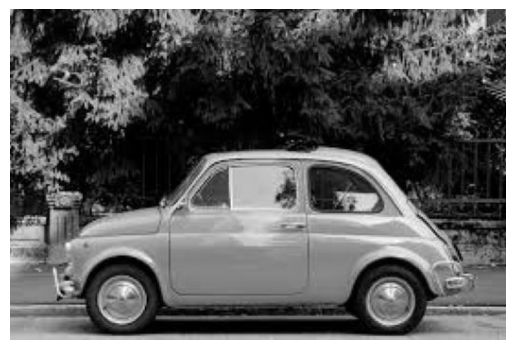

In [156]:
img_data2 = base64.b64decode(base64_image2)
img2= Image.open(io.BytesIO(img_data2))
a = np.array(img2)
gray2 = cv2.cvtColor(a, cv2.COLOR_RGB2GRAY)
plt.imshow(gray2, cmap='gray')
plt.axis("off")
plt.show()


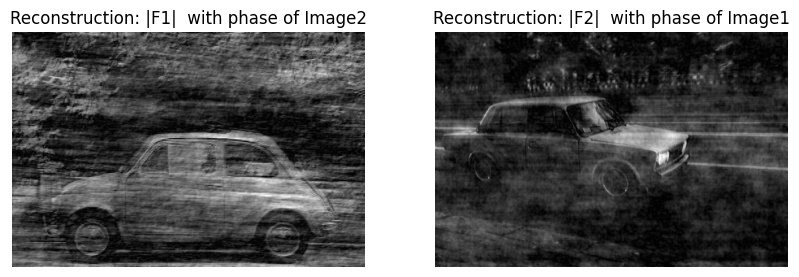

In [157]:

f2 = np.fft.fft2(gray2)
fshift2 = np.fft.fftshift(f2)
mag1 = np.abs(fshift);
mag2 = np.abs(fshift2);
phase1 = fshift/mag1;
phase2 = fshift2/mag2;

img1_swap= inverse(mag1*phase2)

img2_swap= inverse(mag2*phase1)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(img1_swap, cmap='gray')
plt.title("Reconstruction: |F1|  with phase of Image2")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img2_swap, cmap='gray')
plt.title("Reconstruction: |F2|  with phase of Image1")
plt.axis('off')
plt.show()
## Yes the textures apear to swapped between the two images they seem recognizable because the magnitudes may be similar

